In [30]:
from sys import path as syspath
from os import path as ospath
syspath.append(ospath.join(ospath.expanduser("~"), '/data/hashemi/Freetime/Freetime-DQN/Deep-Freetime/SB3_f'))

In [31]:
import torch as torch
torch._C._cuda_getDeviceCount() > 0

True

In [32]:
import os
import gym 
import matplotlib.pyplot as plt
import numpy as np 
from SB3_f.sb3f import DQN
from SB3_f.sb3f.common.vec_env import DummyVecEnv
from SB3_f.sb3f.common.evaluation import evaluate_policy
from SB3_f.sb3f.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold


In [33]:
rewards = [[1,1,6],[1,3,4]]
from GridEnv import WindyGridworld
env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=True,
        allowed_actions=['L', 'R', 'C'],
        reward_terminates_episode=False
    )

In [34]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:0
Episode:2 Score:1
Episode:3 Score:0
Episode:4 Score:1
Episode:5 Score:0


In [35]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs_F_Only', 'Env 2')

In [36]:
from SB3_f.sb3f.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

stop_callback = StopTrainingOnRewardThreshold(reward_threshold=3, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [37]:
# try 0.2 exploration period
opt_val = None
model = DQN('CnnPolicy', env, opt_val, exploration_fraction=0.2,
  exploration_final_eps=0.1,learning_starts=100000, verbose = 1, buffer_size = 50000,target_update_interval=1000, tensorboard_log=log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


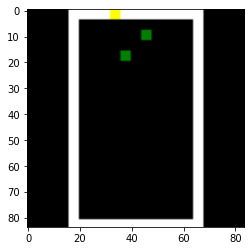

In [38]:
from SB3_f.sb3f.common.utils import obs_as_tensor
device = torch.device('cuda:0')

obs = env.canvas
plt.imshow(obs)


# Check the Network Q Value
observation = np.transpose(obs, (2, 0, 1))
observation = observation[np.newaxis, ...]
observation = obs_as_tensor(observation, device)
with torch.no_grad():
        q_values = model.q_net(observation)

In [39]:
q_values

tensor([[-0.0262,  0.0270, -0.0158]], device='cuda:0')

In [40]:
model.learn(total_timesteps=1000000,callback=eval_callback, tb_log_name='Env2_0.2exp_1M')

Logging to Training/Logs_F_Only/Env 2/Env2_0.2exp_1M_5
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2793     |
|    time_elapsed     | 0        |
|    total_timesteps  | 39       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3043     |
|    time_elapsed     | 0        |
|    total_timesteps  | 94       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.999    |


/data/hashemi/Freetime/Freetime-DQN/Deep-Freetime/SB3_f/sb3f/common/callbacks.py:388: UserWarning: Training and eval env are not of the same type<sb3f.common.vec_env.vec_transpose.VecTransposeImage object at 0x7f855fac6a00> != <sb3f.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f84744f4fd0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.0278   |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 3149     |
|    time_elapsed     | 0        |
|    total_timesteps  | 493      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.075    |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 3165     |
|    time_elapsed     | 0        |
|    total_timesteps  | 564      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.136    |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 124      |
|    fps              | 3230     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1792     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 128      |
|    fps              | 3233     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1858     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 212      |
|    fps              | 3243     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3048     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 3245     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3119     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.98     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 3263     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4476     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.98     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 3264     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4549     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 388      |
|    fps              | 3268     |
|    time_elapsed     | 1        |
|    total_timesteps  | 5798     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 392      |
|    fps              | 3268     |
|    time_elapsed     | 1        |
|    total_timesteps  | 5859     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.973    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.21     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 476      |
|    fps              | 3271     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7152     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.21     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 480      |
|    fps              | 3271     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7208     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.963    |
| time/               |          |
|    episodes         | 564      |
|    fps              | 3262     |
|    time_elapsed     | 2        |
|    total_timesteps  | 8313     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 568      |
|    fps              | 3261     |
|    time_elapsed     | 2        |
|    total_timesteps  | 8344     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.957    |
| time/               |          |
|    episodes         | 652      |
|    fps              | 3265     |
|    time_elapsed     | 2        |
|    total_timesteps  | 9630     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 656      |
|    fps              | 3264     |
|    time_elapsed     | 2        |
|    total_timesteps  | 9676     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.951    |
| time/               |          |
|    episodes         | 736      |
|    fps              | 3081     |
|    time_elapsed     | 3        |
|    total_timesteps  | 10935    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 3081     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11010    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes         | 824      |
|    fps              | 3092     |
|    time_elapsed     | 3        |
|    total_timesteps  | 12123    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes         | 828      |
|    fps              | 3093     |
|    time_elapsed     | 3        |
|    total_timesteps  | 12186    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 912      |
|    fps              | 3108     |
|    time_elapsed     | 4        |
|    total_timesteps  | 13495    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 916      |
|    fps              | 3108     |
|    time_elapsed     | 4        |
|    total_timesteps  | 13537    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.934    |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 3117     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14717    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 1004     |
|    fps              | 3118     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14780    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 1088     |
|    fps              | 3123     |
|    time_elapsed     | 5        |
|    total_timesteps  | 16014    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 1092     |
|    fps              | 3122     |
|    time_elapsed     | 5        |
|    total_timesteps  | 16044    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 1176     |
|    fps              | 3133     |
|    time_elapsed     | 5        |
|    total_timesteps  | 17268    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 1180     |
|    fps              | 3134     |
|    time_elapsed     | 5        |
|    total_timesteps  | 17337    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 1264     |
|    fps              | 3147     |
|    time_elapsed     | 5        |
|    total_timesteps  | 18736    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes         | 1268     |
|    fps              | 3148     |
|    time_elapsed     | 5        |
|    total_timesteps  | 18798    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 3138     |
|    time_elapsed     | 6        |
|    total_timesteps  | 20020    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 1352     |
|    fps              | 3139     |
|    time_elapsed     | 6        |
|    total_timesteps  | 20098    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 3147     |
|    time_elapsed     | 6        |
|    total_timesteps  | 21435    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.903    |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 3147     |
|    time_elapsed     | 6        |
|    total_timesteps  | 21502    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.903    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes         | 1524     |
|    fps              | 3153     |
|    time_elapsed     | 7        |
|    total_timesteps  | 22787    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes         | 1528     |
|    fps              | 3153     |
|    time_elapsed     | 7        |
|    total_timesteps  | 22853    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes         | 1612     |
|    fps              | 3158     |
|    time_elapsed     | 7        |
|    total_timesteps  | 24107    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 1616     |
|    fps              | 3158     |
|    time_elapsed     | 7        |
|    total_timesteps  | 24150    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 1700     |
|    fps              | 3164     |
|    time_elapsed     | 8        |
|    total_timesteps  | 25406    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes         | 1704     |
|    fps              | 3164     |
|    time_elapsed     | 8        |
|    total_timesteps  | 25462    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.88     |
| time/               |          |
|    episodes         | 1788     |
|    fps              | 3168     |
|    time_elapsed     | 8        |
|    total_timesteps  | 26664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.88     |
| time/               |          |
|    episodes         | 1792     |
|    fps              | 3169     |
|    time_elapsed     | 8        |
|    total_timesteps  | 26744    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.879    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.874    |
| time/               |          |
|    episodes         | 1876     |
|    fps              | 3174     |
|    time_elapsed     | 8        |
|    total_timesteps  | 28091    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 3174     |
|    time_elapsed     | 8        |
|    total_timesteps  | 28125    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.868    |
| time/               |          |
|    episodes         | 1964     |
|    fps              | 3178     |
|    time_elapsed     | 9        |
|    total_timesteps  | 29340    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.868    |
| time/               |          |
|    episodes         | 1968     |
|    fps              | 3178     |
|    time_elapsed     | 9        |
|    total_timesteps  | 29385    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.868    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.863    |
| time/               |          |
|    episodes         | 2048     |
|    fps              | 3169     |
|    time_elapsed     | 9        |
|    total_timesteps  | 30540    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes         | 2052     |
|    fps              | 3169     |
|    time_elapsed     | 9        |
|    total_timesteps  | 30594    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.857    |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 3172     |
|    time_elapsed     | 10       |
|    total_timesteps  | 31859    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.856    |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 3172     |
|    time_elapsed     | 10       |
|    total_timesteps  | 31939    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.856    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes         | 2224     |
|    fps              | 3175     |
|    time_elapsed     | 10       |
|    total_timesteps  | 33140    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes         | 2228     |
|    fps              | 3176     |
|    time_elapsed     | 10       |
|    total_timesteps  | 33201    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 2312     |
|    fps              | 3181     |
|    time_elapsed     | 10       |
|    total_timesteps  | 34491    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.844    |
| time/               |          |
|    episodes         | 2316     |
|    fps              | 3181     |
|    time_elapsed     | 10       |
|    total_timesteps  | 34559    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.844    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 2400     |
|    fps              | 3182     |
|    time_elapsed     | 11       |
|    total_timesteps  | 35689    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 3182     |
|    time_elapsed     | 11       |
|    total_timesteps  | 35735    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes         | 2488     |
|    fps              | 3184     |
|    time_elapsed     | 11       |
|    total_timesteps  | 36955    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.833    |
| time/               |          |
|    episodes         | 2492     |
|    fps              | 3184     |
|    time_elapsed     | 11       |
|    total_timesteps  | 37003    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.833    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes         | 2576     |
|    fps              | 3188     |
|    time_elapsed     | 12       |
|    total_timesteps  | 38349    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes         | 2580     |
|    fps              | 3188     |
|    time_elapsed     | 12       |
|    total_timesteps  | 38392    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.822    |
| time/               |          |
|    episodes         | 2664     |
|    fps              | 3189     |
|    time_elapsed     | 12       |
|    total_timesteps  | 39549    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.822    |
| time/               |          |
|    episodes         | 2668     |
|    fps              | 3189     |
|    time_elapsed     | 12       |
|    total_timesteps  | 39612    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.821    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.816    |
| time/               |          |
|    episodes         | 2748     |
|    fps              | 3183     |
|    time_elapsed     | 12       |
|    total_timesteps  | 40795    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.816    |
| time/               |          |
|    episodes         | 2752     |
|    fps              | 3183     |
|    time_elapsed     | 12       |
|    total_timesteps  | 40838    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.816    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.811    |
| time/               |          |
|    episodes         | 2836     |
|    fps              | 3185     |
|    time_elapsed     | 13       |
|    total_timesteps  | 42078    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes         | 2840     |
|    fps              | 3185     |
|    time_elapsed     | 13       |
|    total_timesteps  | 42149    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes         | 2924     |
|    fps              | 3187     |
|    time_elapsed     | 13       |
|    total_timesteps  | 43421    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.804    |
| time/               |          |
|    episodes         | 2928     |
|    fps              | 3187     |
|    time_elapsed     | 13       |
|    total_timesteps  | 43487    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.804    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.799    |
| time/               |          |
|    episodes         | 3012     |
|    fps              | 3190     |
|    time_elapsed     | 14       |
|    total_timesteps  | 44776    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.798    |
| time/               |          |
|    episodes         | 3016     |
|    fps              | 3190     |
|    time_elapsed     | 14       |
|    total_timesteps  | 44828    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.798    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 3100     |
|    fps              | 3193     |
|    time_elapsed     | 14       |
|    total_timesteps  | 46185    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 3193     |
|    time_elapsed     | 14       |
|    total_timesteps  | 46229    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.786    |
| time/               |          |
|    episodes         | 3188     |
|    fps              | 3195     |
|    time_elapsed     | 14       |
|    total_timesteps  | 47541    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.786    |
| time/               |          |
|    episodes         | 3192     |
|    fps              | 3195     |
|    time_elapsed     | 14       |
|    total_timesteps  | 47571    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.786    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.781    |
| time/               |          |
|    episodes         | 3276     |
|    fps              | 3196     |
|    time_elapsed     | 15       |
|    total_timesteps  | 48742    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes         | 3280     |
|    fps              | 3196     |
|    time_elapsed     | 15       |
|    total_timesteps  | 48786    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.775    |
| time/               |          |
|    episodes         | 3360     |
|    fps              | 3187     |
|    time_elapsed     | 15       |
|    total_timesteps  | 50021    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.775    |
| time/               |          |
|    episodes         | 3364     |
|    fps              | 3187     |
|    time_elapsed     | 15       |
|    total_timesteps  | 50101    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.774    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.769    |
| time/               |          |
|    episodes         | 3448     |
|    fps              | 3193     |
|    time_elapsed     | 16       |
|    total_timesteps  | 51415    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.768    |
| time/               |          |
|    episodes         | 3452     |
|    fps              | 3193     |
|    time_elapsed     | 16       |
|    total_timesteps  | 51476    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.768    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.763    |
| time/               |          |
|    episodes         | 3536     |
|    fps              | 3198     |
|    time_elapsed     | 16       |
|    total_timesteps  | 52741    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.762    |
| time/               |          |
|    episodes         | 3540     |
|    fps              | 3199     |
|    time_elapsed     | 16       |
|    total_timesteps  | 52798    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.762    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 3624     |
|    fps              | 3203     |
|    time_elapsed     | 16       |
|    total_timesteps  | 53983    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 3628     |
|    fps              | 3203     |
|    time_elapsed     | 16       |
|    total_timesteps  | 54063    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.756    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 3712     |
|    fps              | 3208     |
|    time_elapsed     | 17       |
|    total_timesteps  | 55348    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 3716     |
|    fps              | 3208     |
|    time_elapsed     | 17       |
|    total_timesteps  | 55412    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.75     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes         | 3800     |
|    fps              | 3213     |
|    time_elapsed     | 17       |
|    total_timesteps  | 56695    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes         | 3804     |
|    fps              | 3213     |
|    time_elapsed     | 17       |
|    total_timesteps  | 56767    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.744    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.739    |
| time/               |          |
|    episodes         | 3888     |
|    fps              | 3217     |
|    time_elapsed     | 17       |
|    total_timesteps  | 57903    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.739    |
| time/               |          |
|    episodes         | 3892     |
|    fps              | 3217     |
|    time_elapsed     | 18       |
|    total_timesteps  | 57929    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.739    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.734    |
| time/               |          |
|    episodes         | 3976     |
|    fps              | 3220     |
|    time_elapsed     | 18       |
|    total_timesteps  | 59144    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 3980     |
|    fps              | 3221     |
|    time_elapsed     | 18       |
|    total_timesteps  | 59224    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.728    |
| time/               |          |
|    episodes         | 4060     |
|    fps              | 3219     |
|    time_elapsed     | 18       |
|    total_timesteps  | 60462    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.728    |
| time/               |          |
|    episodes         | 4064     |
|    fps              | 3219     |
|    time_elapsed     | 18       |
|    total_timesteps  | 60495    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.727    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.722    |
| time/               |          |
|    episodes         | 4148     |
|    fps              | 3222     |
|    time_elapsed     | 19       |
|    total_timesteps  | 61673    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.722    |
| time/               |          |
|    episodes         | 4152     |
|    fps              | 3222     |
|    time_elapsed     | 19       |
|    total_timesteps  | 61723    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.722    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.717    |
| time/               |          |
|    episodes         | 4236     |
|    fps              | 3226     |
|    time_elapsed     | 19       |
|    total_timesteps  | 62942    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.717    |
| time/               |          |
|    episodes         | 4240     |
|    fps              | 3226     |
|    time_elapsed     | 19       |
|    total_timesteps  | 62986    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.716    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.712    |
| time/               |          |
|    episodes         | 4324     |
|    fps              | 3229     |
|    time_elapsed     | 19       |
|    total_timesteps  | 64105    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes         | 4328     |
|    fps              | 3229     |
|    time_elapsed     | 19       |
|    total_timesteps  | 64163    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.706    |
| time/               |          |
|    episodes         | 4412     |
|    fps              | 3233     |
|    time_elapsed     | 20       |
|    total_timesteps  | 65441    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.705    |
| time/               |          |
|    episodes         | 4416     |
|    fps              | 3233     |
|    time_elapsed     | 20       |
|    total_timesteps  | 65466    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.705    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.7      |
| time/               |          |
|    episodes         | 4500     |
|    fps              | 3234     |
|    time_elapsed     | 20       |
|    total_timesteps  | 66626    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.7      |
| time/               |          |
|    episodes         | 4504     |
|    fps              | 3234     |
|    time_elapsed     | 20       |
|    total_timesteps  | 66706    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.7      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.694    |
| time/               |          |
|    episodes         | 4588     |
|    fps              | 3237     |
|    time_elapsed     | 20       |
|    total_timesteps  | 67921    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.694    |
| time/               |          |
|    episodes         | 4592     |
|    fps              | 3238     |
|    time_elapsed     | 20       |
|    total_timesteps  | 67984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.694    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.689    |
| time/               |          |
|    episodes         | 4676     |
|    fps              | 3241     |
|    time_elapsed     | 21       |
|    total_timesteps  | 69207    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.688    |
| time/               |          |
|    episodes         | 4680     |
|    fps              | 3241     |
|    time_elapsed     | 21       |
|    total_timesteps  | 69287    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.688    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.682    |
| time/               |          |
|    episodes         | 4760     |
|    fps              | 3237     |
|    time_elapsed     | 21       |
|    total_timesteps  | 70566    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.682    |
| time/               |          |
|    episodes         | 4764     |
|    fps              | 3237     |
|    time_elapsed     | 21       |
|    total_timesteps  | 70629    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.682    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.678    |
| time/               |          |
|    episodes         | 4848     |
|    fps              | 3239     |
|    time_elapsed     | 22       |
|    total_timesteps  | 71662    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.677    |
| time/               |          |
|    episodes         | 4852     |
|    fps              | 3239     |
|    time_elapsed     | 22       |
|    total_timesteps  | 71711    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.677    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.673    |
| time/               |          |
|    episodes         | 4936     |
|    fps              | 3240     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72770    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.672    |
| time/               |          |
|    episodes         | 4940     |
|    fps              | 3241     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72848    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.672    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.666    |
| time/               |          |
|    episodes         | 5024     |
|    fps              | 3244     |
|    time_elapsed     | 22       |
|    total_timesteps  | 74228    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.666    |
| time/               |          |
|    episodes         | 5028     |
|    fps              | 3244     |
|    time_elapsed     | 22       |
|    total_timesteps  | 74292    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.665    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 5112     |
|    fps              | 3247     |
|    time_elapsed     | 23       |
|    total_timesteps  | 75490    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 5116     |
|    fps              | 3247     |
|    time_elapsed     | 23       |
|    total_timesteps  | 75570    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes         | 5200     |
|    fps              | 3249     |
|    time_elapsed     | 23       |
|    total_timesteps  | 76787    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.22     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes         | 5204     |
|    fps              | 3249     |
|    time_elapsed     | 23       |
|    total_timesteps  | 76849    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.23     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes         | 5288     |
|    fps              | 3251     |
|    time_elapsed     | 24       |
|    total_timesteps  | 78128    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes         | 5292     |
|    fps              | 3252     |
|    time_elapsed     | 24       |
|    total_timesteps  | 78189    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.643    |
| time/               |          |
|    episodes         | 5376     |
|    fps              | 3254     |
|    time_elapsed     | 24       |
|    total_timesteps  | 79441    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.642    |
| time/               |          |
|    episodes         | 5380     |
|    fps              | 3254     |
|    time_elapsed     | 24       |
|    total_timesteps  | 79500    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.642    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 5460     |
|    fps              | 3251     |
|    time_elapsed     | 24       |
|    total_timesteps  | 80623    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 5464     |
|    fps              | 3251     |
|    time_elapsed     | 24       |
|    total_timesteps  | 80703    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.632    |
| time/               |          |
|    episodes         | 5548     |
|    fps              | 3253     |
|    time_elapsed     | 25       |
|    total_timesteps  | 81769    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.632    |
| time/               |          |
|    episodes         | 5552     |
|    fps              | 3253     |
|    time_elapsed     | 25       |
|    total_timesteps  | 81829    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.631    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.626    |
| time/               |          |
|    episodes         | 5636     |
|    fps              | 3254     |
|    time_elapsed     | 25       |
|    total_timesteps  | 83007    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.626    |
| time/               |          |
|    episodes         | 5640     |
|    fps              | 3254     |
|    time_elapsed     | 25       |
|    total_timesteps  | 83074    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.626    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.621    |
| time/               |          |
|    episodes         | 5724     |
|    fps              | 3257     |
|    time_elapsed     | 25       |
|    total_timesteps  | 84317    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 5728     |
|    fps              | 3257     |
|    time_elapsed     | 25       |
|    total_timesteps  | 84378    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.615    |
| time/               |          |
|    episodes         | 5812     |
|    fps              | 3258     |
|    time_elapsed     | 26       |
|    total_timesteps  | 85647    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.614    |
| time/               |          |
|    episodes         | 5816     |
|    fps              | 3258     |
|    time_elapsed     | 26       |
|    total_timesteps  | 85709    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.614    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.609    |
| time/               |          |
|    episodes         | 5900     |
|    fps              | 3261     |
|    time_elapsed     | 26       |
|    total_timesteps  | 86967    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.608    |
| time/               |          |
|    episodes         | 5904     |
|    fps              | 3260     |
|    time_elapsed     | 26       |
|    total_timesteps  | 87015    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.608    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.603    |
| time/               |          |
|    episodes         | 5988     |
|    fps              | 3258     |
|    time_elapsed     | 27       |
|    total_timesteps  | 88281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.602    |
| time/               |          |
|    episodes         | 5992     |
|    fps              | 3258     |
|    time_elapsed     | 27       |
|    total_timesteps  | 88334    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.602    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.597    |
| time/               |          |
|    episodes         | 6076     |
|    fps              | 3258     |
|    time_elapsed     | 27       |
|    total_timesteps  | 89644    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.596    |
| time/               |          |
|    episodes         | 6080     |
|    fps              | 3258     |
|    time_elapsed     | 27       |
|    total_timesteps  | 89707    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.596    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.591    |
| time/               |          |
|    episodes         | 6160     |
|    fps              | 3254     |
|    time_elapsed     | 27       |
|    total_timesteps  | 90967    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.59     |
| time/               |          |
|    episodes         | 6164     |
|    fps              | 3254     |
|    time_elapsed     | 27       |
|    total_timesteps  | 91047    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.59     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.585    |
| time/               |          |
|    episodes         | 6248     |
|    fps              | 3254     |
|    time_elapsed     | 28       |
|    total_timesteps  | 92244    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.585    |
| time/               |          |
|    episodes         | 6252     |
|    fps              | 3254     |
|    time_elapsed     | 28       |
|    total_timesteps  | 92300    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.584    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.58     |
| time/               |          |
|    episodes         | 6336     |
|    fps              | 3253     |
|    time_elapsed     | 28       |
|    total_timesteps  | 93421    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.579    |
| time/               |          |
|    episodes         | 6340     |
|    fps              | 3252     |
|    time_elapsed     | 28       |
|    total_timesteps  | 93485    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.579    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.574    |
| time/               |          |
|    episodes         | 6424     |
|    fps              | 3251     |
|    time_elapsed     | 29       |
|    total_timesteps  | 94726    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.574    |
| time/               |          |
|    episodes         | 6428     |
|    fps              | 3251     |
|    time_elapsed     | 29       |
|    total_timesteps  | 94763    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.573    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.568    |
| time/               |          |
|    episodes         | 6512     |
|    fps              | 3251     |
|    time_elapsed     | 29       |
|    total_timesteps  | 96058    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.567    |
| time/               |          |
|    episodes         | 6516     |
|    fps              | 3251     |
|    time_elapsed     | 29       |
|    total_timesteps  | 96119    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.567    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.562    |
| time/               |          |
|    episodes         | 6600     |
|    fps              | 3251     |
|    time_elapsed     | 29       |
|    total_timesteps  | 97362    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.562    |
| time/               |          |
|    episodes         | 6604     |
|    fps              | 3251     |
|    time_elapsed     | 29       |
|    total_timesteps  | 97404    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.561    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.556    |
| time/               |          |
|    episodes         | 6688     |
|    fps              | 3250     |
|    time_elapsed     | 30       |
|    total_timesteps  | 98701    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.556    |
| time/               |          |
|    episodes         | 6692     |
|    fps              | 3250     |
|    time_elapsed     | 30       |
|    total_timesteps  | 98758    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.555    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.551    |
| time/               |          |
|    episodes         | 6776     |
|    fps              | 3251     |
|    time_elapsed     | 30       |
|    total_timesteps  | 99844    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.55     |
| time/               |          |
|    episodes         | 6780     |
|    fps              | 3251     |
|    time_elapsed     | 30       |
|    total_timesteps  | 99897    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.55     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.547    |
| time/               |          |
|    episodes         | 6840     |
|    fps              | 3112     |
|    time_elapsed     | 32       |
|    total_timesteps  | 100691   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000187 |
|    n_updates        | 172      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.547    |
| time/               |          |
|    episodes         | 6844     |
|    fps              | 3106     |
|    time_elapsed     | 32       |
|    total_timesteps  | 100721   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.49e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.543    |
| time/               |          |
|    episodes         | 6904     |
|    fps              | 2974     |
|    time_elapsed     | 34       |
|    total_timesteps  | 101494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-05 |
|    n_updates        | 373      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.543    |
| time/               |          |
|    episodes         | 6908     |
|    fps              | 2964     |
|    time_elapsed     | 34       |
|    total_timesteps  | 101550   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0003   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.54     |
| time/               |          |
|    episodes         | 6968     |
|    fps              | 2850     |
|    time_elapsed     | 35       |
|    total_timesteps  | 102328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.014    |
|    n_updates        | 581      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.539    |
| time/               |          |
|    episodes         | 6972     |
|    fps              | 2842     |
|    time_elapsed     | 36       |
|    total_timesteps  | 102385   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.536    |
| time/               |          |
|    episodes         | 7032     |
|    fps              | 2746     |
|    time_elapsed     | 37       |
|    total_timesteps  | 103090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.25e-05 |
|    n_updates        | 772      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.536    |
| time/               |          |
|    episodes         | 7036     |
|    fps              | 2736     |
|    time_elapsed     | 37       |
|    total_timesteps  | 103170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00044  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.532    |
| time/               |          |
|    episodes         | 7096     |
|    fps              | 2642     |
|    time_elapsed     | 39       |
|    total_timesteps  | 103918   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000236 |
|    n_updates        | 979      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.532    |
| time/               |          |
|    episodes         | 7100     |
|    fps              | 2633     |
|    time_elapsed     | 39       |
|    total_timesteps  | 103986   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.031    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.529    |
| time/               |          |
|    episodes         | 7160     |
|    fps              | 2540     |
|    time_elapsed     | 41       |
|    total_timesteps  | 104763   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates        | 1190     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.528    |
| time/               |          |
|    episodes         | 7164     |
|    fps              | 2536     |
|    time_elapsed     | 41       |
|    total_timesteps  | 104800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0316   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.524    |
| time/               |          |
|    episodes         | 7224     |
|    fps              | 2445     |
|    time_elapsed     | 43       |
|    total_timesteps  | 105677   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.62e-06 |
|    n_updates        | 1419     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.524    |
| time/               |          |
|    episodes         | 7228     |
|    fps              | 2439     |
|    time_elapsed     | 43       |
|    total_timesteps  | 105738   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0161   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.521    |
| time/               |          |
|    episodes         | 7288     |
|    fps              | 2361     |
|    time_elapsed     | 45       |
|    total_timesteps  | 106535   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-05 |
|    n_updates        | 1633     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.521    |
| time/               |          |
|    episodes         | 7292     |
|    fps              | 2360     |
|    time_elapsed     | 45       |
|    total_timesteps  | 106552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000781 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.517    |
| time/               |          |
|    episodes         | 7352     |
|    fps              | 2287     |
|    time_elapsed     | 46       |
|    total_timesteps  | 107365   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0162   |
|    n_updates        | 1841     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.517    |
| time/               |          |
|    episodes         | 7356     |
|    fps              | 2282     |
|    time_elapsed     | 47       |
|    total_timesteps  | 107428   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000264 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 7416     |
|    fps              | 2225     |
|    time_elapsed     | 48       |
|    total_timesteps  | 108120   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00068  |
|    n_updates        | 2029     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 7420     |
|    fps              | 2220     |
|    time_elapsed     | 48       |
|    total_timesteps  | 108170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0157   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.51     |
| time/               |          |
|    episodes         | 7480     |
|    fps              | 2159     |
|    time_elapsed     | 50       |
|    total_timesteps  | 108971   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0321   |
|    n_updates        | 2242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.509    |
| time/               |          |
|    episodes         | 7484     |
|    fps              | 2154     |
|    time_elapsed     | 50       |
|    total_timesteps  | 109038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0159   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.506    |
| time/               |          |
|    episodes         | 7544     |
|    fps              | 2100     |
|    time_elapsed     | 52       |
|    total_timesteps  | 109820   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000707 |
|    n_updates        | 2454     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.506    |
| time/               |          |
|    episodes         | 7548     |
|    fps              | 2097     |
|    time_elapsed     | 52       |
|    total_timesteps  | 109857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0158   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.502    |
| time/               |          |
|    episodes         | 7604     |
|    fps              | 2036     |
|    time_elapsed     | 54       |
|    total_timesteps  | 110624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0161   |
|    n_updates        | 2655     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.502    |
| time/               |          |
|    episodes         | 7608     |
|    fps              | 2031     |
|    time_elapsed     | 54       |
|    total_timesteps  | 110704   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0162   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.498    |
| time/               |          |
|    episodes         | 7668     |
|    fps              | 1976     |
|    time_elapsed     | 56       |
|    total_timesteps  | 111577   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000301 |
|    n_updates        | 2894     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.498    |
| time/               |          |
|    episodes         | 7672     |
|    fps              | 1973     |
|    time_elapsed     | 56       |
|    total_timesteps  | 111635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0158   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.494    |
| time/               |          |
|    episodes         | 7732     |
|    fps              | 1923     |
|    time_elapsed     | 58       |
|    total_timesteps  | 112506   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0161   |
|    n_updates        | 3126     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.493    |
| time/               |          |
|    episodes         | 7736     |
|    fps              | 1920     |
|    time_elapsed     | 58       |
|    total_timesteps  | 112558   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0158   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.49     |
| time/               |          |
|    episodes         | 7796     |
|    fps              | 1882     |
|    time_elapsed     | 60       |
|    total_timesteps  | 113269   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000964 |
|    n_updates        | 3317     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.49     |
| time/               |          |
|    episodes         | 7800     |
|    fps              | 1879     |
|    time_elapsed     | 60       |
|    total_timesteps  | 113322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00133  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.24     |
|    exploration_rate | 0.486    |
| time/               |          |
|    episodes         | 7860     |
|    fps              | 1828     |
|    time_elapsed     | 62       |
|    total_timesteps  | 114308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates        | 3576     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.23     |
|    exploration_rate | 0.485    |
| time/               |          |
|    episodes         | 7864     |
|    fps              | 1826     |
|    time_elapsed     | 62       |
|    total_timesteps  | 114357   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.481    |
| time/               |          |
|    episodes         | 7924     |
|    fps              | 1779     |
|    time_elapsed     | 64       |
|    total_timesteps  | 115308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 3826     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.481    |
| time/               |          |
|    episodes         | 7928     |
|    fps              | 1775     |
|    time_elapsed     | 65       |
|    total_timesteps  | 115388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000938 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.477    |
| time/               |          |
|    episodes         | 7988     |
|    fps              | 1733     |
|    time_elapsed     | 67       |
|    total_timesteps  | 116301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000532 |
|    n_updates        | 4075     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.476    |
| time/               |          |
|    episodes         | 7992     |
|    fps              | 1731     |
|    time_elapsed     | 67       |
|    total_timesteps  | 116360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00123  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.472    |
| time/               |          |
|    episodes         | 8052     |
|    fps              | 1693     |
|    time_elapsed     | 69       |
|    total_timesteps  | 117268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000492 |
|    n_updates        | 4316     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.472    |
| time/               |          |
|    episodes         | 8056     |
|    fps              | 1691     |
|    time_elapsed     | 69       |
|    total_timesteps  | 117328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.76e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.468    |
| time/               |          |
|    episodes         | 8116     |
|    fps              | 1658     |
|    time_elapsed     | 71       |
|    total_timesteps  | 118166   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0177   |
|    n_updates        | 4541     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.468    |
| time/               |          |
|    episodes         | 8120     |
|    fps              | 1656     |
|    time_elapsed     | 71       |
|    total_timesteps  | 118234   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000922 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.465    |
| time/               |          |
|    episodes         | 8180     |
|    fps              | 1628     |
|    time_elapsed     | 73       |
|    total_timesteps  | 118985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00127  |
|    n_updates        | 4746     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.464    |
| time/               |          |
|    episodes         | 8184     |
|    fps              | 1626     |
|    time_elapsed     | 73       |
|    total_timesteps  | 119038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.461    |
| time/               |          |
|    episodes         | 8244     |
|    fps              | 1598     |
|    time_elapsed     | 74       |
|    total_timesteps  | 119874   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00192  |
|    n_updates        | 4968     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.46     |
| time/               |          |
|    episodes         | 8248     |
|    fps              | 1596     |
|    time_elapsed     | 75       |
|    total_timesteps  | 119936   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000935 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.456    |
| time/               |          |
|    episodes         | 8304     |
|    fps              | 1562     |
|    time_elapsed     | 77       |
|    total_timesteps  | 120850   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00176  |
|    n_updates        | 5212     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.456    |
| time/               |          |
|    episodes         | 8308     |
|    fps              | 1560     |
|    time_elapsed     | 77       |
|    total_timesteps  | 120911   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.81e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.451    |
| time/               |          |
|    episodes         | 8368     |
|    fps              | 1530     |
|    time_elapsed     | 79       |
|    total_timesteps  | 121890   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.027    |
|    n_updates        | 5472     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.451    |
| time/               |          |
|    episodes         | 8372     |
|    fps              | 1528     |
|    time_elapsed     | 79       |
|    total_timesteps  | 121948   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.447    |
| time/               |          |
|    episodes         | 8432     |
|    fps              | 1496     |
|    time_elapsed     | 82       |
|    total_timesteps  | 122954   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00114  |
|    n_updates        | 5738     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.446    |
| time/               |          |
|    episodes         | 8436     |
|    fps              | 1495     |
|    time_elapsed     | 82       |
|    total_timesteps  | 123021   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00098  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.442    |
| time/               |          |
|    episodes         | 8496     |
|    fps              | 1471     |
|    time_elapsed     | 84       |
|    total_timesteps  | 123918   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00145  |
|    n_updates        | 5979     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.442    |
| time/               |          |
|    episodes         | 8500     |
|    fps              | 1469     |
|    time_elapsed     | 84       |
|    total_timesteps  | 123968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0172   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.439    |
| time/               |          |
|    episodes         | 8560     |
|    fps              | 1449     |
|    time_elapsed     | 86       |
|    total_timesteps  | 124766   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00146  |
|    n_updates        | 6191     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.438    |
| time/               |          |
|    episodes         | 8564     |
|    fps              | 1447     |
|    time_elapsed     | 86       |
|    total_timesteps  | 124834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00288  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.434    |
| time/               |          |
|    episodes         | 8624     |
|    fps              | 1423     |
|    time_elapsed     | 88       |
|    total_timesteps  | 125782   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0326   |
|    n_updates        | 6445     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.434    |
| time/               |          |
|    episodes         | 8628     |
|    fps              | 1422     |
|    time_elapsed     | 88       |
|    total_timesteps  | 125818   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00197  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.43     |
| time/               |          |
|    episodes         | 8688     |
|    fps              | 1400     |
|    time_elapsed     | 90       |
|    total_timesteps  | 126752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0179   |
|    n_updates        | 6687     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.429    |
| time/               |          |
|    episodes         | 8692     |
|    fps              | 1399     |
|    time_elapsed     | 90       |
|    total_timesteps  | 126823   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00095  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.425    |
| time/               |          |
|    episodes         | 8752     |
|    fps              | 1379     |
|    time_elapsed     | 92       |
|    total_timesteps  | 127674   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00102  |
|    n_updates        | 6918     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.425    |
| time/               |          |
|    episodes         | 8756     |
|    fps              | 1378     |
|    time_elapsed     | 92       |
|    total_timesteps  | 127735   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.421    |
| time/               |          |
|    episodes         | 8816     |
|    fps              | 1358     |
|    time_elapsed     | 94       |
|    total_timesteps  | 128651   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000404 |
|    n_updates        | 7162     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.421    |
| time/               |          |
|    episodes         | 8820     |
|    fps              | 1357     |
|    time_elapsed     | 94       |
|    total_timesteps  | 128690   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.016    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.417    |
| time/               |          |
|    episodes         | 8880     |
|    fps              | 1340     |
|    time_elapsed     | 96       |
|    total_timesteps  | 129511   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00116  |
|    n_updates        | 7377     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.417    |
| time/               |          |
|    episodes         | 8884     |
|    fps              | 1339     |
|    time_elapsed     | 96       |
|    total_timesteps  | 129549   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000799 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.413    |
| time/               |          |
|    episodes         | 8940     |
|    fps              | 1319     |
|    time_elapsed     | 98       |
|    total_timesteps  | 130428   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000656 |
|    n_updates        | 7606     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.413    |
| time/               |          |
|    episodes         | 8944     |
|    fps              | 1318     |
|    time_elapsed     | 99       |
|    total_timesteps  | 130508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000336 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.22     |
|    exploration_rate | 0.408    |
| time/               |          |
|    episodes         | 9004     |
|    fps              | 1300     |
|    time_elapsed     | 101      |
|    total_timesteps  | 131446   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0166   |
|    n_updates        | 7861     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.22     |
|    exploration_rate | 0.408    |
| time/               |          |
|    episodes         | 9008     |
|    fps              | 1299     |
|    time_elapsed     | 101      |
|    total_timesteps  | 131526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0163   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.404    |
| time/               |          |
|    episodes         | 9068     |
|    fps              | 1281     |
|    time_elapsed     | 103      |
|    total_timesteps  | 132524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates        | 8130     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.403    |
| time/               |          |
|    episodes         | 9072     |
|    fps              | 1280     |
|    time_elapsed     | 103      |
|    total_timesteps  | 132574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000632 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.399    |
| time/               |          |
|    episodes         | 9132     |
|    fps              | 1264     |
|    time_elapsed     | 105      |
|    total_timesteps  | 133447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0335   |
|    n_updates        | 8361     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.399    |
| time/               |          |
|    episodes         | 9136     |
|    fps              | 1262     |
|    time_elapsed     | 105      |
|    total_timesteps  | 133526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000655 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.395    |
| time/               |          |
|    episodes         | 9196     |
|    fps              | 1246     |
|    time_elapsed     | 107      |
|    total_timesteps  | 134473   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000608 |
|    n_updates        | 8618     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.395    |
| time/               |          |
|    episodes         | 9200     |
|    fps              | 1245     |
|    time_elapsed     | 107      |
|    total_timesteps  | 134538   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000614 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.39     |
| time/               |          |
|    episodes         | 9260     |
|    fps              | 1230     |
|    time_elapsed     | 110      |
|    total_timesteps  | 135522   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00117  |
|    n_updates        | 8880     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.39     |
| time/               |          |
|    episodes         | 9264     |
|    fps              | 1229     |
|    time_elapsed     | 110      |
|    total_timesteps  | 135602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.385    |
| time/               |          |
|    episodes         | 9324     |
|    fps              | 1213     |
|    time_elapsed     | 112      |
|    total_timesteps  | 136615   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0168   |
|    n_updates        | 9153     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.385    |
| time/               |          |
|    episodes         | 9328     |
|    fps              | 1212     |
|    time_elapsed     | 112      |
|    total_timesteps  | 136682   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00172  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.21     |
|    exploration_rate | 0.381    |
| time/               |          |
|    episodes         | 9388     |
|    fps              | 1197     |
|    time_elapsed     | 114      |
|    total_timesteps  | 137640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000631 |
|    n_updates        | 9409     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.21     |
|    exploration_rate | 0.38     |
| time/               |          |
|    episodes         | 9392     |
|    fps              | 1196     |
|    time_elapsed     | 115      |
|    total_timesteps  | 137705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00137  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.376    |
| time/               |          |
|    episodes         | 9452     |
|    fps              | 1182     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138651   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.77e-06 |
|    n_updates        | 9662     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.376    |
| time/               |          |
|    episodes         | 9456     |
|    fps              | 1181     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138679   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000996 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.373    |
| time/               |          |
|    episodes         | 9516     |
|    fps              | 1171     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139373   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00131  |
|    n_updates        | 9843     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.372    |
| time/               |          |
|    episodes         | 9520     |
|    fps              | 1170     |
|    time_elapsed     | 119      |
|    total_timesteps  | 139453   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000416 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.368    |
| time/               |          |
|    episodes         | 9576     |
|    fps              | 1157     |
|    time_elapsed     | 121      |
|    total_timesteps  | 140396   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00139  |
|    n_updates        | 10098    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.368    |
| time/               |          |
|    episodes         | 9580     |
|    fps              | 1156     |
|    time_elapsed     | 121      |
|    total_timesteps  | 140456   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00153  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.364    |
| time/               |          |
|    episodes         | 9640     |
|    fps              | 1143     |
|    time_elapsed     | 123      |
|    total_timesteps  | 141407   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates        | 10351    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.363    |
| time/               |          |
|    episodes         | 9644     |
|    fps              | 1142     |
|    time_elapsed     | 123      |
|    total_timesteps  | 141479   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00255  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.359    |
| time/               |          |
|    episodes         | 9704     |
|    fps              | 1130     |
|    time_elapsed     | 126      |
|    total_timesteps  | 142457   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000573 |
|    n_updates        | 10614    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.359    |
| time/               |          |
|    episodes         | 9708     |
|    fps              | 1129     |
|    time_elapsed     | 126      |
|    total_timesteps  | 142518   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00113  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.354    |
| time/               |          |
|    episodes         | 9768     |
|    fps              | 1117     |
|    time_elapsed     | 128      |
|    total_timesteps  | 143469   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0339   |
|    n_updates        | 10867    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.354    |
| time/               |          |
|    episodes         | 9772     |
|    fps              | 1116     |
|    time_elapsed     | 128      |
|    total_timesteps  | 143549   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00107  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.35     |
| time/               |          |
|    episodes         | 9832     |
|    fps              | 1105     |
|    time_elapsed     | 130      |
|    total_timesteps  | 144497   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00197  |
|    n_updates        | 11124    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.35     |
| time/               |          |
|    episodes         | 9836     |
|    fps              | 1104     |
|    time_elapsed     | 130      |
|    total_timesteps  | 144546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00162  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.345    |
| time/               |          |
|    episodes         | 9896     |
|    fps              | 1091     |
|    time_elapsed     | 133      |
|    total_timesteps  | 145601   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.8e-05  |
|    n_updates        | 11400    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.344    |
| time/               |          |
|    episodes         | 9900     |
|    fps              | 1091     |
|    time_elapsed     | 133      |
|    total_timesteps  | 145671   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00222  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.341    |
| time/               |          |
|    episodes         | 9960     |
|    fps              | 1081     |
|    time_elapsed     | 135      |
|    total_timesteps  | 146526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 11631    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.34     |
| time/               |          |
|    episodes         | 9964     |
|    fps              | 1080     |
|    time_elapsed     | 135      |
|    total_timesteps  | 146584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00174  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.336    |
| time/               |          |
|    episodes         | 10024    |
|    fps              | 1069     |
|    time_elapsed     | 138      |
|    total_timesteps  | 147631   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00169  |
|    n_updates        | 11907    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.335    |
| time/               |          |
|    episodes         | 10028    |
|    fps              | 1068     |
|    time_elapsed     | 138      |
|    total_timesteps  | 147705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0334   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.331    |
| time/               |          |
|    episodes         | 10088    |
|    fps              | 1057     |
|    time_elapsed     | 140      |
|    total_timesteps  | 148742   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000578 |
|    n_updates        | 12185    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.33     |
| time/               |          |
|    episodes         | 10092    |
|    fps              | 1056     |
|    time_elapsed     | 140      |
|    total_timesteps  | 148822   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.326    |
| time/               |          |
|    episodes         | 10152    |
|    fps              | 1046     |
|    time_elapsed     | 143      |
|    total_timesteps  | 149782   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00114  |
|    n_updates        | 12445    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.326    |
| time/               |          |
|    episodes         | 10156    |
|    fps              | 1046     |
|    time_elapsed     | 143      |
|    total_timesteps  | 149862   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000568 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.322    |
| time/               |          |
|    episodes         | 10212    |
|    fps              | 1037     |
|    time_elapsed     | 145      |
|    total_timesteps  | 150673   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000622 |
|    n_updates        | 12668    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.322    |
| time/               |          |
|    episodes         | 10216    |
|    fps              | 1036     |
|    time_elapsed     | 145      |
|    total_timesteps  | 150753   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000507 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.317    |
| time/               |          |
|    episodes         | 10276    |
|    fps              | 1027     |
|    time_elapsed     | 147      |
|    total_timesteps  | 151755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00162  |
|    n_updates        | 12938    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.317    |
| time/               |          |
|    episodes         | 10280    |
|    fps              | 1027     |
|    time_elapsed     | 147      |
|    total_timesteps  | 151822   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00125  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.312    |
| time/               |          |
|    episodes         | 10340    |
|    fps              | 1018     |
|    time_elapsed     | 150      |
|    total_timesteps  | 152838   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00215  |
|    n_updates        | 13209    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 0.21     |
|    exploration_rate | 0.312    |
| time/               |          |
|    episodes         | 10344    |
|    fps              | 1017     |
|    time_elapsed     | 150      |
|    total_timesteps  | 152918   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000849 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 0.26     |
|    exploration_rate | 0.307    |
| time/               |          |
|    episodes         | 10404    |
|    fps              | 1007     |
|    time_elapsed     | 152      |
|    total_timesteps  | 153968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0023   |
|    n_updates        | 13491    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 0.25     |
|    exploration_rate | 0.307    |
| time/               |          |
|    episodes         | 10408    |
|    fps              | 1007     |
|    time_elapsed     | 152      |
|    total_timesteps  | 154048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00115  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.302    |
| time/               |          |
|    episodes         | 10468    |
|    fps              | 998      |
|    time_elapsed     | 155      |
|    total_timesteps  | 155058   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00213  |
|    n_updates        | 13764    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.302    |
| time/               |          |
|    episodes         | 10472    |
|    fps              | 997      |
|    time_elapsed     | 155      |
|    total_timesteps  | 155115   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 0.2      |
|    exploration_rate | 0.297    |
| time/               |          |
|    episodes         | 10532    |
|    fps              | 988      |
|    time_elapsed     | 157      |
|    total_timesteps  | 156155   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000843 |
|    n_updates        | 14038    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 0.23     |
|    exploration_rate | 0.297    |
| time/               |          |
|    episodes         | 10536    |
|    fps              | 987      |
|    time_elapsed     | 158      |
|    total_timesteps  | 156218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00104  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 0.22     |
|    exploration_rate | 0.292    |
| time/               |          |
|    episodes         | 10596    |
|    fps              | 978      |
|    time_elapsed     | 160      |
|    total_timesteps  | 157285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00298  |
|    n_updates        | 14321    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 0.21     |
|    exploration_rate | 0.292    |
| time/               |          |
|    episodes         | 10600    |
|    fps              | 977      |
|    time_elapsed     | 160      |
|    total_timesteps  | 157351   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00253  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.288    |
| time/               |          |
|    episodes         | 10660    |
|    fps              | 970      |
|    time_elapsed     | 163      |
|    total_timesteps  | 158219   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00684  |
|    n_updates        | 14554    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.288    |
| time/               |          |
|    episodes         | 10664    |
|    fps              | 970      |
|    time_elapsed     | 163      |
|    total_timesteps  | 158245   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00395  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.285    |
| time/               |          |
|    episodes         | 10724    |
|    fps              | 964      |
|    time_elapsed     | 164      |
|    total_timesteps  | 158998   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0153   |
|    n_updates        | 14749    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.284    |
| time/               |          |
|    episodes         | 10728    |
|    fps              | 964      |
|    time_elapsed     | 164      |
|    total_timesteps  | 159018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00594  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.281    |
| time/               |          |
|    episodes         | 10788    |
|    fps              | 959      |
|    time_elapsed     | 166      |
|    total_timesteps  | 159704   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00288  |
|    n_updates        | 14925    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.281    |
| time/               |          |
|    episodes         | 10792    |
|    fps              | 958      |
|    time_elapsed     | 166      |
|    total_timesteps  | 159756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000497 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.278    |
| time/               |          |
|    episodes         | 10848    |
|    fps              | 951      |
|    time_elapsed     | 168      |
|    total_timesteps  | 160489   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00144  |
|    n_updates        | 15122    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.278    |
| time/               |          |
|    episodes         | 10852    |
|    fps              | 951      |
|    time_elapsed     | 168      |
|    total_timesteps  | 160519   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0174   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.274    |
| time/               |          |
|    episodes         | 10912    |
|    fps              | 945      |
|    time_elapsed     | 170      |
|    total_timesteps  | 161349   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00765  |
|    n_updates        | 15337    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.274    |
| time/               |          |
|    episodes         | 10916    |
|    fps              | 944      |
|    time_elapsed     | 170      |
|    total_timesteps  | 161384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00554  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.271    |
| time/               |          |
|    episodes         | 10976    |
|    fps              | 940      |
|    time_elapsed     | 172      |
|    total_timesteps  | 162042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00409  |
|    n_updates        | 15510    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.271    |
| time/               |          |
|    episodes         | 10980    |
|    fps              | 939      |
|    time_elapsed     | 172      |
|    total_timesteps  | 162060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0049   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.267    |
| time/               |          |
|    episodes         | 11040    |
|    fps              | 934      |
|    time_elapsed     | 174      |
|    total_timesteps  | 162853   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00706  |
|    n_updates        | 15713    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.16     |
|    exploration_rate | 0.267    |
| time/               |          |
|    episodes         | 11044    |
|    fps              | 933      |
|    time_elapsed     | 174      |
|    total_timesteps  | 162915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.014    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.46     |
|    exploration_rate | 0.263    |
| time/               |          |
|    episodes         | 11104    |
|    fps              | 928      |
|    time_elapsed     | 176      |
|    total_timesteps  | 163689   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00271  |
|    n_updates        | 15922    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.5      |
|    exploration_rate | 0.263    |
| time/               |          |
|    episodes         | 11108    |
|    fps              | 928      |
|    time_elapsed     | 176      |
|    total_timesteps  | 163732   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00158  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.67     |
|    exploration_rate | 0.26     |
| time/               |          |
|    episodes         | 11168    |
|    fps              | 923      |
|    time_elapsed     | 178      |
|    total_timesteps  | 164504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00424  |
|    n_updates        | 16125    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.66     |
|    exploration_rate | 0.26     |
| time/               |          |
|    episodes         | 11172    |
|    fps              | 923      |
|    time_elapsed     | 178      |
|    total_timesteps  | 164548   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00447  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.64     |
|    exploration_rate | 0.256    |
| time/               |          |
|    episodes         | 11232    |
|    fps              | 917      |
|    time_elapsed     | 180      |
|    total_timesteps  | 165405   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00374  |
|    n_updates        | 16351    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.64     |
|    exploration_rate | 0.255    |
| time/               |          |
|    episodes         | 11236    |
|    fps              | 917      |
|    time_elapsed     | 180      |
|    total_timesteps  | 165468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00524  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.251    |
| time/               |          |
|    episodes         | 11296    |
|    fps              | 911      |
|    time_elapsed     | 182      |
|    total_timesteps  | 166394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00458  |
|    n_updates        | 16598    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.251    |
| time/               |          |
|    episodes         | 11300    |
|    fps              | 910      |
|    time_elapsed     | 182      |
|    total_timesteps  | 166470   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00309  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.246    |
| time/               |          |
|    episodes         | 11360    |
|    fps              | 904      |
|    time_elapsed     | 185      |
|    total_timesteps  | 167525   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00196  |
|    n_updates        | 16881    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.246    |
| time/               |          |
|    episodes         | 11364    |
|    fps              | 903      |
|    time_elapsed     | 185      |
|    total_timesteps  | 167587   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.7      |
|    exploration_rate | 0.242    |
| time/               |          |
|    episodes         | 11424    |
|    fps              | 897      |
|    time_elapsed     | 187      |
|    total_timesteps  | 168544   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00499  |
|    n_updates        | 17135    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.71     |
|    exploration_rate | 0.241    |
| time/               |          |
|    episodes         | 11428    |
|    fps              | 897      |
|    time_elapsed     | 187      |
|    total_timesteps  | 168620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00463  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.73     |
|    exploration_rate | 0.237    |
| time/               |          |
|    episodes         | 11488    |
|    fps              | 891      |
|    time_elapsed     | 190      |
|    total_timesteps  | 169652   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0195   |
|    n_updates        | 17412    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.72     |
|    exploration_rate | 0.236    |
| time/               |          |
|    episodes         | 11492    |
|    fps              | 890      |
|    time_elapsed     | 190      |
|    total_timesteps  | 169696   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0103   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 0.72     |
|    exploration_rate | 0.232    |
| time/               |          |
|    episodes         | 11548    |
|    fps              | 884      |
|    time_elapsed     | 193      |
|    total_timesteps  | 170630   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00516  |
|    n_updates        | 17657    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 0.73     |
|    exploration_rate | 0.232    |
| time/               |          |
|    episodes         | 11552    |
|    fps              | 883      |
|    time_elapsed     | 193      |
|    total_timesteps  | 170689   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 0.82     |
|    exploration_rate | 0.227    |
| time/               |          |
|    episodes         | 11612    |
|    fps              | 878      |
|    time_elapsed     | 195      |
|    total_timesteps  | 171720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00415  |
|    n_updates        | 17929    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.227    |
| time/               |          |
|    episodes         | 11616    |
|    fps              | 877      |
|    time_elapsed     | 195      |
|    total_timesteps  | 171794   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00478  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.07     |
|    exploration_rate | 0.222    |
| time/               |          |
|    episodes         | 11676    |
|    fps              | 871      |
|    time_elapsed     | 198      |
|    total_timesteps  | 172796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00955  |
|    n_updates        | 18198    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.11     |
|    exploration_rate | 0.222    |
| time/               |          |
|    episodes         | 11680    |
|    fps              | 871      |
|    time_elapsed     | 198      |
|    total_timesteps  | 172870   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00509  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.217    |
| time/               |          |
|    episodes         | 11740    |
|    fps              | 865      |
|    time_elapsed     | 200      |
|    total_timesteps  | 173952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0216   |
|    n_updates        | 18487    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.217    |
| time/               |          |
|    episodes         | 11744    |
|    fps              | 865      |
|    time_elapsed     | 201      |
|    total_timesteps  | 174030   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0131   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.212    |
| time/               |          |
|    episodes         | 11804    |
|    fps              | 859      |
|    time_elapsed     | 203      |
|    total_timesteps  | 175092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0178   |
|    n_updates        | 18772    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.212    |
| time/               |          |
|    episodes         | 11808    |
|    fps              | 859      |
|    time_elapsed     | 203      |
|    total_timesteps  | 175170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0132   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.207    |
| time/               |          |
|    episodes         | 11868    |
|    fps              | 853      |
|    time_elapsed     | 206      |
|    total_timesteps  | 176263   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0161   |
|    n_updates        | 19065    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.206    |
| time/               |          |
|    episodes         | 11872    |
|    fps              | 852      |
|    time_elapsed     | 206      |
|    total_timesteps  | 176339   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0114   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.202    |
| time/               |          |
|    episodes         | 11932    |
|    fps              | 847      |
|    time_elapsed     | 209      |
|    total_timesteps  | 177408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0233   |
|    n_updates        | 19351    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.201    |
| time/               |          |
|    episodes         | 11936    |
|    fps              | 846      |
|    time_elapsed     | 209      |
|    total_timesteps  | 177486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0149   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.196    |
| time/               |          |
|    episodes         | 11996    |
|    fps              | 841      |
|    time_elapsed     | 212      |
|    total_timesteps  | 178607   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00805  |
|    n_updates        | 19651    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.196    |
| time/               |          |
|    episodes         | 12000    |
|    fps              | 840      |
|    time_elapsed     | 212      |
|    total_timesteps  | 178681   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0305   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.191    |
| time/               |          |
|    episodes         | 12060    |
|    fps              | 835      |
|    time_elapsed     | 215      |
|    total_timesteps  | 179815   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0113   |
|    n_updates        | 19953    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.19     |
| time/               |          |
|    episodes         | 12064    |
|    fps              | 834      |
|    time_elapsed     | 215      |
|    total_timesteps  | 179889   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00712  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.186    |
| time/               |          |
|    episodes         | 12120    |
|    fps              | 828      |
|    time_elapsed     | 218      |
|    total_timesteps  | 180907   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0254   |
|    n_updates        | 20226    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.186    |
| time/               |          |
|    episodes         | 12124    |
|    fps              | 828      |
|    time_elapsed     | 218      |
|    total_timesteps  | 180985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0399   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.181    |
| time/               |          |
|    episodes         | 12184    |
|    fps              | 823      |
|    time_elapsed     | 221      |
|    total_timesteps  | 182069   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0353   |
|    n_updates        | 20517    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.18     |
| time/               |          |
|    episodes         | 12188    |
|    fps              | 822      |
|    time_elapsed     | 221      |
|    total_timesteps  | 182141   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0121   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.175    |
| time/               |          |
|    episodes         | 12248    |
|    fps              | 817      |
|    time_elapsed     | 224      |
|    total_timesteps  | 183227   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0272   |
|    n_updates        | 20806    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.175    |
| time/               |          |
|    episodes         | 12252    |
|    fps              | 817      |
|    time_elapsed     | 224      |
|    total_timesteps  | 183301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0236   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.17     |
| time/               |          |
|    episodes         | 12312    |
|    fps              | 812      |
|    time_elapsed     | 226      |
|    total_timesteps  | 184413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0458   |
|    n_updates        | 21103    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.17     |
| time/               |          |
|    episodes         | 12316    |
|    fps              | 812      |
|    time_elapsed     | 227      |
|    total_timesteps  | 184491   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0364   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.165    |
| time/               |          |
|    episodes         | 12376    |
|    fps              | 806      |
|    time_elapsed     | 229      |
|    total_timesteps  | 185595   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00378  |
|    n_updates        | 21398    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.164    |
| time/               |          |
|    episodes         | 12380    |
|    fps              | 806      |
|    time_elapsed     | 230      |
|    total_timesteps  | 185667   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0281   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.16     |
| time/               |          |
|    episodes         | 12440    |
|    fps              | 801      |
|    time_elapsed     | 232      |
|    total_timesteps  | 186756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0114   |
|    n_updates        | 21688    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.159    |
| time/               |          |
|    episodes         | 12444    |
|    fps              | 801      |
|    time_elapsed     | 233      |
|    total_timesteps  | 186834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00799  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.154    |
| time/               |          |
|    episodes         | 12504    |
|    fps              | 797      |
|    time_elapsed     | 235      |
|    total_timesteps  | 187921   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0175   |
|    n_updates        | 21980    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.154    |
| time/               |          |
|    episodes         | 12508    |
|    fps              | 796      |
|    time_elapsed     | 235      |
|    total_timesteps  | 187997   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0261   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.149    |
| time/               |          |
|    episodes         | 12568    |
|    fps              | 792      |
|    time_elapsed     | 238      |
|    total_timesteps  | 189072   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0364   |
|    n_updates        | 22267    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.149    |
| time/               |          |
|    episodes         | 12572    |
|    fps              | 792      |
|    time_elapsed     | 238      |
|    total_timesteps  | 189148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0103   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.144    |
| time/               |          |
|    episodes         | 12628    |
|    fps              | 788      |
|    time_elapsed     | 241      |
|    total_timesteps  | 190182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0188   |
|    n_updates        | 22545    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.144    |
| time/               |          |
|    episodes         | 12632    |
|    fps              | 788      |
|    time_elapsed     | 241      |
|    total_timesteps  | 190238   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0445   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.139    |
| time/               |          |
|    episodes         | 12692    |
|    fps              | 784      |
|    time_elapsed     | 243      |
|    total_timesteps  | 191293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0281   |
|    n_updates        | 22823    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.139    |
| time/               |          |
|    episodes         | 12696    |
|    fps              | 783      |
|    time_elapsed     | 244      |
|    total_timesteps  | 191369   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0191   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.134    |
| time/               |          |
|    episodes         | 12756    |
|    fps              | 779      |
|    time_elapsed     | 246      |
|    total_timesteps  | 192465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0156   |
|    n_updates        | 23116    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.134    |
| time/               |          |
|    episodes         | 12760    |
|    fps              | 779      |
|    time_elapsed     | 247      |
|    total_timesteps  | 192537   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0249   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.129    |
| time/               |          |
|    episodes         | 12820    |
|    fps              | 775      |
|    time_elapsed     | 249      |
|    total_timesteps  | 193605   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00835  |
|    n_updates        | 23401    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.128    |
| time/               |          |
|    episodes         | 12824    |
|    fps              | 775      |
|    time_elapsed     | 249      |
|    total_timesteps  | 193679   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0253   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.124    |
| time/               |          |
|    episodes         | 12884    |
|    fps              | 771      |
|    time_elapsed     | 252      |
|    total_timesteps  | 194742   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00477  |
|    n_updates        | 23685    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.123    |
| time/               |          |
|    episodes         | 12888    |
|    fps              | 771      |
|    time_elapsed     | 252      |
|    total_timesteps  | 194816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00334  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.118    |
| time/               |          |
|    episodes         | 12948    |
|    fps              | 767      |
|    time_elapsed     | 255      |
|    total_timesteps  | 195913   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0154   |
|    n_updates        | 23978    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.118    |
| time/               |          |
|    episodes         | 12952    |
|    fps              | 766      |
|    time_elapsed     | 255      |
|    total_timesteps  | 195985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0102   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.113    |
| time/               |          |
|    episodes         | 13012    |
|    fps              | 763      |
|    time_elapsed     | 258      |
|    total_timesteps  | 197079   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00359  |
|    n_updates        | 24269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.113    |
| time/               |          |
|    episodes         | 13016    |
|    fps              | 763      |
|    time_elapsed     | 258      |
|    total_timesteps  | 197136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00663  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.108    |
| time/               |          |
|    episodes         | 13076    |
|    fps              | 759      |
|    time_elapsed     | 261      |
|    total_timesteps  | 198246   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0107   |
|    n_updates        | 24561    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.108    |
| time/               |          |
|    episodes         | 13080    |
|    fps              | 758      |
|    time_elapsed     | 261      |
|    total_timesteps  | 198320   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00501  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.103    |
| time/               |          |
|    episodes         | 13140    |
|    fps              | 755      |
|    time_elapsed     | 264      |
|    total_timesteps  | 199404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00324  |
|    n_updates        | 24850    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.102    |
| time/               |          |
|    episodes         | 13144    |
|    fps              | 754      |
|    time_elapsed     | 264      |
|    total_timesteps  | 199476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00556  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13200    |
|    fps              | 750      |
|    time_elapsed     | 267      |
|    total_timesteps  | 200508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00625  |
|    n_updates        | 25126    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13204    |
|    fps              | 750      |
|    time_elapsed     | 267      |
|    total_timesteps  | 200580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00546  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13264    |
|    fps              | 746      |
|    time_elapsed     | 270      |
|    total_timesteps  | 201666   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00286  |
|    n_updates        | 25416    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13268    |
|    fps              | 746      |
|    time_elapsed     | 270      |
|    total_timesteps  | 201740   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0139   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13328    |
|    fps              | 743      |
|    time_elapsed     | 272      |
|    total_timesteps  | 202797   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00396  |
|    n_updates        | 25699    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13332    |
|    fps              | 743      |
|    time_elapsed     | 273      |
|    total_timesteps  | 202871   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00536  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13392    |
|    fps              | 739      |
|    time_elapsed     | 275      |
|    total_timesteps  | 203956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates        | 25988    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13396    |
|    fps              | 739      |
|    time_elapsed     | 275      |
|    total_timesteps  | 204028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00242  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13456    |
|    fps              | 735      |
|    time_elapsed     | 278      |
|    total_timesteps  | 205128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00522  |
|    n_updates        | 26281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13460    |
|    fps              | 735      |
|    time_elapsed     | 278      |
|    total_timesteps  | 205202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00328  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13520    |
|    fps              | 732      |
|    time_elapsed     | 281      |
|    total_timesteps  | 206287   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0136   |
|    n_updates        | 26571    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13524    |
|    fps              | 732      |
|    time_elapsed     | 281      |
|    total_timesteps  | 206361   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00563  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13584    |
|    fps              | 728      |
|    time_elapsed     | 284      |
|    total_timesteps  | 207458   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000714 |
|    n_updates        | 26864    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13588    |
|    fps              | 728      |
|    time_elapsed     | 284      |
|    total_timesteps  | 207530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00167  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13648    |
|    fps              | 725      |
|    time_elapsed     | 287      |
|    total_timesteps  | 208619   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00322  |
|    n_updates        | 27154    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13652    |
|    fps              | 725      |
|    time_elapsed     | 287      |
|    total_timesteps  | 208693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00179  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13712    |
|    fps              | 722      |
|    time_elapsed     | 290      |
|    total_timesteps  | 209792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0018   |
|    n_updates        | 27447    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13716    |
|    fps              | 721      |
|    time_elapsed     | 290      |
|    total_timesteps  | 209866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00246  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13772    |
|    fps              | 718      |
|    time_elapsed     | 293      |
|    total_timesteps  | 210895   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00347  |
|    n_updates        | 27723    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13776    |
|    fps              | 718      |
|    time_elapsed     | 293      |
|    total_timesteps  | 210967   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00172  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13836    |
|    fps              | 715      |
|    time_elapsed     | 296      |
|    total_timesteps  | 212059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00756  |
|    n_updates        | 28014    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13840    |
|    fps              | 715      |
|    time_elapsed     | 296      |
|    total_timesteps  | 212133   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00335  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13900    |
|    fps              | 712      |
|    time_elapsed     | 299      |
|    total_timesteps  | 213239   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000683 |
|    n_updates        | 28309    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13904    |
|    fps              | 711      |
|    time_elapsed     | 299      |
|    total_timesteps  | 213311   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00495  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13964    |
|    fps              | 708      |
|    time_elapsed     | 302      |
|    total_timesteps  | 214405   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00324  |
|    n_updates        | 28601    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 13968    |
|    fps              | 708      |
|    time_elapsed     | 302      |
|    total_timesteps  | 214477   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000437 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14028    |
|    fps              | 705      |
|    time_elapsed     | 305      |
|    total_timesteps  | 215573   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00215  |
|    n_updates        | 28893    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14032    |
|    fps              | 705      |
|    time_elapsed     | 305      |
|    total_timesteps  | 215649   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000913 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14092    |
|    fps              | 702      |
|    time_elapsed     | 308      |
|    total_timesteps  | 216736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00339  |
|    n_updates        | 29183    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14096    |
|    fps              | 702      |
|    time_elapsed     | 308      |
|    total_timesteps  | 216792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14156    |
|    fps              | 700      |
|    time_elapsed     | 311      |
|    total_timesteps  | 217874   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000909 |
|    n_updates        | 29468    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14160    |
|    fps              | 699      |
|    time_elapsed     | 311      |
|    total_timesteps  | 217946   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00127  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14220    |
|    fps              | 697      |
|    time_elapsed     | 314      |
|    total_timesteps  | 219054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00174  |
|    n_updates        | 29763    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14224    |
|    fps              | 696      |
|    time_elapsed     | 314      |
|    total_timesteps  | 219126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000936 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14280    |
|    fps              | 694      |
|    time_elapsed     | 317      |
|    total_timesteps  | 220164   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000545 |
|    n_updates        | 30040    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14284    |
|    fps              | 694      |
|    time_elapsed     | 317      |
|    total_timesteps  | 220242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14344    |
|    fps              | 691      |
|    time_elapsed     | 320      |
|    total_timesteps  | 221350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000646 |
|    n_updates        | 30337    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14348    |
|    fps              | 691      |
|    time_elapsed     | 320      |
|    total_timesteps  | 221424   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000634 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14408    |
|    fps              | 688      |
|    time_elapsed     | 323      |
|    total_timesteps  | 222489   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00306  |
|    n_updates        | 30622    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14412    |
|    fps              | 688      |
|    time_elapsed     | 323      |
|    total_timesteps  | 222563   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00094  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14472    |
|    fps              | 686      |
|    time_elapsed     | 325      |
|    total_timesteps  | 223662   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0018   |
|    n_updates        | 30915    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14476    |
|    fps              | 685      |
|    time_elapsed     | 326      |
|    total_timesteps  | 223738   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14536    |
|    fps              | 683      |
|    time_elapsed     | 328      |
|    total_timesteps  | 224834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000229 |
|    n_updates        | 31208    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14540    |
|    fps              | 683      |
|    time_elapsed     | 329      |
|    total_timesteps  | 224906   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000779 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14600    |
|    fps              | 681      |
|    time_elapsed     | 331      |
|    total_timesteps  | 226008   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0005   |
|    n_updates        | 31501    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14604    |
|    fps              | 680      |
|    time_elapsed     | 332      |
|    total_timesteps  | 226080   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00152  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14664    |
|    fps              | 678      |
|    time_elapsed     | 334      |
|    total_timesteps  | 227188   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00168  |
|    n_updates        | 31796    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14668    |
|    fps              | 678      |
|    time_elapsed     | 335      |
|    total_timesteps  | 227262   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000724 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14728    |
|    fps              | 675      |
|    time_elapsed     | 337      |
|    total_timesteps  | 228347   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000371 |
|    n_updates        | 32086    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14732    |
|    fps              | 675      |
|    time_elapsed     | 337      |
|    total_timesteps  | 228413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000647 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14792    |
|    fps              | 673      |
|    time_elapsed     | 340      |
|    total_timesteps  | 229517   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000367 |
|    n_updates        | 32379    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14796    |
|    fps              | 673      |
|    time_elapsed     | 340      |
|    total_timesteps  | 229589   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000598 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14852    |
|    fps              | 671      |
|    time_elapsed     | 343      |
|    total_timesteps  | 230611   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates        | 32652    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14856    |
|    fps              | 671      |
|    time_elapsed     | 343      |
|    total_timesteps  | 230687   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000446 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14916    |
|    fps              | 668      |
|    time_elapsed     | 346      |
|    total_timesteps  | 231773   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000241 |
|    n_updates        | 32943    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14920    |
|    fps              | 668      |
|    time_elapsed     | 346      |
|    total_timesteps  | 231847   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000378 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14980    |
|    fps              | 666      |
|    time_elapsed     | 349      |
|    total_timesteps  | 232928   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000233 |
|    n_updates        | 33231    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 14984    |
|    fps              | 666      |
|    time_elapsed     | 349      |
|    total_timesteps  | 232985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00083  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15044    |
|    fps              | 664      |
|    time_elapsed     | 352      |
|    total_timesteps  | 234089   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00159  |
|    n_updates        | 33522    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15048    |
|    fps              | 663      |
|    time_elapsed     | 352      |
|    total_timesteps  | 234163   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000423 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15108    |
|    fps              | 661      |
|    time_elapsed     | 355      |
|    total_timesteps  | 235258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000511 |
|    n_updates        | 33814    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15112    |
|    fps              | 661      |
|    time_elapsed     | 355      |
|    total_timesteps  | 235330   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00215  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15172    |
|    fps              | 659      |
|    time_elapsed     | 358      |
|    total_timesteps  | 236436   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000283 |
|    n_updates        | 34108    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15176    |
|    fps              | 659      |
|    time_elapsed     | 358      |
|    total_timesteps  | 236494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00066  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15236    |
|    fps              | 657      |
|    time_elapsed     | 361      |
|    total_timesteps  | 237604   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000388 |
|    n_updates        | 34400    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15240    |
|    fps              | 657      |
|    time_elapsed     | 361      |
|    total_timesteps  | 237676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000528 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15300    |
|    fps              | 655      |
|    time_elapsed     | 364      |
|    total_timesteps  | 238749   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000419 |
|    n_updates        | 34687    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15304    |
|    fps              | 655      |
|    time_elapsed     | 364      |
|    total_timesteps  | 238823   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15364    |
|    fps              | 653      |
|    time_elapsed     | 367      |
|    total_timesteps  | 239914   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000457 |
|    n_updates        | 34978    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15368    |
|    fps              | 653      |
|    time_elapsed     | 367      |
|    total_timesteps  | 239988   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00143  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15424    |
|    fps              | 650      |
|    time_elapsed     | 370      |
|    total_timesteps  | 241040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000286 |
|    n_updates        | 35259    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15428    |
|    fps              | 650      |
|    time_elapsed     | 370      |
|    total_timesteps  | 241114   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000503 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15488    |
|    fps              | 648      |
|    time_elapsed     | 373      |
|    total_timesteps  | 242232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000291 |
|    n_updates        | 35557    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15492    |
|    fps              | 648      |
|    time_elapsed     | 373      |
|    total_timesteps  | 242304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.09e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15552    |
|    fps              | 646      |
|    time_elapsed     | 376      |
|    total_timesteps  | 243391   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000153 |
|    n_updates        | 35847    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15556    |
|    fps              | 646      |
|    time_elapsed     | 376      |
|    total_timesteps  | 243465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000347 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15616    |
|    fps              | 644      |
|    time_elapsed     | 379      |
|    total_timesteps  | 244566   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000718 |
|    n_updates        | 36141    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15620    |
|    fps              | 644      |
|    time_elapsed     | 379      |
|    total_timesteps  | 244638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000141 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15680    |
|    fps              | 642      |
|    time_elapsed     | 382      |
|    total_timesteps  | 245744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000225 |
|    n_updates        | 36435    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15684    |
|    fps              | 642      |
|    time_elapsed     | 382      |
|    total_timesteps  | 245818   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000181 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15744    |
|    fps              | 640      |
|    time_elapsed     | 385      |
|    total_timesteps  | 246878   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00014  |
|    n_updates        | 36719    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15748    |
|    fps              | 640      |
|    time_elapsed     | 385      |
|    total_timesteps  | 246956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15808    |
|    fps              | 638      |
|    time_elapsed     | 388      |
|    total_timesteps  | 248040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000397 |
|    n_updates        | 37009    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15812    |
|    fps              | 638      |
|    time_elapsed     | 388      |
|    total_timesteps  | 248112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000192 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15872    |
|    fps              | 636      |
|    time_elapsed     | 391      |
|    total_timesteps  | 249211   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000397 |
|    n_updates        | 37302    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15876    |
|    fps              | 636      |
|    time_elapsed     | 391      |
|    total_timesteps  | 249283   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000191 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15932    |
|    fps              | 635      |
|    time_elapsed     | 394      |
|    total_timesteps  | 250305   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00047  |
|    n_updates        | 37576    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15936    |
|    fps              | 634      |
|    time_elapsed     | 394      |
|    total_timesteps  | 250379   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000285 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15996    |
|    fps              | 633      |
|    time_elapsed     | 397      |
|    total_timesteps  | 251474   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000101 |
|    n_updates        | 37868    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16000    |
|    fps              | 633      |
|    time_elapsed     | 397      |
|    total_timesteps  | 251546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16060    |
|    fps              | 631      |
|    time_elapsed     | 400      |
|    total_timesteps  | 252632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000273 |
|    n_updates        | 38157    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16064    |
|    fps              | 631      |
|    time_elapsed     | 400      |
|    total_timesteps  | 252704   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000463 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16124    |
|    fps              | 629      |
|    time_elapsed     | 403      |
|    total_timesteps  | 253781   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000528 |
|    n_updates        | 38445    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16128    |
|    fps              | 629      |
|    time_elapsed     | 403      |
|    total_timesteps  | 253857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000212 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16188    |
|    fps              | 627      |
|    time_elapsed     | 406      |
|    total_timesteps  | 254967   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00115  |
|    n_updates        | 38741    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16192    |
|    fps              | 627      |
|    time_elapsed     | 406      |
|    total_timesteps  | 255039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000573 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16252    |
|    fps              | 625      |
|    time_elapsed     | 409      |
|    total_timesteps  | 256140   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000271 |
|    n_updates        | 39034    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16256    |
|    fps              | 625      |
|    time_elapsed     | 409      |
|    total_timesteps  | 256212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000471 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16316    |
|    fps              | 624      |
|    time_elapsed     | 412      |
|    total_timesteps  | 257308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000363 |
|    n_updates        | 39326    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16320    |
|    fps              | 623      |
|    time_elapsed     | 412      |
|    total_timesteps  | 257382   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000991 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16380    |
|    fps              | 622      |
|    time_elapsed     | 415      |
|    total_timesteps  | 258479   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000161 |
|    n_updates        | 39619    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16384    |
|    fps              | 622      |
|    time_elapsed     | 415      |
|    total_timesteps  | 258555   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00136  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16444    |
|    fps              | 620      |
|    time_elapsed     | 418      |
|    total_timesteps  | 259647   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00236  |
|    n_updates        | 39911    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16448    |
|    fps              | 620      |
|    time_elapsed     | 418      |
|    total_timesteps  | 259721   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000169 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16504    |
|    fps              | 619      |
|    time_elapsed     | 420      |
|    total_timesteps  | 260754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000633 |
|    n_updates        | 40188    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16508    |
|    fps              | 619      |
|    time_elapsed     | 421      |
|    total_timesteps  | 260828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000481 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16568    |
|    fps              | 617      |
|    time_elapsed     | 424      |
|    total_timesteps  | 261932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000267 |
|    n_updates        | 40482    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16572    |
|    fps              | 617      |
|    time_elapsed     | 424      |
|    total_timesteps  | 262006   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000533 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16632    |
|    fps              | 616      |
|    time_elapsed     | 426      |
|    total_timesteps  | 263086   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00196  |
|    n_updates        | 40771    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16636    |
|    fps              | 616      |
|    time_elapsed     | 427      |
|    total_timesteps  | 263160   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000712 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16696    |
|    fps              | 614      |
|    time_elapsed     | 430      |
|    total_timesteps  | 264274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000115 |
|    n_updates        | 41068    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16700    |
|    fps              | 614      |
|    time_elapsed     | 430      |
|    total_timesteps  | 264346   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.65e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16760    |
|    fps              | 613      |
|    time_elapsed     | 433      |
|    total_timesteps  | 265458   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.87e-05 |
|    n_updates        | 41364    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16764    |
|    fps              | 612      |
|    time_elapsed     | 433      |
|    total_timesteps  | 265530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000108 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16824    |
|    fps              | 611      |
|    time_elapsed     | 435      |
|    total_timesteps  | 266650   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000302 |
|    n_updates        | 41662    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16828    |
|    fps              | 611      |
|    time_elapsed     | 436      |
|    total_timesteps  | 266722   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000955 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16888    |
|    fps              | 610      |
|    time_elapsed     | 438      |
|    total_timesteps  | 267812   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000226 |
|    n_updates        | 41952    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16892    |
|    fps              | 610      |
|    time_elapsed     | 438      |
|    total_timesteps  | 267888   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00013  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16952    |
|    fps              | 608      |
|    time_elapsed     | 441      |
|    total_timesteps  | 268979   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000782 |
|    n_updates        | 42244    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16956    |
|    fps              | 608      |
|    time_elapsed     | 441      |
|    total_timesteps  | 269053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00657  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17012    |
|    fps              | 607      |
|    time_elapsed     | 444      |
|    total_timesteps  | 270018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000287 |
|    n_updates        | 42504    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17016    |
|    fps              | 607      |
|    time_elapsed     | 444      |
|    total_timesteps  | 270090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000645 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17076    |
|    fps              | 606      |
|    time_elapsed     | 447      |
|    total_timesteps  | 271143   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.89e-05 |
|    n_updates        | 42785    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17080    |
|    fps              | 606      |
|    time_elapsed     | 447      |
|    total_timesteps  | 271200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000526 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17140    |
|    fps              | 604      |
|    time_elapsed     | 449      |
|    total_timesteps  | 272244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000136 |
|    n_updates        | 43060    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17144    |
|    fps              | 604      |
|    time_elapsed     | 450      |
|    total_timesteps  | 272316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0002   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17204    |
|    fps              | 603      |
|    time_elapsed     | 452      |
|    total_timesteps  | 273356   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000379 |
|    n_updates        | 43338    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17208    |
|    fps              | 603      |
|    time_elapsed     | 452      |
|    total_timesteps  | 273430   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000148 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17268    |
|    fps              | 602      |
|    time_elapsed     | 455      |
|    total_timesteps  | 274519   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000359 |
|    n_updates        | 43629    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17272    |
|    fps              | 602      |
|    time_elapsed     | 455      |
|    total_timesteps  | 274591   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000194 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17332    |
|    fps              | 601      |
|    time_elapsed     | 458      |
|    total_timesteps  | 275701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00231  |
|    n_updates        | 43925    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17336    |
|    fps              | 600      |
|    time_elapsed     | 458      |
|    total_timesteps  | 275775   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17396    |
|    fps              | 599      |
|    time_elapsed     | 461      |
|    total_timesteps  | 276895   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00168  |
|    n_updates        | 44223    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17400    |
|    fps              | 599      |
|    time_elapsed     | 461      |
|    total_timesteps  | 276969   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.26e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17460    |
|    fps              | 598      |
|    time_elapsed     | 464      |
|    total_timesteps  | 278060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00064  |
|    n_updates        | 44514    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17464    |
|    fps              | 598      |
|    time_elapsed     | 464      |
|    total_timesteps  | 278132   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000379 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17524    |
|    fps              | 597      |
|    time_elapsed     | 467      |
|    total_timesteps  | 279191   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000162 |
|    n_updates        | 44797    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17528    |
|    fps              | 597      |
|    time_elapsed     | 467      |
|    total_timesteps  | 279267   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000214 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17584    |
|    fps              | 595      |
|    time_elapsed     | 470      |
|    total_timesteps  | 280265   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000108 |
|    n_updates        | 45066    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17588    |
|    fps              | 595      |
|    time_elapsed     | 470      |
|    total_timesteps  | 280341   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17648    |
|    fps              | 594      |
|    time_elapsed     | 473      |
|    total_timesteps  | 281410   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000193 |
|    n_updates        | 45352    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17652    |
|    fps              | 594      |
|    time_elapsed     | 473      |
|    total_timesteps  | 281482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17712    |
|    fps              | 593      |
|    time_elapsed     | 475      |
|    total_timesteps  | 282547   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000126 |
|    n_updates        | 45636    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17716    |
|    fps              | 593      |
|    time_elapsed     | 476      |
|    total_timesteps  | 282619   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00085  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17776    |
|    fps              | 592      |
|    time_elapsed     | 478      |
|    total_timesteps  | 283721   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000722 |
|    n_updates        | 45930    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17780    |
|    fps              | 592      |
|    time_elapsed     | 479      |
|    total_timesteps  | 283777   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000231 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17840    |
|    fps              | 591      |
|    time_elapsed     | 481      |
|    total_timesteps  | 284843   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000164 |
|    n_updates        | 46210    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17844    |
|    fps              | 591      |
|    time_elapsed     | 481      |
|    total_timesteps  | 284915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000662 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17904    |
|    fps              | 590      |
|    time_elapsed     | 484      |
|    total_timesteps  | 286035   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000222 |
|    n_updates        | 46508    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17908    |
|    fps              | 590      |
|    time_elapsed     | 484      |
|    total_timesteps  | 286109   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000345 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17968    |
|    fps              | 589      |
|    time_elapsed     | 487      |
|    total_timesteps  | 287177   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000283 |
|    n_updates        | 46794    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17972    |
|    fps              | 589      |
|    time_elapsed     | 487      |
|    total_timesteps  | 287253   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000478 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18032    |
|    fps              | 587      |
|    time_elapsed     | 490      |
|    total_timesteps  | 288362   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000153 |
|    n_updates        | 47090    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18036    |
|    fps              | 587      |
|    time_elapsed     | 490      |
|    total_timesteps  | 288432   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18096    |
|    fps              | 586      |
|    time_elapsed     | 493      |
|    total_timesteps  | 289504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000104 |
|    n_updates        | 47375    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18100    |
|    fps              | 586      |
|    time_elapsed     | 493      |
|    total_timesteps  | 289580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000373 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18156    |
|    fps              | 585      |
|    time_elapsed     | 496      |
|    total_timesteps  | 290563   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000202 |
|    n_updates        | 47640    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18160    |
|    fps              | 585      |
|    time_elapsed     | 496      |
|    total_timesteps  | 290639   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000124 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18220    |
|    fps              | 584      |
|    time_elapsed     | 499      |
|    total_timesteps  | 291731   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.83e-05 |
|    n_updates        | 47932    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18224    |
|    fps              | 584      |
|    time_elapsed     | 499      |
|    total_timesteps  | 291807   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18284    |
|    fps              | 583      |
|    time_elapsed     | 502      |
|    total_timesteps  | 292857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26e-05 |
|    n_updates        | 48214    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18288    |
|    fps              | 583      |
|    time_elapsed     | 502      |
|    total_timesteps  | 292929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000183 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18348    |
|    fps              | 582      |
|    time_elapsed     | 505      |
|    total_timesteps  | 294017   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000614 |
|    n_updates        | 48504    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18352    |
|    fps              | 582      |
|    time_elapsed     | 505      |
|    total_timesteps  | 294091   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00902  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18412    |
|    fps              | 581      |
|    time_elapsed     | 508      |
|    total_timesteps  | 295165   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000495 |
|    n_updates        | 48791    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18416    |
|    fps              | 580      |
|    time_elapsed     | 508      |
|    total_timesteps  | 295239   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000115 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18476    |
|    fps              | 579      |
|    time_elapsed     | 511      |
|    total_timesteps  | 296333   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000119 |
|    n_updates        | 49083    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18480    |
|    fps              | 579      |
|    time_elapsed     | 511      |
|    total_timesteps  | 296407   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000211 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18540    |
|    fps              | 578      |
|    time_elapsed     | 513      |
|    total_timesteps  | 297422   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00116  |
|    n_updates        | 49355    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18544    |
|    fps              | 578      |
|    time_elapsed     | 514      |
|    total_timesteps  | 297496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000165 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18604    |
|    fps              | 577      |
|    time_elapsed     | 516      |
|    total_timesteps  | 298570   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000116 |
|    n_updates        | 49642    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18608    |
|    fps              | 577      |
|    time_elapsed     | 516      |
|    total_timesteps  | 298644   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000386 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18668    |
|    fps              | 576      |
|    time_elapsed     | 519      |
|    total_timesteps  | 299743   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000233 |
|    n_updates        | 49935    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18672    |
|    fps              | 576      |
|    time_elapsed     | 519      |
|    total_timesteps  | 299800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00038  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18728    |
|    fps              | 575      |
|    time_elapsed     | 522      |
|    total_timesteps  | 300836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000339 |
|    n_updates        | 50208    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18732    |
|    fps              | 575      |
|    time_elapsed     | 522      |
|    total_timesteps  | 300891   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.56e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18792    |
|    fps              | 574      |
|    time_elapsed     | 525      |
|    total_timesteps  | 301986   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000123 |
|    n_updates        | 50496    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18796    |
|    fps              | 574      |
|    time_elapsed     | 525      |
|    total_timesteps  | 302058   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.95e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18856    |
|    fps              | 573      |
|    time_elapsed     | 528      |
|    total_timesteps  | 303146   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000394 |
|    n_updates        | 50786    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18860    |
|    fps              | 573      |
|    time_elapsed     | 528      |
|    total_timesteps  | 303222   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.59e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18920    |
|    fps              | 572      |
|    time_elapsed     | 531      |
|    total_timesteps  | 304289   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000357 |
|    n_updates        | 51072    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18924    |
|    fps              | 572      |
|    time_elapsed     | 531      |
|    total_timesteps  | 304365   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000386 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18984    |
|    fps              | 572      |
|    time_elapsed     | 533      |
|    total_timesteps  | 305433   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.62e-05 |
|    n_updates        | 51358    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18988    |
|    fps              | 571      |
|    time_elapsed     | 534      |
|    total_timesteps  | 305507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19048    |
|    fps              | 571      |
|    time_elapsed     | 536      |
|    total_timesteps  | 306574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.07e-05 |
|    n_updates        | 51643    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19052    |
|    fps              | 571      |
|    time_elapsed     | 537      |
|    total_timesteps  | 306650   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000938 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19112    |
|    fps              | 570      |
|    time_elapsed     | 539      |
|    total_timesteps  | 307677   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000203 |
|    n_updates        | 51919    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19116    |
|    fps              | 570      |
|    time_elapsed     | 539      |
|    total_timesteps  | 307749   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000358 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19176    |
|    fps              | 569      |
|    time_elapsed     | 542      |
|    total_timesteps  | 308693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000351 |
|    n_updates        | 52173    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19180    |
|    fps              | 569      |
|    time_elapsed     | 542      |
|    total_timesteps  | 308767   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19240    |
|    fps              | 568      |
|    time_elapsed     | 544      |
|    total_timesteps  | 309822   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00048  |
|    n_updates        | 52455    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19244    |
|    fps              | 568      |
|    time_elapsed     | 545      |
|    total_timesteps  | 309898   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000323 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19300    |
|    fps              | 567      |
|    time_elapsed     | 547      |
|    total_timesteps  | 310901   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.21e-05 |
|    n_updates        | 52725    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19304    |
|    fps              | 567      |
|    time_elapsed     | 547      |
|    total_timesteps  | 310977   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19364    |
|    fps              | 566      |
|    time_elapsed     | 550      |
|    total_timesteps  | 312030   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000325 |
|    n_updates        | 53007    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19368    |
|    fps              | 566      |
|    time_elapsed     | 550      |
|    total_timesteps  | 312106   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000121 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19428    |
|    fps              | 565      |
|    time_elapsed     | 553      |
|    total_timesteps  | 313128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000116 |
|    n_updates        | 53281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19432    |
|    fps              | 565      |
|    time_elapsed     | 553      |
|    total_timesteps  | 313202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000323 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19492    |
|    fps              | 565      |
|    time_elapsed     | 556      |
|    total_timesteps  | 314262   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00053  |
|    n_updates        | 53565    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19496    |
|    fps              | 564      |
|    time_elapsed     | 556      |
|    total_timesteps  | 314340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000381 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19556    |
|    fps              | 564      |
|    time_elapsed     | 559      |
|    total_timesteps  | 315394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000111 |
|    n_updates        | 53848    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19560    |
|    fps              | 564      |
|    time_elapsed     | 559      |
|    total_timesteps  | 315468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19620    |
|    fps              | 563      |
|    time_elapsed     | 561      |
|    total_timesteps  | 316557   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00263  |
|    n_updates        | 54139    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19624    |
|    fps              | 563      |
|    time_elapsed     | 562      |
|    total_timesteps  | 316631   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0001   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19684    |
|    fps              | 562      |
|    time_elapsed     | 564      |
|    total_timesteps  | 317728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000189 |
|    n_updates        | 54431    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19688    |
|    fps              | 562      |
|    time_elapsed     | 565      |
|    total_timesteps  | 317804   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000145 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19748    |
|    fps              | 561      |
|    time_elapsed     | 567      |
|    total_timesteps  | 318848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000292 |
|    n_updates        | 54711    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19752    |
|    fps              | 561      |
|    time_elapsed     | 568      |
|    total_timesteps  | 318920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000254 |
|    n_updates      

Eval num_timesteps=320000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 320000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.98e-05 |
|    n_updates        | 54999    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19812    |
|    fps              | 560      |
|    time_elapsed     | 571      |
|    total_timesteps  | 320036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000313 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19872    |
|    fps              | 559      |
|    time_elapsed     | 573      |
|    total_timesteps  | 321085   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.31e-05 |
|    n_updates        | 55271    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19876    |
|    fps              | 559      |
|    time_elapsed     | 573      |
|    total_timesteps  | 321157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000194 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19936    |
|    fps              | 558      |
|    time_elapsed     | 576      |
|    total_timesteps  | 322238   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.36e-05 |
|    n_updates        | 55559    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19940    |
|    fps              | 558      |
|    time_elapsed     | 576      |
|    total_timesteps  | 322312   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000173 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20000    |
|    fps              | 557      |
|    time_elapsed     | 579      |
|    total_timesteps  | 323418   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000847 |
|    n_updates        | 55854    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20004    |
|    fps              | 557      |
|    time_elapsed     | 579      |
|    total_timesteps  | 323490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000198 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20064    |
|    fps              | 557      |
|    time_elapsed     | 582      |
|    total_timesteps  | 324555   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.8e-05  |
|    n_updates        | 56138    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20068    |
|    fps              | 557      |
|    time_elapsed     | 582      |
|    total_timesteps  | 324627   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20128    |
|    fps              | 556      |
|    time_elapsed     | 585      |
|    total_timesteps  | 325699   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000115 |
|    n_updates        | 56424    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20132    |
|    fps              | 556      |
|    time_elapsed     | 585      |
|    total_timesteps  | 325774   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000145 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20192    |
|    fps              | 555      |
|    time_elapsed     | 588      |
|    total_timesteps  | 326821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.38e-05 |
|    n_updates        | 56705    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20196    |
|    fps              | 555      |
|    time_elapsed     | 588      |
|    total_timesteps  | 326895   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000408 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20256    |
|    fps              | 554      |
|    time_elapsed     | 591      |
|    total_timesteps  | 327953   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.08e-05 |
|    n_updates        | 56988    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20260    |
|    fps              | 554      |
|    time_elapsed     | 591      |
|    total_timesteps  | 328025   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000336 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20320    |
|    fps              | 553      |
|    time_elapsed     | 594      |
|    total_timesteps  | 329098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000151 |
|    n_updates        | 57274    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20324    |
|    fps              | 553      |
|    time_elapsed     | 594      |
|    total_timesteps  | 329170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.17e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20380    |
|    fps              | 552      |
|    time_elapsed     | 597      |
|    total_timesteps  | 330169   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000195 |
|    n_updates        | 57542    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20384    |
|    fps              | 552      |
|    time_elapsed     | 597      |
|    total_timesteps  | 330243   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20444    |
|    fps              | 552      |
|    time_elapsed     | 600      |
|    total_timesteps  | 331326   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000138 |
|    n_updates        | 57831    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20448    |
|    fps              | 552      |
|    time_elapsed     | 600      |
|    total_timesteps  | 331398   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20508    |
|    fps              | 551      |
|    time_elapsed     | 602      |
|    total_timesteps  | 332429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000403 |
|    n_updates        | 58107    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20512    |
|    fps              | 551      |
|    time_elapsed     | 602      |
|    total_timesteps  | 332503   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.95e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20572    |
|    fps              | 550      |
|    time_elapsed     | 605      |
|    total_timesteps  | 333607   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.59e-05 |
|    n_updates        | 58401    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20576    |
|    fps              | 550      |
|    time_elapsed     | 606      |
|    total_timesteps  | 333679   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000137 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20636    |
|    fps              | 549      |
|    time_elapsed     | 608      |
|    total_timesteps  | 334753   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.55e-05 |
|    n_updates        | 58688    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20640    |
|    fps              | 549      |
|    time_elapsed     | 608      |
|    total_timesteps  | 334828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20700    |
|    fps              | 549      |
|    time_elapsed     | 611      |
|    total_timesteps  | 335929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.72e-05 |
|    n_updates        | 58982    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20704    |
|    fps              | 549      |
|    time_elapsed     | 611      |
|    total_timesteps  | 336001   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000246 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20764    |
|    fps              | 548      |
|    time_elapsed     | 614      |
|    total_timesteps  | 337104   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.6e-05  |
|    n_updates        | 59275    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20768    |
|    fps              | 548      |
|    time_elapsed     | 614      |
|    total_timesteps  | 337178   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000173 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20828    |
|    fps              | 547      |
|    time_elapsed     | 617      |
|    total_timesteps  | 338235   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000143 |
|    n_updates        | 59558    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20832    |
|    fps              | 547      |
|    time_elapsed     | 617      |
|    total_timesteps  | 338307   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00209  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20892    |
|    fps              | 547      |
|    time_elapsed     | 620      |
|    total_timesteps  | 339406   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000135 |
|    n_updates        | 59851    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20896    |
|    fps              | 547      |
|    time_elapsed     | 620      |
|    total_timesteps  | 339478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000131 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20952    |
|    fps              | 546      |
|    time_elapsed     | 623      |
|    total_timesteps  | 340490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.42e-05 |
|    n_updates        | 60122    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20956    |
|    fps              | 546      |
|    time_elapsed     | 623      |
|    total_timesteps  | 340566   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.93e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21016    |
|    fps              | 545      |
|    time_elapsed     | 626      |
|    total_timesteps  | 341656   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.54e-05 |
|    n_updates        | 60413    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21020    |
|    fps              | 545      |
|    time_elapsed     | 626      |
|    total_timesteps  | 341730   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000902 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21080    |
|    fps              | 544      |
|    time_elapsed     | 629      |
|    total_timesteps  | 342805   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000472 |
|    n_updates        | 60701    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21084    |
|    fps              | 544      |
|    time_elapsed     | 629      |
|    total_timesteps  | 342879   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.95e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21144    |
|    fps              | 544      |
|    time_elapsed     | 631      |
|    total_timesteps  | 343954   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.03e-05 |
|    n_updates        | 60988    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21148    |
|    fps              | 544      |
|    time_elapsed     | 632      |
|    total_timesteps  | 344028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000482 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21208    |
|    fps              | 543      |
|    time_elapsed     | 634      |
|    total_timesteps  | 345123   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.99e-05 |
|    n_updates        | 61280    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21212    |
|    fps              | 543      |
|    time_elapsed     | 634      |
|    total_timesteps  | 345195   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000142 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21272    |
|    fps              | 542      |
|    time_elapsed     | 637      |
|    total_timesteps  | 346287   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3e-05    |
|    n_updates        | 61571    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21276    |
|    fps              | 542      |
|    time_elapsed     | 638      |
|    total_timesteps  | 346359   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.79e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21336    |
|    fps              | 542      |
|    time_elapsed     | 640      |
|    total_timesteps  | 347433   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000122 |
|    n_updates        | 61858    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21340    |
|    fps              | 542      |
|    time_elapsed     | 640      |
|    total_timesteps  | 347507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000119 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21400    |
|    fps              | 541      |
|    time_elapsed     | 643      |
|    total_timesteps  | 348598   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000153 |
|    n_updates        | 62149    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21404    |
|    fps              | 541      |
|    time_elapsed     | 643      |
|    total_timesteps  | 348672   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.94e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21464    |
|    fps              | 540      |
|    time_elapsed     | 646      |
|    total_timesteps  | 349790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34e-05 |
|    n_updates        | 62447    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21468    |
|    fps              | 540      |
|    time_elapsed     | 646      |
|    total_timesteps  | 349866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.72e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21524    |
|    fps              | 540      |
|    time_elapsed     | 649      |
|    total_timesteps  | 350894   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.6e-05  |
|    n_updates        | 62723    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21528    |
|    fps              | 540      |
|    time_elapsed     | 649      |
|    total_timesteps  | 350968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000119 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21588    |
|    fps              | 539      |
|    time_elapsed     | 652      |
|    total_timesteps  | 352022   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.43e-05 |
|    n_updates        | 63005    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21592    |
|    fps              | 539      |
|    time_elapsed     | 652      |
|    total_timesteps  | 352094   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000152 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21652    |
|    fps              | 539      |
|    time_elapsed     | 655      |
|    total_timesteps  | 353199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.02e-05 |
|    n_updates        | 63299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21656    |
|    fps              | 539      |
|    time_elapsed     | 655      |
|    total_timesteps  | 353275   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21716    |
|    fps              | 538      |
|    time_elapsed     | 658      |
|    total_timesteps  | 354361   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000104 |
|    n_updates        | 63590    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21720    |
|    fps              | 538      |
|    time_elapsed     | 658      |
|    total_timesteps  | 354433   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000742 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21780    |
|    fps              | 537      |
|    time_elapsed     | 661      |
|    total_timesteps  | 355538   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.61e-05 |
|    n_updates        | 63884    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21784    |
|    fps              | 537      |
|    time_elapsed     | 661      |
|    total_timesteps  | 355612   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000104 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21844    |
|    fps              | 537      |
|    time_elapsed     | 664      |
|    total_timesteps  | 356713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67e-05 |
|    n_updates        | 64178    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21848    |
|    fps              | 536      |
|    time_elapsed     | 664      |
|    total_timesteps  | 356785   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21908    |
|    fps              | 536      |
|    time_elapsed     | 667      |
|    total_timesteps  | 357832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.24e-05 |
|    n_updates        | 64457    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21912    |
|    fps              | 536      |
|    time_elapsed     | 667      |
|    total_timesteps  | 357906   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000425 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21972    |
|    fps              | 535      |
|    time_elapsed     | 669      |
|    total_timesteps  | 358951   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.91e-05 |
|    n_updates        | 64737    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21976    |
|    fps              | 535      |
|    time_elapsed     | 670      |
|    total_timesteps  | 359019   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000387 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22036    |
|    fps              | 535      |
|    time_elapsed     | 672      |
|    total_timesteps  | 359980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.7e-05  |
|    n_updates        | 64994    |
----------------------------------
Eval num_timesteps=360000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 360000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000296 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22096    |
|    fps              | 534      |
|    time_elapsed     | 675      |
|    total_timesteps  | 361017   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000137 |
|    n_updates        | 65254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22100    |
|    fps              | 534      |
|    time_elapsed     | 675      |
|    total_timesteps  | 361089   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000118 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22160    |
|    fps              | 534      |
|    time_elapsed     | 677      |
|    total_timesteps  | 362166   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00013  |
|    n_updates        | 65541    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22164    |
|    fps              | 534      |
|    time_elapsed     | 678      |
|    total_timesteps  | 362238   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.39e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22224    |
|    fps              | 533      |
|    time_elapsed     | 680      |
|    total_timesteps  | 363320   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000289 |
|    n_updates        | 65829    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22228    |
|    fps              | 533      |
|    time_elapsed     | 680      |
|    total_timesteps  | 363384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000111 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22288    |
|    fps              | 533      |
|    time_elapsed     | 683      |
|    total_timesteps  | 364422   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000109 |
|    n_updates        | 66105    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22292    |
|    fps              | 533      |
|    time_elapsed     | 683      |
|    total_timesteps  | 364494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000137 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22352    |
|    fps              | 532      |
|    time_elapsed     | 686      |
|    total_timesteps  | 365585   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00967  |
|    n_updates        | 66396    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22356    |
|    fps              | 532      |
|    time_elapsed     | 686      |
|    total_timesteps  | 365659   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000134 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22416    |
|    fps              | 532      |
|    time_elapsed     | 689      |
|    total_timesteps  | 366723   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000192 |
|    n_updates        | 66680    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22420    |
|    fps              | 531      |
|    time_elapsed     | 689      |
|    total_timesteps  | 366797   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00013  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22480    |
|    fps              | 531      |
|    time_elapsed     | 692      |
|    total_timesteps  | 367844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.88e-05 |
|    n_updates        | 66960    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22484    |
|    fps              | 531      |
|    time_elapsed     | 692      |
|    total_timesteps  | 367920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.83e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22544    |
|    fps              | 530      |
|    time_elapsed     | 695      |
|    total_timesteps  | 368982   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.31e-05 |
|    n_updates        | 67245    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22548    |
|    fps              | 530      |
|    time_elapsed     | 695      |
|    total_timesteps  | 369049   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00011  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22604    |
|    fps              | 530      |
|    time_elapsed     | 697      |
|    total_timesteps  | 370076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.6e-05  |
|    n_updates        | 67518    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22608    |
|    fps              | 530      |
|    time_elapsed     | 698      |
|    total_timesteps  | 370152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22668    |
|    fps              | 529      |
|    time_elapsed     | 700      |
|    total_timesteps  | 371215   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.57e-05 |
|    n_updates        | 67803    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22672    |
|    fps              | 529      |
|    time_elapsed     | 700      |
|    total_timesteps  | 371289   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.55e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22732    |
|    fps              | 529      |
|    time_elapsed     | 703      |
|    total_timesteps  | 372400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.95e-05 |
|    n_updates        | 68099    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22736    |
|    fps              | 529      |
|    time_elapsed     | 703      |
|    total_timesteps  | 372476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22796    |
|    fps              | 528      |
|    time_elapsed     | 706      |
|    total_timesteps  | 373586   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6e-05    |
|    n_updates        | 68396    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22800    |
|    fps              | 528      |
|    time_elapsed     | 706      |
|    total_timesteps  | 373660   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000206 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22860    |
|    fps              | 528      |
|    time_elapsed     | 709      |
|    total_timesteps  | 374739   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates        | 68684    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22864    |
|    fps              | 527      |
|    time_elapsed     | 709      |
|    total_timesteps  | 374813   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3e-05    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22924    |
|    fps              | 527      |
|    time_elapsed     | 712      |
|    total_timesteps  | 375912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000109 |
|    n_updates        | 68977    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22928    |
|    fps              | 527      |
|    time_elapsed     | 712      |
|    total_timesteps  | 375984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000384 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22988    |
|    fps              | 526      |
|    time_elapsed     | 715      |
|    total_timesteps  | 377041   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.39e-05 |
|    n_updates        | 69260    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22992    |
|    fps              | 526      |
|    time_elapsed     | 715      |
|    total_timesteps  | 377113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000142 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23052    |
|    fps              | 526      |
|    time_elapsed     | 718      |
|    total_timesteps  | 378201   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74e-05 |
|    n_updates        | 69550    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23056    |
|    fps              | 526      |
|    time_elapsed     | 718      |
|    total_timesteps  | 378273   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23116    |
|    fps              | 525      |
|    time_elapsed     | 721      |
|    total_timesteps  | 379295   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000171 |
|    n_updates        | 69823    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23120    |
|    fps              | 525      |
|    time_elapsed     | 721      |
|    total_timesteps  | 379363   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23176    |
|    fps              | 525      |
|    time_elapsed     | 724      |
|    total_timesteps  | 380341   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.45e-05 |
|    n_updates        | 70085    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23180    |
|    fps              | 525      |
|    time_elapsed     | 724      |
|    total_timesteps  | 380419   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23240    |
|    fps              | 524      |
|    time_elapsed     | 726      |
|    total_timesteps  | 381404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46e-05 |
|    n_updates        | 70350    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23244    |
|    fps              | 524      |
|    time_elapsed     | 727      |
|    total_timesteps  | 381478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.97e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23304    |
|    fps              | 524      |
|    time_elapsed     | 729      |
|    total_timesteps  | 382558   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000134 |
|    n_updates        | 70639    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23308    |
|    fps              | 524      |
|    time_elapsed     | 730      |
|    total_timesteps  | 382634   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00014  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23368    |
|    fps              | 523      |
|    time_elapsed     | 732      |
|    total_timesteps  | 383728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.92e-05 |
|    n_updates        | 70931    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23372    |
|    fps              | 523      |
|    time_elapsed     | 733      |
|    total_timesteps  | 383786   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00668  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23432    |
|    fps              | 523      |
|    time_elapsed     | 735      |
|    total_timesteps  | 384856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43e-05 |
|    n_updates        | 71213    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23436    |
|    fps              | 523      |
|    time_elapsed     | 735      |
|    total_timesteps  | 384918   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.87e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23496    |
|    fps              | 522      |
|    time_elapsed     | 738      |
|    total_timesteps  | 386026   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates        | 71506    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23500    |
|    fps              | 522      |
|    time_elapsed     | 739      |
|    total_timesteps  | 386098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23560    |
|    fps              | 521      |
|    time_elapsed     | 741      |
|    total_timesteps  | 387182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07e-05 |
|    n_updates        | 71795    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23564    |
|    fps              | 521      |
|    time_elapsed     | 742      |
|    total_timesteps  | 387258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23624    |
|    fps              | 521      |
|    time_elapsed     | 745      |
|    total_timesteps  | 388364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.88e-05 |
|    n_updates        | 72090    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23628    |
|    fps              | 521      |
|    time_elapsed     | 745      |
|    total_timesteps  | 388436   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000262 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23688    |
|    fps              | 520      |
|    time_elapsed     | 748      |
|    total_timesteps  | 389490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000161 |
|    n_updates        | 72372    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23692    |
|    fps              | 520      |
|    time_elapsed     | 748      |
|    total_timesteps  | 389562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000196 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23748    |
|    fps              | 519      |
|    time_elapsed     | 751      |
|    total_timesteps  | 390609   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.94e-05 |
|    n_updates        | 72652    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23752    |
|    fps              | 519      |
|    time_elapsed     | 751      |
|    total_timesteps  | 390685   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000131 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23812    |
|    fps              | 519      |
|    time_elapsed     | 754      |
|    total_timesteps  | 391715   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-05 |
|    n_updates        | 72928    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23816    |
|    fps              | 519      |
|    time_elapsed     | 754      |
|    total_timesteps  | 391791   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.32e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23876    |
|    fps              | 518      |
|    time_elapsed     | 757      |
|    total_timesteps  | 392876   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89e-05 |
|    n_updates        | 73218    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23880    |
|    fps              | 518      |
|    time_elapsed     | 757      |
|    total_timesteps  | 392952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23940    |
|    fps              | 518      |
|    time_elapsed     | 760      |
|    total_timesteps  | 394049   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000149 |
|    n_updates        | 73512    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23944    |
|    fps              | 517      |
|    time_elapsed     | 760      |
|    total_timesteps  | 394123   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000123 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24004    |
|    fps              | 517      |
|    time_elapsed     | 763      |
|    total_timesteps  | 395197   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000174 |
|    n_updates        | 73799    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24008    |
|    fps              | 517      |
|    time_elapsed     | 764      |
|    total_timesteps  | 395273   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.88e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24068    |
|    fps              | 516      |
|    time_elapsed     | 767      |
|    total_timesteps  | 396363   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-05 |
|    n_updates        | 74090    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24072    |
|    fps              | 516      |
|    time_elapsed     | 767      |
|    total_timesteps  | 396429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.47e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24132    |
|    fps              | 516      |
|    time_elapsed     | 770      |
|    total_timesteps  | 397510   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65e-05 |
|    n_updates        | 74377    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24136    |
|    fps              | 516      |
|    time_elapsed     | 770      |
|    total_timesteps  | 397586   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.32e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24196    |
|    fps              | 515      |
|    time_elapsed     | 773      |
|    total_timesteps  | 398680   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.32e-05 |
|    n_updates        | 74669    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24200    |
|    fps              | 515      |
|    time_elapsed     | 773      |
|    total_timesteps  | 398754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24260    |
|    fps              | 515      |
|    time_elapsed     | 776      |
|    total_timesteps  | 399828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.86e-05 |
|    n_updates        | 74956    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24264    |
|    fps              | 515      |
|    time_elapsed     | 776      |
|    total_timesteps  | 399900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24320    |
|    fps              | 514      |
|    time_elapsed     | 779      |
|    total_timesteps  | 400932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45e-05 |
|    n_updates        | 75232    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24324    |
|    fps              | 514      |
|    time_elapsed     | 779      |
|    total_timesteps  | 401006   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000302 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24384    |
|    fps              | 514      |
|    time_elapsed     | 782      |
|    total_timesteps  | 402092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000121 |
|    n_updates        | 75522    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24388    |
|    fps              | 514      |
|    time_elapsed     | 782      |
|    total_timesteps  | 402149   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24448    |
|    fps              | 513      |
|    time_elapsed     | 784      |
|    total_timesteps  | 403250   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.3e-05  |
|    n_updates        | 75812    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24452    |
|    fps              | 513      |
|    time_elapsed     | 785      |
|    total_timesteps  | 403322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24512    |
|    fps              | 513      |
|    time_elapsed     | 787      |
|    total_timesteps  | 404375   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-05 |
|    n_updates        | 76093    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24516    |
|    fps              | 513      |
|    time_elapsed     | 787      |
|    total_timesteps  | 404449   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000149 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24576    |
|    fps              | 512      |
|    time_elapsed     | 791      |
|    total_timesteps  | 405553   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00184  |
|    n_updates        | 76388    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24580    |
|    fps              | 512      |
|    time_elapsed     | 791      |
|    total_timesteps  | 405629   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000185 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24640    |
|    fps              | 512      |
|    time_elapsed     | 794      |
|    total_timesteps  | 406696   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.46e-05 |
|    n_updates        | 76673    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24644    |
|    fps              | 512      |
|    time_elapsed     | 794      |
|    total_timesteps  | 406770   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000176 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24704    |
|    fps              | 511      |
|    time_elapsed     | 797      |
|    total_timesteps  | 407836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72e-05 |
|    n_updates        | 76958    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24708    |
|    fps              | 511      |
|    time_elapsed     | 797      |
|    total_timesteps  | 407910   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.7e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24768    |
|    fps              | 511      |
|    time_elapsed     | 800      |
|    total_timesteps  | 408971   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58e-05 |
|    n_updates        | 77242    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24772    |
|    fps              | 511      |
|    time_elapsed     | 800      |
|    total_timesteps  | 409045   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.42e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24828    |
|    fps              | 510      |
|    time_elapsed     | 803      |
|    total_timesteps  | 410067   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000108 |
|    n_updates        | 77516    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24832    |
|    fps              | 510      |
|    time_elapsed     | 803      |
|    total_timesteps  | 410141   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.46e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24892    |
|    fps              | 510      |
|    time_elapsed     | 805      |
|    total_timesteps  | 411240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.4e-05  |
|    n_updates        | 77809    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24896    |
|    fps              | 510      |
|    time_elapsed     | 806      |
|    total_timesteps  | 411314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24956    |
|    fps              | 509      |
|    time_elapsed     | 808      |
|    total_timesteps  | 412409   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-05 |
|    n_updates        | 78102    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24960    |
|    fps              | 509      |
|    time_elapsed     | 809      |
|    total_timesteps  | 412481   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25020    |
|    fps              | 509      |
|    time_elapsed     | 811      |
|    total_timesteps  | 413519   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates        | 78379    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25024    |
|    fps              | 509      |
|    time_elapsed     | 811      |
|    total_timesteps  | 413595   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000349 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25084    |
|    fps              | 509      |
|    time_elapsed     | 814      |
|    total_timesteps  | 414683   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.51e-05 |
|    n_updates        | 78670    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25088    |
|    fps              | 509      |
|    time_elapsed     | 814      |
|    total_timesteps  | 414755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25148    |
|    fps              | 508      |
|    time_elapsed     | 817      |
|    total_timesteps  | 415877   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.9e-05  |
|    n_updates        | 78969    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25152    |
|    fps              | 508      |
|    time_elapsed     | 817      |
|    total_timesteps  | 415938   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25212    |
|    fps              | 508      |
|    time_elapsed     | 820      |
|    total_timesteps  | 417048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000423 |
|    n_updates        | 79261    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25216    |
|    fps              | 508      |
|    time_elapsed     | 820      |
|    total_timesteps  | 417122   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.94e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25276    |
|    fps              | 507      |
|    time_elapsed     | 823      |
|    total_timesteps  | 418226   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00028  |
|    n_updates        | 79556    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25280    |
|    fps              | 507      |
|    time_elapsed     | 823      |
|    total_timesteps  | 418300   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000121 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25340    |
|    fps              | 507      |
|    time_elapsed     | 826      |
|    total_timesteps  | 419322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00015  |
|    n_updates        | 79830    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25344    |
|    fps              | 507      |
|    time_elapsed     | 826      |
|    total_timesteps  | 419396   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.87e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25400    |
|    fps              | 506      |
|    time_elapsed     | 829      |
|    total_timesteps  | 420396   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.62e-05 |
|    n_updates        | 80098    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25404    |
|    fps              | 506      |
|    time_elapsed     | 829      |
|    total_timesteps  | 420472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00012  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25464    |
|    fps              | 506      |
|    time_elapsed     | 832      |
|    total_timesteps  | 421506   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.05e-05 |
|    n_updates        | 80376    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25468    |
|    fps              | 506      |
|    time_elapsed     | 832      |
|    total_timesteps  | 421580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.46e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25528    |
|    fps              | 505      |
|    time_elapsed     | 835      |
|    total_timesteps  | 422592   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34e-05 |
|    n_updates        | 80647    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25532    |
|    fps              | 505      |
|    time_elapsed     | 835      |
|    total_timesteps  | 422668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.97e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25592    |
|    fps              | 505      |
|    time_elapsed     | 838      |
|    total_timesteps  | 423724   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.46e-05 |
|    n_updates        | 80930    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25596    |
|    fps              | 505      |
|    time_elapsed     | 838      |
|    total_timesteps  | 423798   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25656    |
|    fps              | 504      |
|    time_elapsed     | 841      |
|    total_timesteps  | 424899   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-05  |
|    n_updates        | 81224    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25660    |
|    fps              | 504      |
|    time_elapsed     | 841      |
|    total_timesteps  | 424973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25720    |
|    fps              | 504      |
|    time_elapsed     | 844      |
|    total_timesteps  | 426046   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.47e-05 |
|    n_updates        | 81511    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25724    |
|    fps              | 504      |
|    time_elapsed     | 844      |
|    total_timesteps  | 426113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.59e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25784    |
|    fps              | 504      |
|    time_elapsed     | 847      |
|    total_timesteps  | 427143   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.77e-05 |
|    n_updates        | 81785    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25788    |
|    fps              | 504      |
|    time_elapsed     | 847      |
|    total_timesteps  | 427219   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.99e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25848    |
|    fps              | 503      |
|    time_elapsed     | 850      |
|    total_timesteps  | 428301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.05e-05 |
|    n_updates        | 82075    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25852    |
|    fps              | 503      |
|    time_elapsed     | 850      |
|    total_timesteps  | 428362   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25912    |
|    fps              | 503      |
|    time_elapsed     | 853      |
|    total_timesteps  | 429422   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.56e-05 |
|    n_updates        | 82355    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25916    |
|    fps              | 503      |
|    time_elapsed     | 853      |
|    total_timesteps  | 429496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.81e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25972    |
|    fps              | 502      |
|    time_elapsed     | 856      |
|    total_timesteps  | 430528   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.96e-05 |
|    n_updates        | 82631    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25976    |
|    fps              | 502      |
|    time_elapsed     | 856      |
|    total_timesteps  | 430600   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26036    |
|    fps              | 502      |
|    time_elapsed     | 859      |
|    total_timesteps  | 431670   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.14e-05 |
|    n_updates        | 82917    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26040    |
|    fps              | 502      |
|    time_elapsed     | 859      |
|    total_timesteps  | 431744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.33e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26100    |
|    fps              | 501      |
|    time_elapsed     | 862      |
|    total_timesteps  | 432784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-05 |
|    n_updates        | 83195    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26104    |
|    fps              | 501      |
|    time_elapsed     | 862      |
|    total_timesteps  | 432856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.58e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26164    |
|    fps              | 501      |
|    time_elapsed     | 865      |
|    total_timesteps  | 433915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000496 |
|    n_updates        | 83478    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26168    |
|    fps              | 501      |
|    time_elapsed     | 865      |
|    total_timesteps  | 433987   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2e-05    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26228    |
|    fps              | 500      |
|    time_elapsed     | 868      |
|    total_timesteps  | 435025   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000232 |
|    n_updates        | 83756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26232    |
|    fps              | 500      |
|    time_elapsed     | 868      |
|    total_timesteps  | 435099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000216 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26292    |
|    fps              | 500      |
|    time_elapsed     | 871      |
|    total_timesteps  | 436168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.14e-05 |
|    n_updates        | 84041    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26296    |
|    fps              | 500      |
|    time_elapsed     | 871      |
|    total_timesteps  | 436242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000239 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26356    |
|    fps              | 499      |
|    time_elapsed     | 874      |
|    total_timesteps  | 437310   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.49e-05 |
|    n_updates        | 84327    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26360    |
|    fps              | 499      |
|    time_elapsed     | 875      |
|    total_timesteps  | 437386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.33e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26420    |
|    fps              | 499      |
|    time_elapsed     | 877      |
|    total_timesteps  | 438439   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.07e-05 |
|    n_updates        | 84609    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26424    |
|    fps              | 499      |
|    time_elapsed     | 878      |
|    total_timesteps  | 438513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26484    |
|    fps              | 498      |
|    time_elapsed     | 881      |
|    total_timesteps  | 439539   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e-05 |
|    n_updates        | 84884    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26488    |
|    fps              | 498      |
|    time_elapsed     | 881      |
|    total_timesteps  | 439611   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26544    |
|    fps              | 498      |
|    time_elapsed     | 884      |
|    total_timesteps  | 440613   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.32e-05 |
|    n_updates        | 85153    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26548    |
|    fps              | 498      |
|    time_elapsed     | 884      |
|    total_timesteps  | 440685   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26608    |
|    fps              | 497      |
|    time_elapsed     | 887      |
|    total_timesteps  | 441723   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.21e-05 |
|    n_updates        | 85430    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26612    |
|    fps              | 497      |
|    time_elapsed     | 887      |
|    total_timesteps  | 441795   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.98e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26672    |
|    fps              | 497      |
|    time_elapsed     | 890      |
|    total_timesteps  | 442882   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73e-05 |
|    n_updates        | 85720    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26676    |
|    fps              | 497      |
|    time_elapsed     | 890      |
|    total_timesteps  | 442956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.08e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26736    |
|    fps              | 496      |
|    time_elapsed     | 893      |
|    total_timesteps  | 444030   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62e-05 |
|    n_updates        | 86007    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26740    |
|    fps              | 496      |
|    time_elapsed     | 894      |
|    total_timesteps  | 444106   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.42e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26800    |
|    fps              | 496      |
|    time_elapsed     | 896      |
|    total_timesteps  | 445188   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.16e-05 |
|    n_updates        | 86296    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26804    |
|    fps              | 496      |
|    time_elapsed     | 897      |
|    total_timesteps  | 445264   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26864    |
|    fps              | 495      |
|    time_elapsed     | 899      |
|    total_timesteps  | 446340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43e-05 |
|    n_updates        | 86584    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26868    |
|    fps              | 495      |
|    time_elapsed     | 900      |
|    total_timesteps  | 446412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000129 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26928    |
|    fps              | 495      |
|    time_elapsed     | 903      |
|    total_timesteps  | 447524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-05 |
|    n_updates        | 86880    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26932    |
|    fps              | 495      |
|    time_elapsed     | 903      |
|    total_timesteps  | 447598   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26992    |
|    fps              | 495      |
|    time_elapsed     | 906      |
|    total_timesteps  | 448674   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23e-05 |
|    n_updates        | 87168    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26996    |
|    fps              | 495      |
|    time_elapsed     | 906      |
|    total_timesteps  | 448746   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27056    |
|    fps              | 494      |
|    time_elapsed     | 909      |
|    total_timesteps  | 449842   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42e-05 |
|    n_updates        | 87460    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27060    |
|    fps              | 494      |
|    time_elapsed     | 909      |
|    total_timesteps  | 449914   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000125 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27116    |
|    fps              | 494      |
|    time_elapsed     | 912      |
|    total_timesteps  | 450901   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-05 |
|    n_updates        | 87725    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27120    |
|    fps              | 494      |
|    time_elapsed     | 912      |
|    total_timesteps  | 450960   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.41e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27180    |
|    fps              | 493      |
|    time_elapsed     | 915      |
|    total_timesteps  | 452027   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00199  |
|    n_updates        | 88006    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27184    |
|    fps              | 493      |
|    time_elapsed     | 915      |
|    total_timesteps  | 452076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000131 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27244    |
|    fps              | 493      |
|    time_elapsed     | 918      |
|    total_timesteps  | 453112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.91e-05 |
|    n_updates        | 88277    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27248    |
|    fps              | 493      |
|    time_elapsed     | 918      |
|    total_timesteps  | 453186   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000143 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27308    |
|    fps              | 493      |
|    time_elapsed     | 921      |
|    total_timesteps  | 454235   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.35e-05 |
|    n_updates        | 88558    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27312    |
|    fps              | 493      |
|    time_elapsed     | 921      |
|    total_timesteps  | 454309   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27372    |
|    fps              | 492      |
|    time_elapsed     | 924      |
|    total_timesteps  | 455354   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92e-05 |
|    n_updates        | 88838    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27376    |
|    fps              | 492      |
|    time_elapsed     | 924      |
|    total_timesteps  | 455407   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27436    |
|    fps              | 492      |
|    time_elapsed     | 926      |
|    total_timesteps  | 456429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.64e-05 |
|    n_updates        | 89107    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27440    |
|    fps              | 492      |
|    time_elapsed     | 927      |
|    total_timesteps  | 456492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27500    |
|    fps              | 492      |
|    time_elapsed     | 929      |
|    total_timesteps  | 457562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85e-05 |
|    n_updates        | 89390    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27504    |
|    fps              | 492      |
|    time_elapsed     | 930      |
|    total_timesteps  | 457638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27564    |
|    fps              | 491      |
|    time_elapsed     | 932      |
|    total_timesteps  | 458717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.09e-05 |
|    n_updates        | 89679    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27568    |
|    fps              | 491      |
|    time_elapsed     | 933      |
|    total_timesteps  | 458791   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27628    |
|    fps              | 491      |
|    time_elapsed     | 935      |
|    total_timesteps  | 459875   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00217  |
|    n_updates        | 89968    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27632    |
|    fps              | 491      |
|    time_elapsed     | 936      |
|    total_timesteps  | 459951   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.45e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27688    |
|    fps              | 490      |
|    time_elapsed     | 939      |
|    total_timesteps  | 460986   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.55e-05 |
|    n_updates        | 90246    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27692    |
|    fps              | 490      |
|    time_elapsed     | 939      |
|    total_timesteps  | 461058   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000132 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27752    |
|    fps              | 490      |
|    time_elapsed     | 942      |
|    total_timesteps  | 462136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.67e-05 |
|    n_updates        | 90533    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27756    |
|    fps              | 490      |
|    time_elapsed     | 942      |
|    total_timesteps  | 462212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27816    |
|    fps              | 489      |
|    time_elapsed     | 945      |
|    total_timesteps  | 463308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-05 |
|    n_updates        | 90826    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27820    |
|    fps              | 489      |
|    time_elapsed     | 945      |
|    total_timesteps  | 463380   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.46e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27880    |
|    fps              | 489      |
|    time_elapsed     | 948      |
|    total_timesteps  | 464486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.69e-05 |
|    n_updates        | 91121    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27884    |
|    fps              | 489      |
|    time_elapsed     | 948      |
|    total_timesteps  | 464558   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27944    |
|    fps              | 489      |
|    time_elapsed     | 951      |
|    total_timesteps  | 465641   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e-05 |
|    n_updates        | 91410    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27948    |
|    fps              | 489      |
|    time_elapsed     | 951      |
|    total_timesteps  | 465713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28008    |
|    fps              | 489      |
|    time_elapsed     | 954      |
|    total_timesteps  | 466792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.55e-05 |
|    n_updates        | 91697    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28012    |
|    fps              | 489      |
|    time_elapsed     | 954      |
|    total_timesteps  | 466866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28072    |
|    fps              | 488      |
|    time_elapsed     | 957      |
|    total_timesteps  | 467924   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18e-05 |
|    n_updates        | 91980    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28076    |
|    fps              | 488      |
|    time_elapsed     | 957      |
|    total_timesteps  | 468000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.08e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28136    |
|    fps              | 488      |
|    time_elapsed     | 960      |
|    total_timesteps  | 469091   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.39e-05 |
|    n_updates        | 92272    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28140    |
|    fps              | 488      |
|    time_elapsed     | 960      |
|    total_timesteps  | 469167   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28196    |
|    fps              | 488      |
|    time_elapsed     | 963      |
|    total_timesteps  | 470184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74e-05 |
|    n_updates        | 92545    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28200    |
|    fps              | 488      |
|    time_elapsed     | 963      |
|    total_timesteps  | 470256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28260    |
|    fps              | 487      |
|    time_elapsed     | 966      |
|    total_timesteps  | 471350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35e-05 |
|    n_updates        | 92837    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28264    |
|    fps              | 487      |
|    time_elapsed     | 966      |
|    total_timesteps  | 471424   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.61e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28324    |
|    fps              | 487      |
|    time_elapsed     | 969      |
|    total_timesteps  | 472459   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.24e-06 |
|    n_updates        | 93114    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28328    |
|    fps              | 487      |
|    time_elapsed     | 969      |
|    total_timesteps  | 472533   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28388    |
|    fps              | 487      |
|    time_elapsed     | 971      |
|    total_timesteps  | 473582   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.71e-05 |
|    n_updates        | 93395    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28392    |
|    fps              | 487      |
|    time_elapsed     | 972      |
|    total_timesteps  | 473660   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28452    |
|    fps              | 486      |
|    time_elapsed     | 974      |
|    total_timesteps  | 474698   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-05 |
|    n_updates        | 93674    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28456    |
|    fps              | 486      |
|    time_elapsed     | 974      |
|    total_timesteps  | 474761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28516    |
|    fps              | 486      |
|    time_elapsed     | 977      |
|    total_timesteps  | 475816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000872 |
|    n_updates        | 93953    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28520    |
|    fps              | 486      |
|    time_elapsed     | 977      |
|    total_timesteps  | 475884   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28580    |
|    fps              | 486      |
|    time_elapsed     | 980      |
|    total_timesteps  | 476917   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45e-05 |
|    n_updates        | 94229    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.37     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28584    |
|    fps              | 486      |
|    time_elapsed     | 980      |
|    total_timesteps  | 476979   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28644    |
|    fps              | 486      |
|    time_elapsed     | 983      |
|    total_timesteps  | 477994   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61e-05 |
|    n_updates        | 94498    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28648    |
|    fps              | 486      |
|    time_elapsed     | 983      |
|    total_timesteps  | 478066   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.08e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28708    |
|    fps              | 485      |
|    time_elapsed     | 986      |
|    total_timesteps  | 479158   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000136 |
|    n_updates        | 94789    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28712    |
|    fps              | 485      |
|    time_elapsed     | 986      |
|    total_timesteps  | 479230   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28768    |
|    fps              | 485      |
|    time_elapsed     | 989      |
|    total_timesteps  | 480271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000359 |
|    n_updates        | 95067    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28772    |
|    fps              | 485      |
|    time_elapsed     | 989      |
|    total_timesteps  | 480343   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28832    |
|    fps              | 485      |
|    time_elapsed     | 992      |
|    total_timesteps  | 481375   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.79e-05 |
|    n_updates        | 95343    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28836    |
|    fps              | 485      |
|    time_elapsed     | 992      |
|    total_timesteps  | 481433   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4e-05    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28896    |
|    fps              | 484      |
|    time_elapsed     | 995      |
|    total_timesteps  | 482431   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.85e-05 |
|    n_updates        | 95607    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28900    |
|    fps              | 484      |
|    time_elapsed     | 995      |
|    total_timesteps  | 482503   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28960    |
|    fps              | 484      |
|    time_elapsed     | 997      |
|    total_timesteps  | 483508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates        | 95876    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28964    |
|    fps              | 484      |
|    time_elapsed     | 997      |
|    total_timesteps  | 483580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.3e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29024    |
|    fps              | 484      |
|    time_elapsed     | 1000     |
|    total_timesteps  | 484601   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44e-05 |
|    n_updates        | 96150    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29028    |
|    fps              | 484      |
|    time_elapsed     | 1000     |
|    total_timesteps  | 484675   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.35e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29088    |
|    fps              | 483      |
|    time_elapsed     | 1003     |
|    total_timesteps  | 485741   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.63e-05 |
|    n_updates        | 96435    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29092    |
|    fps              | 483      |
|    time_elapsed     | 1003     |
|    total_timesteps  | 485799   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29152    |
|    fps              | 483      |
|    time_elapsed     | 1006     |
|    total_timesteps  | 486910   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-05 |
|    n_updates        | 96727    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29156    |
|    fps              | 483      |
|    time_elapsed     | 1006     |
|    total_timesteps  | 486982   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29216    |
|    fps              | 483      |
|    time_elapsed     | 1009     |
|    total_timesteps  | 488053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.73e-05 |
|    n_updates        | 97013    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29220    |
|    fps              | 483      |
|    time_elapsed     | 1009     |
|    total_timesteps  | 488121   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.97e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29280    |
|    fps              | 483      |
|    time_elapsed     | 1012     |
|    total_timesteps  | 489199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00038  |
|    n_updates        | 97299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29284    |
|    fps              | 483      |
|    time_elapsed     | 1012     |
|    total_timesteps  | 489273   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29340    |
|    fps              | 482      |
|    time_elapsed     | 1015     |
|    total_timesteps  | 490290   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38e-05 |
|    n_updates        | 97572    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29344    |
|    fps              | 482      |
|    time_elapsed     | 1015     |
|    total_timesteps  | 490354   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29404    |
|    fps              | 482      |
|    time_elapsed     | 1018     |
|    total_timesteps  | 491441   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72e-05 |
|    n_updates        | 97860    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29408    |
|    fps              | 482      |
|    time_elapsed     | 1018     |
|    total_timesteps  | 491513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29468    |
|    fps              | 482      |
|    time_elapsed     | 1021     |
|    total_timesteps  | 492564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates        | 98140    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29472    |
|    fps              | 482      |
|    time_elapsed     | 1021     |
|    total_timesteps  | 492642   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29532    |
|    fps              | 481      |
|    time_elapsed     | 1024     |
|    total_timesteps  | 493707   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24e-05 |
|    n_updates        | 98426    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29536    |
|    fps              | 481      |
|    time_elapsed     | 1024     |
|    total_timesteps  | 493781   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29596    |
|    fps              | 481      |
|    time_elapsed     | 1027     |
|    total_timesteps  | 494857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.99e-05 |
|    n_updates        | 98714    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29600    |
|    fps              | 481      |
|    time_elapsed     | 1027     |
|    total_timesteps  | 494917   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29660    |
|    fps              | 481      |
|    time_elapsed     | 1030     |
|    total_timesteps  | 495967   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates        | 98991    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29664    |
|    fps              | 481      |
|    time_elapsed     | 1030     |
|    total_timesteps  | 496039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.12e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29724    |
|    fps              | 480      |
|    time_elapsed     | 1033     |
|    total_timesteps  | 497130   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53e-05 |
|    n_updates        | 99282    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29728    |
|    fps              | 480      |
|    time_elapsed     | 1033     |
|    total_timesteps  | 497204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.23e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29788    |
|    fps              | 480      |
|    time_elapsed     | 1036     |
|    total_timesteps  | 498290   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-05 |
|    n_updates        | 99572    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29792    |
|    fps              | 480      |
|    time_elapsed     | 1036     |
|    total_timesteps  | 498362   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.6e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29852    |
|    fps              | 480      |
|    time_elapsed     | 1039     |
|    total_timesteps  | 499429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82e-05 |
|    n_updates        | 99857    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29856    |
|    fps              | 480      |
|    time_elapsed     | 1039     |
|    total_timesteps  | 499485   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29912    |
|    fps              | 480      |
|    time_elapsed     | 1042     |
|    total_timesteps  | 500535   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.75e-06 |
|    n_updates        | 100133   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29916    |
|    fps              | 480      |
|    time_elapsed     | 1042     |
|    total_timesteps  | 500611   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7e-05    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29976    |
|    fps              | 479      |
|    time_elapsed     | 1045     |
|    total_timesteps  | 501691   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.99e-05 |
|    n_updates        | 100422   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29980    |
|    fps              | 479      |
|    time_elapsed     | 1045     |
|    total_timesteps  | 501763   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30040    |
|    fps              | 479      |
|    time_elapsed     | 1048     |
|    total_timesteps  | 502868   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000221 |
|    n_updates        | 100716   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30044    |
|    fps              | 479      |
|    time_elapsed     | 1048     |
|    total_timesteps  | 502940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.07e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30104    |
|    fps              | 479      |
|    time_elapsed     | 1051     |
|    total_timesteps  | 504016   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000108 |
|    n_updates        | 101003   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30108    |
|    fps              | 479      |
|    time_elapsed     | 1052     |
|    total_timesteps  | 504090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.61e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30168    |
|    fps              | 478      |
|    time_elapsed     | 1054     |
|    total_timesteps  | 505167   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.84e-05 |
|    n_updates        | 101291   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30172    |
|    fps              | 478      |
|    time_elapsed     | 1055     |
|    total_timesteps  | 505243   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.74e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30232    |
|    fps              | 478      |
|    time_elapsed     | 1058     |
|    total_timesteps  | 506330   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.75e-05 |
|    n_updates        | 101582   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30236    |
|    fps              | 478      |
|    time_elapsed     | 1058     |
|    total_timesteps  | 506404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30296    |
|    fps              | 477      |
|    time_elapsed     | 1061     |
|    total_timesteps  | 507483   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.88e-05 |
|    n_updates        | 101870   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30300    |
|    fps              | 477      |
|    time_elapsed     | 1062     |
|    total_timesteps  | 507557   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.4e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30360    |
|    fps              | 477      |
|    time_elapsed     | 1065     |
|    total_timesteps  | 508636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-05 |
|    n_updates        | 102158   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30364    |
|    fps              | 477      |
|    time_elapsed     | 1065     |
|    total_timesteps  | 508716   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.58e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30424    |
|    fps              | 476      |
|    time_elapsed     | 1068     |
|    total_timesteps  | 509779   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51e-05 |
|    n_updates        | 102444   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30428    |
|    fps              | 476      |
|    time_elapsed     | 1069     |
|    total_timesteps  | 509851   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.94e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30484    |
|    fps              | 476      |
|    time_elapsed     | 1072     |
|    total_timesteps  | 510826   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.94e-05 |
|    n_updates        | 102706   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30488    |
|    fps              | 476      |
|    time_elapsed     | 1072     |
|    total_timesteps  | 510900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000117 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30548    |
|    fps              | 475      |
|    time_elapsed     | 1075     |
|    total_timesteps  | 511958   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.63e-05 |
|    n_updates        | 102989   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30552    |
|    fps              | 475      |
|    time_elapsed     | 1075     |
|    total_timesteps  | 512032   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000373 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30612    |
|    fps              | 475      |
|    time_elapsed     | 1079     |
|    total_timesteps  | 513096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.67e-05 |
|    n_updates        | 103273   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30616    |
|    fps              | 475      |
|    time_elapsed     | 1079     |
|    total_timesteps  | 513157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.52e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30676    |
|    fps              | 475      |
|    time_elapsed     | 1082     |
|    total_timesteps  | 514197   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00011  |
|    n_updates        | 103549   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30680    |
|    fps              | 475      |
|    time_elapsed     | 1082     |
|    total_timesteps  | 514271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30740    |
|    fps              | 474      |
|    time_elapsed     | 1085     |
|    total_timesteps  | 515319   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.77e-05 |
|    n_updates        | 103829   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30744    |
|    fps              | 474      |
|    time_elapsed     | 1085     |
|    total_timesteps  | 515395   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000179 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30804    |
|    fps              | 474      |
|    time_elapsed     | 1089     |
|    total_timesteps  | 516478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52e-05 |
|    n_updates        | 104119   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30808    |
|    fps              | 474      |
|    time_elapsed     | 1089     |
|    total_timesteps  | 516552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000169 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30868    |
|    fps              | 473      |
|    time_elapsed     | 1092     |
|    total_timesteps  | 517624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98e-05 |
|    n_updates        | 104405   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30872    |
|    fps              | 473      |
|    time_elapsed     | 1092     |
|    total_timesteps  | 517698   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.18e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30932    |
|    fps              | 473      |
|    time_elapsed     | 1095     |
|    total_timesteps  | 518785   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15e-05 |
|    n_updates        | 104696   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30936    |
|    fps              | 473      |
|    time_elapsed     | 1095     |
|    total_timesteps  | 518857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30996    |
|    fps              | 473      |
|    time_elapsed     | 1098     |
|    total_timesteps  | 519926   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.75e-05 |
|    n_updates        | 104981   |
----------------------------------
Eval num_timesteps=520000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 520000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92e-05 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31056    |
|    fps              | 472      |
|    time_elapsed     | 1102     |
|    total_timesteps  | 521012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.35e-05 |
|    n_updates        | 105252   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31060    |
|    fps              | 472      |
|    time_elapsed     | 1102     |
|    total_timesteps  | 521084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31120    |
|    fps              | 472      |
|    time_elapsed     | 1105     |
|    total_timesteps  | 522123   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.77e-05 |
|    n_updates        | 105530   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31124    |
|    fps              | 472      |
|    time_elapsed     | 1105     |
|    total_timesteps  | 522197   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000206 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31184    |
|    fps              | 471      |
|    time_elapsed     | 1108     |
|    total_timesteps  | 523284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.91e-05 |
|    n_updates        | 105820   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31188    |
|    fps              | 471      |
|    time_elapsed     | 1109     |
|    total_timesteps  | 523358   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31248    |
|    fps              | 471      |
|    time_elapsed     | 1112     |
|    total_timesteps  | 524430   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34e-05 |
|    n_updates        | 106107   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31252    |
|    fps              | 471      |
|    time_elapsed     | 1112     |
|    total_timesteps  | 524504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31312    |
|    fps              | 471      |
|    time_elapsed     | 1115     |
|    total_timesteps  | 525567   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.48e-05 |
|    n_updates        | 106391   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31316    |
|    fps              | 471      |
|    time_elapsed     | 1115     |
|    total_timesteps  | 525639   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31376    |
|    fps              | 470      |
|    time_elapsed     | 1119     |
|    total_timesteps  | 526734   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97e-05 |
|    n_updates        | 106683   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31380    |
|    fps              | 470      |
|    time_elapsed     | 1119     |
|    total_timesteps  | 526808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.59e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31440    |
|    fps              | 470      |
|    time_elapsed     | 1122     |
|    total_timesteps  | 527890   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates        | 106972   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31444    |
|    fps              | 470      |
|    time_elapsed     | 1122     |
|    total_timesteps  | 527962   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.53e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31504    |
|    fps              | 469      |
|    time_elapsed     | 1125     |
|    total_timesteps  | 529014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.95e-05 |
|    n_updates        | 107253   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31508    |
|    fps              | 469      |
|    time_elapsed     | 1126     |
|    total_timesteps  | 529090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.55e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31564    |
|    fps              | 469      |
|    time_elapsed     | 1129     |
|    total_timesteps  | 530100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41e-05 |
|    n_updates        | 107524   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31568    |
|    fps              | 469      |
|    time_elapsed     | 1129     |
|    total_timesteps  | 530167   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.26e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31628    |
|    fps              | 469      |
|    time_elapsed     | 1132     |
|    total_timesteps  | 531199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000124 |
|    n_updates        | 107799   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31632    |
|    fps              | 469      |
|    time_elapsed     | 1132     |
|    total_timesteps  | 531271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.59e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31692    |
|    fps              | 468      |
|    time_elapsed     | 1135     |
|    total_timesteps  | 532268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24e-05 |
|    n_updates        | 108066   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31696    |
|    fps              | 468      |
|    time_elapsed     | 1135     |
|    total_timesteps  | 532344   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 1.27     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31756    |
|    fps              | 468      |
|    time_elapsed     | 1138     |
|    total_timesteps  | 533322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18e-05 |
|    n_updates        | 108330   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31760    |
|    fps              | 468      |
|    time_elapsed     | 1138     |
|    total_timesteps  | 533400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31820    |
|    fps              | 467      |
|    time_elapsed     | 1142     |
|    total_timesteps  | 534465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-05 |
|    n_updates        | 108616   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31824    |
|    fps              | 467      |
|    time_elapsed     | 1142     |
|    total_timesteps  | 534525   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31884    |
|    fps              | 467      |
|    time_elapsed     | 1146     |
|    total_timesteps  | 535581   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-05 |
|    n_updates        | 108895   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31888    |
|    fps              | 467      |
|    time_elapsed     | 1146     |
|    total_timesteps  | 535636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.42e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31948    |
|    fps              | 466      |
|    time_elapsed     | 1150     |
|    total_timesteps  | 536693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89e-05 |
|    n_updates        | 109173   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31952    |
|    fps              | 466      |
|    time_elapsed     | 1151     |
|    total_timesteps  | 536767   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32012    |
|    fps              | 465      |
|    time_elapsed     | 1155     |
|    total_timesteps  | 537833   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000142 |
|    n_updates        | 109458   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32016    |
|    fps              | 465      |
|    time_elapsed     | 1155     |
|    total_timesteps  | 537897   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32076    |
|    fps              | 464      |
|    time_elapsed     | 1159     |
|    total_timesteps  | 538949   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates        | 109737   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32080    |
|    fps              | 464      |
|    time_elapsed     | 1160     |
|    total_timesteps  | 539025   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.48e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32136    |
|    fps              | 463      |
|    time_elapsed     | 1164     |
|    total_timesteps  | 540036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.24e-05 |
|    n_updates        | 110008   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32140    |
|    fps              | 463      |
|    time_elapsed     | 1164     |
|    total_timesteps  | 540099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000101 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32200    |
|    fps              | 462      |
|    time_elapsed     | 1168     |
|    total_timesteps  | 541168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.7e-05  |
|    n_updates        | 110291   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32204    |
|    fps              | 462      |
|    time_elapsed     | 1169     |
|    total_timesteps  | 541242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32264    |
|    fps              | 462      |
|    time_elapsed     | 1173     |
|    total_timesteps  | 542301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15e-05 |
|    n_updates        | 110575   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32268    |
|    fps              | 462      |
|    time_elapsed     | 1173     |
|    total_timesteps  | 542358   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32328    |
|    fps              | 461      |
|    time_elapsed     | 1178     |
|    total_timesteps  | 543450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11e-05 |
|    n_updates        | 110862   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32332    |
|    fps              | 461      |
|    time_elapsed     | 1178     |
|    total_timesteps  | 543524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32392    |
|    fps              | 460      |
|    time_elapsed     | 1182     |
|    total_timesteps  | 544601   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.74e-05 |
|    n_updates        | 111150   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32396    |
|    fps              | 460      |
|    time_elapsed     | 1182     |
|    total_timesteps  | 544673   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32456    |
|    fps              | 459      |
|    time_elapsed     | 1187     |
|    total_timesteps  | 545760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-05 |
|    n_updates        | 111439   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32460    |
|    fps              | 459      |
|    time_elapsed     | 1187     |
|    total_timesteps  | 545834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.17e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32520    |
|    fps              | 458      |
|    time_elapsed     | 1191     |
|    total_timesteps  | 546911   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23e-05 |
|    n_updates        | 111727   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32524    |
|    fps              | 458      |
|    time_elapsed     | 1192     |
|    total_timesteps  | 546985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.86e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32584    |
|    fps              | 458      |
|    time_elapsed     | 1196     |
|    total_timesteps  | 548042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00026  |
|    n_updates        | 112010   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32588    |
|    fps              | 457      |
|    time_elapsed     | 1196     |
|    total_timesteps  | 548116   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00018  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32648    |
|    fps              | 457      |
|    time_elapsed     | 1200     |
|    total_timesteps  | 549123   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.74e-05 |
|    n_updates        | 112280   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32652    |
|    fps              | 457      |
|    time_elapsed     | 1201     |
|    total_timesteps  | 549199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.04e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32708    |
|    fps              | 456      |
|    time_elapsed     | 1205     |
|    total_timesteps  | 550171   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000144 |
|    n_updates        | 112542   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32712    |
|    fps              | 456      |
|    time_elapsed     | 1205     |
|    total_timesteps  | 550245   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.75e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32772    |
|    fps              | 455      |
|    time_elapsed     | 1209     |
|    total_timesteps  | 551286   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17e-05 |
|    n_updates        | 112821   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32776    |
|    fps              | 455      |
|    time_elapsed     | 1209     |
|    total_timesteps  | 551360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32836    |
|    fps              | 455      |
|    time_elapsed     | 1213     |
|    total_timesteps  | 552412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8e-05  |
|    n_updates        | 113102   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32840    |
|    fps              | 455      |
|    time_elapsed     | 1214     |
|    total_timesteps  | 552486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000101 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32900    |
|    fps              | 454      |
|    time_elapsed     | 1218     |
|    total_timesteps  | 553554   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11e-05 |
|    n_updates        | 113388   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32904    |
|    fps              | 454      |
|    time_elapsed     | 1218     |
|    total_timesteps  | 553626   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32964    |
|    fps              | 453      |
|    time_elapsed     | 1222     |
|    total_timesteps  | 554658   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.52e-05 |
|    n_updates        | 113664   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32968    |
|    fps              | 453      |
|    time_elapsed     | 1223     |
|    total_timesteps  | 554732   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.48e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33028    |
|    fps              | 452      |
|    time_elapsed     | 1227     |
|    total_timesteps  | 555822   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000139 |
|    n_updates        | 113955   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33032    |
|    fps              | 452      |
|    time_elapsed     | 1227     |
|    total_timesteps  | 555887   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.95e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33092    |
|    fps              | 452      |
|    time_elapsed     | 1232     |
|    total_timesteps  | 557003   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.53e-05 |
|    n_updates        | 114250   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33096    |
|    fps              | 452      |
|    time_elapsed     | 1232     |
|    total_timesteps  | 557060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.2e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33156    |
|    fps              | 451      |
|    time_elapsed     | 1236     |
|    total_timesteps  | 558141   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-05  |
|    n_updates        | 114535   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33160    |
|    fps              | 451      |
|    time_elapsed     | 1236     |
|    total_timesteps  | 558205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33220    |
|    fps              | 450      |
|    time_elapsed     | 1240     |
|    total_timesteps  | 559259   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.85e-05 |
|    n_updates        | 114814   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33224    |
|    fps              | 450      |
|    time_elapsed     | 1241     |
|    total_timesteps  | 559333   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33280    |
|    fps              | 449      |
|    time_elapsed     | 1245     |
|    total_timesteps  | 560343   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29e-05 |
|    n_updates        | 115085   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33284    |
|    fps              | 449      |
|    time_elapsed     | 1245     |
|    total_timesteps  | 560419   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.5e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33344    |
|    fps              | 449      |
|    time_elapsed     | 1250     |
|    total_timesteps  | 561482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates        | 115370   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33348    |
|    fps              | 449      |
|    time_elapsed     | 1250     |
|    total_timesteps  | 561556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.68e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33408    |
|    fps              | 448      |
|    time_elapsed     | 1254     |
|    total_timesteps  | 562632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95e-05 |
|    n_updates        | 115657   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33412    |
|    fps              | 448      |
|    time_elapsed     | 1254     |
|    total_timesteps  | 562706   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.61e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33472    |
|    fps              | 447      |
|    time_elapsed     | 1258     |
|    total_timesteps  | 563749   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88e-05 |
|    n_updates        | 115937   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33476    |
|    fps              | 447      |
|    time_elapsed     | 1259     |
|    total_timesteps  | 563825   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.74e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33536    |
|    fps              | 447      |
|    time_elapsed     | 1263     |
|    total_timesteps  | 564913   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.98e-06 |
|    n_updates        | 116228   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33540    |
|    fps              | 447      |
|    time_elapsed     | 1263     |
|    total_timesteps  | 564987   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.41e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33600    |
|    fps              | 446      |
|    time_elapsed     | 1267     |
|    total_timesteps  | 566042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates        | 116510   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33604    |
|    fps              | 446      |
|    time_elapsed     | 1268     |
|    total_timesteps  | 566116   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.49e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33664    |
|    fps              | 445      |
|    time_elapsed     | 1272     |
|    total_timesteps  | 567144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91e-05 |
|    n_updates        | 116785   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33668    |
|    fps              | 445      |
|    time_elapsed     | 1272     |
|    total_timesteps  | 567218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.41e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33728    |
|    fps              | 445      |
|    time_elapsed     | 1276     |
|    total_timesteps  | 568231   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38e-05 |
|    n_updates        | 117057   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33732    |
|    fps              | 445      |
|    time_elapsed     | 1276     |
|    total_timesteps  | 568305   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33792    |
|    fps              | 444      |
|    time_elapsed     | 1281     |
|    total_timesteps  | 569397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.16e-05 |
|    n_updates        | 117349   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33796    |
|    fps              | 444      |
|    time_elapsed     | 1281     |
|    total_timesteps  | 569471   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.54e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33852    |
|    fps              | 443      |
|    time_elapsed     | 1285     |
|    total_timesteps  | 570478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03e-05 |
|    n_updates        | 117619   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33856    |
|    fps              | 443      |
|    time_elapsed     | 1285     |
|    total_timesteps  | 570556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33916    |
|    fps              | 443      |
|    time_elapsed     | 1290     |
|    total_timesteps  | 571656   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.9e-05  |
|    n_updates        | 117913   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33920    |
|    fps              | 443      |
|    time_elapsed     | 1290     |
|    total_timesteps  | 571718   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.93e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33980    |
|    fps              | 442      |
|    time_elapsed     | 1294     |
|    total_timesteps  | 572791   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.74e-05 |
|    n_updates        | 118197   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33984    |
|    fps              | 442      |
|    time_elapsed     | 1294     |
|    total_timesteps  | 572855   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.46e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34044    |
|    fps              | 441      |
|    time_elapsed     | 1299     |
|    total_timesteps  | 573940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-05 |
|    n_updates        | 118484   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34048    |
|    fps              | 441      |
|    time_elapsed     | 1299     |
|    total_timesteps  | 574012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34108    |
|    fps              | 441      |
|    time_elapsed     | 1303     |
|    total_timesteps  | 575087   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.97e-05 |
|    n_updates        | 118771   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34112    |
|    fps              | 441      |
|    time_elapsed     | 1303     |
|    total_timesteps  | 575163   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34172    |
|    fps              | 440      |
|    time_elapsed     | 1308     |
|    total_timesteps  | 576243   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57e-05 |
|    n_updates        | 119060   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34176    |
|    fps              | 440      |
|    time_elapsed     | 1308     |
|    total_timesteps  | 576315   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.68e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34236    |
|    fps              | 439      |
|    time_elapsed     | 1312     |
|    total_timesteps  | 577427   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.46e-06 |
|    n_updates        | 119356   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34240    |
|    fps              | 439      |
|    time_elapsed     | 1313     |
|    total_timesteps  | 577501   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34300    |
|    fps              | 439      |
|    time_elapsed     | 1317     |
|    total_timesteps  | 578599   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.98e-05 |
|    n_updates        | 119649   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34304    |
|    fps              | 439      |
|    time_elapsed     | 1317     |
|    total_timesteps  | 578671   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34364    |
|    fps              | 438      |
|    time_elapsed     | 1322     |
|    total_timesteps  | 579787   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-05 |
|    n_updates        | 119946   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34368    |
|    fps              | 438      |
|    time_elapsed     | 1322     |
|    total_timesteps  | 579861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34424    |
|    fps              | 437      |
|    time_elapsed     | 1326     |
|    total_timesteps  | 580872   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72e-05 |
|    n_updates        | 120217   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34428    |
|    fps              | 437      |
|    time_elapsed     | 1326     |
|    total_timesteps  | 580948   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.41e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34488    |
|    fps              | 437      |
|    time_elapsed     | 1330     |
|    total_timesteps  | 581997   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.67e-06 |
|    n_updates        | 120499   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34492    |
|    fps              | 437      |
|    time_elapsed     | 1331     |
|    total_timesteps  | 582073   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.11e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34552    |
|    fps              | 436      |
|    time_elapsed     | 1335     |
|    total_timesteps  | 583118   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31e-05 |
|    n_updates        | 120779   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34556    |
|    fps              | 436      |
|    time_elapsed     | 1335     |
|    total_timesteps  | 583192   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34616    |
|    fps              | 436      |
|    time_elapsed     | 1339     |
|    total_timesteps  | 584266   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.12e-05 |
|    n_updates        | 121066   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34620    |
|    fps              | 435      |
|    time_elapsed     | 1340     |
|    total_timesteps  | 584342   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34680    |
|    fps              | 435      |
|    time_elapsed     | 1344     |
|    total_timesteps  | 585430   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42e-05 |
|    n_updates        | 121357   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34684    |
|    fps              | 435      |
|    time_elapsed     | 1344     |
|    total_timesteps  | 585502   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34744    |
|    fps              | 434      |
|    time_elapsed     | 1349     |
|    total_timesteps  | 586609   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.05e-06 |
|    n_updates        | 121652   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34748    |
|    fps              | 434      |
|    time_elapsed     | 1349     |
|    total_timesteps  | 586683   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.97e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34808    |
|    fps              | 434      |
|    time_elapsed     | 1353     |
|    total_timesteps  | 587773   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-05 |
|    n_updates        | 121943   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34812    |
|    fps              | 434      |
|    time_elapsed     | 1354     |
|    total_timesteps  | 587851   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.79e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34872    |
|    fps              | 433      |
|    time_elapsed     | 1358     |
|    total_timesteps  | 588887   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5e-06    |
|    n_updates        | 122221   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34876    |
|    fps              | 433      |
|    time_elapsed     | 1358     |
|    total_timesteps  | 588952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.64e-06 |
|    n_updates      

Eval num_timesteps=590000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 590000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-05 |
|    n_updates        | 122499   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34936    |
|    fps              | 432      |
|    time_elapsed     | 1362     |
|    total_timesteps  | 590018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65e-05 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34996    |
|    fps              | 432      |
|    time_elapsed     | 1366     |
|    total_timesteps  | 591064   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates        | 122765   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35000    |
|    fps              | 432      |
|    time_elapsed     | 1367     |
|    total_timesteps  | 591138   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.96e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35060    |
|    fps              | 431      |
|    time_elapsed     | 1371     |
|    total_timesteps  | 592183   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates        | 123045   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35064    |
|    fps              | 431      |
|    time_elapsed     | 1371     |
|    total_timesteps  | 592257   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.64e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35124    |
|    fps              | 431      |
|    time_elapsed     | 1375     |
|    total_timesteps  | 593321   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000241 |
|    n_updates        | 123330   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35128    |
|    fps              | 431      |
|    time_elapsed     | 1376     |
|    total_timesteps  | 593397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35188    |
|    fps              | 430      |
|    time_elapsed     | 1380     |
|    total_timesteps  | 594434   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-05 |
|    n_updates        | 123608   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.3      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35192    |
|    fps              | 430      |
|    time_elapsed     | 1380     |
|    total_timesteps  | 594497   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35252    |
|    fps              | 430      |
|    time_elapsed     | 1384     |
|    total_timesteps  | 595580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.39e-06 |
|    n_updates        | 123894   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35256    |
|    fps              | 430      |
|    time_elapsed     | 1385     |
|    total_timesteps  | 595642   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35316    |
|    fps              | 429      |
|    time_elapsed     | 1389     |
|    total_timesteps  | 596713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.81e-06 |
|    n_updates        | 124178   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35320    |
|    fps              | 429      |
|    time_elapsed     | 1389     |
|    total_timesteps  | 596775   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35380    |
|    fps              | 429      |
|    time_elapsed     | 1393     |
|    total_timesteps  | 597796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91e-05 |
|    n_updates        | 124448   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35384    |
|    fps              | 428      |
|    time_elapsed     | 1393     |
|    total_timesteps  | 597861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.24     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35444    |
|    fps              | 428      |
|    time_elapsed     | 1397     |
|    total_timesteps  | 598909   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4e-06  |
|    n_updates        | 124727   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.27     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35448    |
|    fps              | 428      |
|    time_elapsed     | 1398     |
|    total_timesteps  | 598970   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23e-05 |
|    n_updates      

Eval num_timesteps=600000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 600000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.64e-05 |
|    n_updates        | 124999   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35508    |
|    fps              | 427      |
|    time_elapsed     | 1402     |
|    total_timesteps  | 600054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.14e-05 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35568    |
|    fps              | 427      |
|    time_elapsed     | 1406     |
|    total_timesteps  | 601123   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.37e-05 |
|    n_updates        | 125280   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35572    |
|    fps              | 427      |
|    time_elapsed     | 1407     |
|    total_timesteps  | 601199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35632    |
|    fps              | 426      |
|    time_elapsed     | 1411     |
|    total_timesteps  | 602245   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25e-05 |
|    n_updates        | 125561   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35636    |
|    fps              | 426      |
|    time_elapsed     | 1411     |
|    total_timesteps  | 602319   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35696    |
|    fps              | 426      |
|    time_elapsed     | 1415     |
|    total_timesteps  | 603427   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7e-06  |
|    n_updates        | 125856   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35700    |
|    fps              | 426      |
|    time_elapsed     | 1415     |
|    total_timesteps  | 603499   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35760    |
|    fps              | 425      |
|    time_elapsed     | 1420     |
|    total_timesteps  | 604566   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.94e-05 |
|    n_updates        | 126141   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35764    |
|    fps              | 425      |
|    time_elapsed     | 1420     |
|    total_timesteps  | 604638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.86e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35824    |
|    fps              | 425      |
|    time_elapsed     | 1424     |
|    total_timesteps  | 605718   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.53e-05 |
|    n_updates        | 126429   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35828    |
|    fps              | 425      |
|    time_elapsed     | 1424     |
|    total_timesteps  | 605790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.33e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35888    |
|    fps              | 424      |
|    time_elapsed     | 1428     |
|    total_timesteps  | 606859   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.26e-05 |
|    n_updates        | 126714   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35892    |
|    fps              | 424      |
|    time_elapsed     | 1429     |
|    total_timesteps  | 606923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.11e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35952    |
|    fps              | 424      |
|    time_elapsed     | 1433     |
|    total_timesteps  | 607991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates        | 126997   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35956    |
|    fps              | 424      |
|    time_elapsed     | 1433     |
|    total_timesteps  | 608067   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.33e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36016    |
|    fps              | 423      |
|    time_elapsed     | 1437     |
|    total_timesteps  | 609043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000109 |
|    n_updates        | 127260   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36020    |
|    fps              | 423      |
|    time_elapsed     | 1437     |
|    total_timesteps  | 609117   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000103 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36076    |
|    fps              | 423      |
|    time_elapsed     | 1442     |
|    total_timesteps  | 610150   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.33e-05 |
|    n_updates        | 127537   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36080    |
|    fps              | 423      |
|    time_elapsed     | 1442     |
|    total_timesteps  | 610212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.89e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36140    |
|    fps              | 422      |
|    time_elapsed     | 1446     |
|    total_timesteps  | 611289   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000227 |
|    n_updates        | 127822   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36144    |
|    fps              | 422      |
|    time_elapsed     | 1446     |
|    total_timesteps  | 611352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000114 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36204    |
|    fps              | 422      |
|    time_elapsed     | 1450     |
|    total_timesteps  | 612408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.37e-05 |
|    n_updates        | 128101   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36208    |
|    fps              | 422      |
|    time_elapsed     | 1451     |
|    total_timesteps  | 612482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36268    |
|    fps              | 421      |
|    time_elapsed     | 1455     |
|    total_timesteps  | 613543   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16e-05 |
|    n_updates        | 128385   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36272    |
|    fps              | 421      |
|    time_elapsed     | 1455     |
|    total_timesteps  | 613615   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36332    |
|    fps              | 421      |
|    time_elapsed     | 1459     |
|    total_timesteps  | 614688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5e-05    |
|    n_updates        | 128671   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36336    |
|    fps              | 421      |
|    time_elapsed     | 1459     |
|    total_timesteps  | 614762   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.68e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36396    |
|    fps              | 420      |
|    time_elapsed     | 1464     |
|    total_timesteps  | 615832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.67e-05 |
|    n_updates        | 128957   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36400    |
|    fps              | 420      |
|    time_elapsed     | 1464     |
|    total_timesteps  | 615882   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36460    |
|    fps              | 420      |
|    time_elapsed     | 1468     |
|    total_timesteps  | 616912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.07e-06 |
|    n_updates        | 129227   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36464    |
|    fps              | 420      |
|    time_elapsed     | 1468     |
|    total_timesteps  | 616986   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36524    |
|    fps              | 419      |
|    time_elapsed     | 1472     |
|    total_timesteps  | 618078   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.96e-05 |
|    n_updates        | 129519   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36528    |
|    fps              | 419      |
|    time_elapsed     | 1472     |
|    total_timesteps  | 618144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36588    |
|    fps              | 419      |
|    time_elapsed     | 1477     |
|    total_timesteps  | 619220   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02e-05 |
|    n_updates        | 129804   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36592    |
|    fps              | 419      |
|    time_elapsed     | 1477     |
|    total_timesteps  | 619272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36648    |
|    fps              | 418      |
|    time_elapsed     | 1481     |
|    total_timesteps  | 620269   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e-05 |
|    n_updates        | 130067   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36652    |
|    fps              | 418      |
|    time_elapsed     | 1481     |
|    total_timesteps  | 620343   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36712    |
|    fps              | 418      |
|    time_elapsed     | 1486     |
|    total_timesteps  | 621438   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.43e-06 |
|    n_updates        | 130359   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36716    |
|    fps              | 418      |
|    time_elapsed     | 1486     |
|    total_timesteps  | 621510   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.64e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36776    |
|    fps              | 417      |
|    time_elapsed     | 1490     |
|    total_timesteps  | 622541   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.56e-06 |
|    n_updates        | 130635   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36780    |
|    fps              | 417      |
|    time_elapsed     | 1490     |
|    total_timesteps  | 622613   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36840    |
|    fps              | 417      |
|    time_elapsed     | 1494     |
|    total_timesteps  | 623661   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95e-05 |
|    n_updates        | 130915   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36844    |
|    fps              | 417      |
|    time_elapsed     | 1495     |
|    total_timesteps  | 623729   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36904    |
|    fps              | 416      |
|    time_elapsed     | 1499     |
|    total_timesteps  | 624828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.19e-05 |
|    n_updates        | 131206   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36908    |
|    fps              | 416      |
|    time_elapsed     | 1499     |
|    total_timesteps  | 624892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36968    |
|    fps              | 416      |
|    time_elapsed     | 1503     |
|    total_timesteps  | 625960   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-05 |
|    n_updates        | 131489   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36972    |
|    fps              | 416      |
|    time_elapsed     | 1504     |
|    total_timesteps  | 626036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000123 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37032    |
|    fps              | 415      |
|    time_elapsed     | 1508     |
|    total_timesteps  | 627039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates        | 131759   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37036    |
|    fps              | 415      |
|    time_elapsed     | 1508     |
|    total_timesteps  | 627113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.79e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37096    |
|    fps              | 415      |
|    time_elapsed     | 1512     |
|    total_timesteps  | 628155   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34e-05 |
|    n_updates        | 132038   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37100    |
|    fps              | 415      |
|    time_elapsed     | 1512     |
|    total_timesteps  | 628227   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37160    |
|    fps              | 414      |
|    time_elapsed     | 1516     |
|    total_timesteps  | 629311   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.08e-05 |
|    n_updates        | 132327   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37164    |
|    fps              | 414      |
|    time_elapsed     | 1517     |
|    total_timesteps  | 629387   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37220    |
|    fps              | 414      |
|    time_elapsed     | 1521     |
|    total_timesteps  | 630410   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.86e-05 |
|    n_updates        | 132602   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37224    |
|    fps              | 414      |
|    time_elapsed     | 1521     |
|    total_timesteps  | 630467   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.83e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37284    |
|    fps              | 413      |
|    time_elapsed     | 1525     |
|    total_timesteps  | 631560   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.32e-06 |
|    n_updates        | 132889   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37288    |
|    fps              | 413      |
|    time_elapsed     | 1526     |
|    total_timesteps  | 631634   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37348    |
|    fps              | 413      |
|    time_elapsed     | 1530     |
|    total_timesteps  | 632683   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.16e-06 |
|    n_updates        | 133170   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37352    |
|    fps              | 413      |
|    time_elapsed     | 1530     |
|    total_timesteps  | 632755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37412    |
|    fps              | 412      |
|    time_elapsed     | 1535     |
|    total_timesteps  | 633859   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1e-05  |
|    n_updates        | 133464   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37416    |
|    fps              | 412      |
|    time_elapsed     | 1535     |
|    total_timesteps  | 633931   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37476    |
|    fps              | 412      |
|    time_elapsed     | 1539     |
|    total_timesteps  | 635037   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21e-05 |
|    n_updates        | 133759   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37480    |
|    fps              | 412      |
|    time_elapsed     | 1539     |
|    total_timesteps  | 635113   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37540    |
|    fps              | 412      |
|    time_elapsed     | 1543     |
|    total_timesteps  | 636153   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.42e-05 |
|    n_updates        | 134038   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37544    |
|    fps              | 412      |
|    time_elapsed     | 1544     |
|    total_timesteps  | 636227   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37604    |
|    fps              | 411      |
|    time_elapsed     | 1548     |
|    total_timesteps  | 637314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-05 |
|    n_updates        | 134328   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37608    |
|    fps              | 411      |
|    time_elapsed     | 1548     |
|    total_timesteps  | 637386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.5e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37668    |
|    fps              | 411      |
|    time_elapsed     | 1552     |
|    total_timesteps  | 638478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28e-05 |
|    n_updates        | 134619   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37672    |
|    fps              | 411      |
|    time_elapsed     | 1553     |
|    total_timesteps  | 638550   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37732    |
|    fps              | 410      |
|    time_elapsed     | 1557     |
|    total_timesteps  | 639664   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.33e-05 |
|    n_updates        | 134915   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37736    |
|    fps              | 410      |
|    time_elapsed     | 1557     |
|    total_timesteps  | 639738   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37792    |
|    fps              | 410      |
|    time_elapsed     | 1562     |
|    total_timesteps  | 640784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-05 |
|    n_updates        | 135195   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37796    |
|    fps              | 410      |
|    time_elapsed     | 1562     |
|    total_timesteps  | 640856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.58e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37856    |
|    fps              | 409      |
|    time_elapsed     | 1566     |
|    total_timesteps  | 641943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-05 |
|    n_updates        | 135485   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37860    |
|    fps              | 409      |
|    time_elapsed     | 1566     |
|    total_timesteps  | 641999   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37920    |
|    fps              | 409      |
|    time_elapsed     | 1571     |
|    total_timesteps  | 643100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.48e-05 |
|    n_updates        | 135774   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37924    |
|    fps              | 409      |
|    time_elapsed     | 1571     |
|    total_timesteps  | 643157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37984    |
|    fps              | 408      |
|    time_elapsed     | 1575     |
|    total_timesteps  | 644247   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-05 |
|    n_updates        | 136061   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37988    |
|    fps              | 408      |
|    time_elapsed     | 1575     |
|    total_timesteps  | 644323   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.81e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38048    |
|    fps              | 408      |
|    time_elapsed     | 1579     |
|    total_timesteps  | 645381   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000115 |
|    n_updates        | 136345   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38052    |
|    fps              | 408      |
|    time_elapsed     | 1580     |
|    total_timesteps  | 645455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.12e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38112    |
|    fps              | 408      |
|    time_elapsed     | 1584     |
|    total_timesteps  | 646562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e-05 |
|    n_updates        | 136640   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38116    |
|    fps              | 408      |
|    time_elapsed     | 1584     |
|    total_timesteps  | 646638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38176    |
|    fps              | 407      |
|    time_elapsed     | 1589     |
|    total_timesteps  | 647718   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-05 |
|    n_updates        | 136929   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38180    |
|    fps              | 407      |
|    time_elapsed     | 1589     |
|    total_timesteps  | 647792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.47e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38240    |
|    fps              | 407      |
|    time_elapsed     | 1593     |
|    total_timesteps  | 648860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07e-05 |
|    n_updates        | 137214   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38244    |
|    fps              | 407      |
|    time_elapsed     | 1593     |
|    total_timesteps  | 648918   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.32e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38304    |
|    fps              | 406      |
|    time_elapsed     | 1597     |
|    total_timesteps  | 649953   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87e-05 |
|    n_updates        | 137488   |
----------------------------------
Eval num_timesteps=650000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 650000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57e-05 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38364    |
|    fps              | 406      |
|    time_elapsed     | 1602     |
|    total_timesteps  | 651024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.87e-05 |
|    n_updates        | 137755   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38368    |
|    fps              | 406      |
|    time_elapsed     | 1602     |
|    total_timesteps  | 651100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38428    |
|    fps              | 405      |
|    time_elapsed     | 1606     |
|    total_timesteps  | 652160   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000123 |
|    n_updates        | 138039   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38432    |
|    fps              | 405      |
|    time_elapsed     | 1606     |
|    total_timesteps  | 652232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.88e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38492    |
|    fps              | 405      |
|    time_elapsed     | 1610     |
|    total_timesteps  | 653326   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e-05 |
|    n_updates        | 138331   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38496    |
|    fps              | 405      |
|    time_elapsed     | 1611     |
|    total_timesteps  | 653400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38556    |
|    fps              | 405      |
|    time_elapsed     | 1615     |
|    total_timesteps  | 654423   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.75e-05 |
|    n_updates        | 138605   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38560    |
|    fps              | 405      |
|    time_elapsed     | 1615     |
|    total_timesteps  | 654497   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38620    |
|    fps              | 404      |
|    time_elapsed     | 1619     |
|    total_timesteps  | 655582   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.11e-06 |
|    n_updates        | 138895   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38624    |
|    fps              | 404      |
|    time_elapsed     | 1619     |
|    total_timesteps  | 655654   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38684    |
|    fps              | 404      |
|    time_elapsed     | 1624     |
|    total_timesteps  | 656737   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34e-05 |
|    n_updates        | 139184   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38688    |
|    fps              | 404      |
|    time_elapsed     | 1624     |
|    total_timesteps  | 656811   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38748    |
|    fps              | 403      |
|    time_elapsed     | 1628     |
|    total_timesteps  | 657817   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.6e-06  |
|    n_updates        | 139454   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38752    |
|    fps              | 403      |
|    time_elapsed     | 1628     |
|    total_timesteps  | 657876   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38812    |
|    fps              | 403      |
|    time_elapsed     | 1632     |
|    total_timesteps  | 658956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.35e-05 |
|    n_updates        | 139738   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38816    |
|    fps              | 403      |
|    time_elapsed     | 1633     |
|    total_timesteps  | 659028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38872    |
|    fps              | 403      |
|    time_elapsed     | 1637     |
|    total_timesteps  | 660059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91e-05 |
|    n_updates        | 140014   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38876    |
|    fps              | 403      |
|    time_elapsed     | 1637     |
|    total_timesteps  | 660135   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38936    |
|    fps              | 402      |
|    time_elapsed     | 1641     |
|    total_timesteps  | 661229   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1e-05  |
|    n_updates        | 140307   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38940    |
|    fps              | 402      |
|    time_elapsed     | 1642     |
|    total_timesteps  | 661298   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.1e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39000    |
|    fps              | 402      |
|    time_elapsed     | 1646     |
|    total_timesteps  | 662388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-05 |
|    n_updates        | 140596   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39004    |
|    fps              | 402      |
|    time_elapsed     | 1646     |
|    total_timesteps  | 662450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.59e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39064    |
|    fps              | 402      |
|    time_elapsed     | 1650     |
|    total_timesteps  | 663483   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.75e-05 |
|    n_updates        | 140870   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39068    |
|    fps              | 401      |
|    time_elapsed     | 1650     |
|    total_timesteps  | 663541   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39128    |
|    fps              | 401      |
|    time_elapsed     | 1654     |
|    total_timesteps  | 664605   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.49e-05 |
|    n_updates        | 141151   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39132    |
|    fps              | 401      |
|    time_elapsed     | 1655     |
|    total_timesteps  | 664683   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.04e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39192    |
|    fps              | 401      |
|    time_elapsed     | 1659     |
|    total_timesteps  | 665789   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.53e-06 |
|    n_updates        | 141447   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39196    |
|    fps              | 401      |
|    time_elapsed     | 1659     |
|    total_timesteps  | 665861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39256    |
|    fps              | 400      |
|    time_elapsed     | 1663     |
|    total_timesteps  | 666940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23e-06 |
|    n_updates        | 141734   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39260    |
|    fps              | 400      |
|    time_elapsed     | 1664     |
|    total_timesteps  | 667012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.95e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39320    |
|    fps              | 400      |
|    time_elapsed     | 1668     |
|    total_timesteps  | 668053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07e-05 |
|    n_updates        | 142013   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39324    |
|    fps              | 400      |
|    time_elapsed     | 1668     |
|    total_timesteps  | 668111   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.88e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39384    |
|    fps              | 400      |
|    time_elapsed     | 1672     |
|    total_timesteps  | 669178   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.12e-05 |
|    n_updates        | 142294   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39388    |
|    fps              | 400      |
|    time_elapsed     | 1672     |
|    total_timesteps  | 669254   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39444    |
|    fps              | 399      |
|    time_elapsed     | 1676     |
|    total_timesteps  | 670282   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-05 |
|    n_updates        | 142570   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39448    |
|    fps              | 399      |
|    time_elapsed     | 1677     |
|    total_timesteps  | 670341   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39508    |
|    fps              | 399      |
|    time_elapsed     | 1681     |
|    total_timesteps  | 671405   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates        | 142851   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39512    |
|    fps              | 399      |
|    time_elapsed     | 1681     |
|    total_timesteps  | 671481   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.94e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39572    |
|    fps              | 398      |
|    time_elapsed     | 1685     |
|    total_timesteps  | 672576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.49e-06 |
|    n_updates        | 143143   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39576    |
|    fps              | 398      |
|    time_elapsed     | 1686     |
|    total_timesteps  | 672654   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39636    |
|    fps              | 398      |
|    time_elapsed     | 1690     |
|    total_timesteps  | 673766   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-05 |
|    n_updates        | 143441   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39640    |
|    fps              | 398      |
|    time_elapsed     | 1690     |
|    total_timesteps  | 673844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.35e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39700    |
|    fps              | 398      |
|    time_elapsed     | 1694     |
|    total_timesteps  | 674918   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.19e-06 |
|    n_updates        | 143729   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39704    |
|    fps              | 398      |
|    time_elapsed     | 1695     |
|    total_timesteps  | 674992   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.88e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39764    |
|    fps              | 397      |
|    time_elapsed     | 1699     |
|    total_timesteps  | 676094   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.27e-05 |
|    n_updates        | 144023   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39768    |
|    fps              | 397      |
|    time_elapsed     | 1699     |
|    total_timesteps  | 676168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39828    |
|    fps              | 397      |
|    time_elapsed     | 1703     |
|    total_timesteps  | 677240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81e-05 |
|    n_updates        | 144309   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39832    |
|    fps              | 397      |
|    time_elapsed     | 1704     |
|    total_timesteps  | 677312   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39892    |
|    fps              | 397      |
|    time_elapsed     | 1708     |
|    total_timesteps  | 678352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.84e-06 |
|    n_updates        | 144587   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39896    |
|    fps              | 397      |
|    time_elapsed     | 1708     |
|    total_timesteps  | 678426   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39956    |
|    fps              | 396      |
|    time_elapsed     | 1712     |
|    total_timesteps  | 679455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53e-05 |
|    n_updates        | 144863   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39960    |
|    fps              | 396      |
|    time_elapsed     | 1712     |
|    total_timesteps  | 679529   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.35e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40016    |
|    fps              | 396      |
|    time_elapsed     | 1716     |
|    total_timesteps  | 680493   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17e-05 |
|    n_updates        | 145123   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40020    |
|    fps              | 396      |
|    time_elapsed     | 1716     |
|    total_timesteps  | 680565   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.79e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40080    |
|    fps              | 396      |
|    time_elapsed     | 1720     |
|    total_timesteps  | 681620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92e-05 |
|    n_updates        | 145404   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40084    |
|    fps              | 396      |
|    time_elapsed     | 1721     |
|    total_timesteps  | 681694   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.46e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40144    |
|    fps              | 395      |
|    time_elapsed     | 1725     |
|    total_timesteps  | 682752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65e-05 |
|    n_updates        | 145687   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40148    |
|    fps              | 395      |
|    time_elapsed     | 1725     |
|    total_timesteps  | 682830   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.23e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40208    |
|    fps              | 395      |
|    time_elapsed     | 1729     |
|    total_timesteps  | 683915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.75e-05 |
|    n_updates        | 145978   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40212    |
|    fps              | 395      |
|    time_elapsed     | 1730     |
|    total_timesteps  | 683991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00015  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40272    |
|    fps              | 395      |
|    time_elapsed     | 1734     |
|    total_timesteps  | 685017   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.42e-05 |
|    n_updates        | 146254   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40276    |
|    fps              | 394      |
|    time_elapsed     | 1734     |
|    total_timesteps  | 685077   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.27e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40336    |
|    fps              | 394      |
|    time_elapsed     | 1738     |
|    total_timesteps  | 686086   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.66e-05 |
|    n_updates        | 146521   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40340    |
|    fps              | 394      |
|    time_elapsed     | 1738     |
|    total_timesteps  | 686162   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.81e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40400    |
|    fps              | 394      |
|    time_elapsed     | 1742     |
|    total_timesteps  | 687170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.01e-05 |
|    n_updates        | 146792   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40404    |
|    fps              | 394      |
|    time_elapsed     | 1742     |
|    total_timesteps  | 687246   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000113 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40464    |
|    fps              | 394      |
|    time_elapsed     | 1746     |
|    total_timesteps  | 688316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.81e-05 |
|    n_updates        | 147078   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40468    |
|    fps              | 394      |
|    time_elapsed     | 1747     |
|    total_timesteps  | 688394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40528    |
|    fps              | 393      |
|    time_elapsed     | 1751     |
|    total_timesteps  | 689478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.14e-05 |
|    n_updates        | 147369   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40532    |
|    fps              | 393      |
|    time_elapsed     | 1751     |
|    total_timesteps  | 689552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40588    |
|    fps              | 393      |
|    time_elapsed     | 1755     |
|    total_timesteps  | 690530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-05 |
|    n_updates        | 147632   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40592    |
|    fps              | 393      |
|    time_elapsed     | 1755     |
|    total_timesteps  | 690605   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40652    |
|    fps              | 393      |
|    time_elapsed     | 1759     |
|    total_timesteps  | 691566   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.57e-06 |
|    n_updates        | 147891   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40656    |
|    fps              | 392      |
|    time_elapsed     | 1759     |
|    total_timesteps  | 691642   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.27e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40716    |
|    fps              | 392      |
|    time_elapsed     | 1764     |
|    total_timesteps  | 692749   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates        | 148187   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40720    |
|    fps              | 392      |
|    time_elapsed     | 1764     |
|    total_timesteps  | 692814   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40780    |
|    fps              | 392      |
|    time_elapsed     | 1768     |
|    total_timesteps  | 693903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74e-05 |
|    n_updates        | 148475   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40784    |
|    fps              | 392      |
|    time_elapsed     | 1768     |
|    total_timesteps  | 693979   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40844    |
|    fps              | 391      |
|    time_elapsed     | 1773     |
|    total_timesteps  | 695070   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.47e-05 |
|    n_updates        | 148767   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40848    |
|    fps              | 391      |
|    time_elapsed     | 1773     |
|    total_timesteps  | 695144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.96e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40908    |
|    fps              | 391      |
|    time_elapsed     | 1777     |
|    total_timesteps  | 696205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-05 |
|    n_updates        | 149051   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40912    |
|    fps              | 391      |
|    time_elapsed     | 1777     |
|    total_timesteps  | 696281   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40972    |
|    fps              | 391      |
|    time_elapsed     | 1782     |
|    total_timesteps  | 697375   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.78e-06 |
|    n_updates        | 149343   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40976    |
|    fps              | 391      |
|    time_elapsed     | 1782     |
|    total_timesteps  | 697430   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.77e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41036    |
|    fps              | 390      |
|    time_elapsed     | 1786     |
|    total_timesteps  | 698546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.6e-06  |
|    n_updates        | 149636   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41040    |
|    fps              | 390      |
|    time_elapsed     | 1786     |
|    total_timesteps  | 698608   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41100    |
|    fps              | 390      |
|    time_elapsed     | 1791     |
|    total_timesteps  | 699702   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3e-06    |
|    n_updates        | 149925   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41104    |
|    fps              | 390      |
|    time_elapsed     | 1791     |
|    total_timesteps  | 699760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41160    |
|    fps              | 390      |
|    time_elapsed     | 1795     |
|    total_timesteps  | 700758   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates        | 150189   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41164    |
|    fps              | 390      |
|    time_elapsed     | 1795     |
|    total_timesteps  | 700834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41224    |
|    fps              | 389      |
|    time_elapsed     | 1799     |
|    total_timesteps  | 701835   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-05 |
|    n_updates        | 150458   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41228    |
|    fps              | 389      |
|    time_elapsed     | 1800     |
|    total_timesteps  | 701909   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41288    |
|    fps              | 389      |
|    time_elapsed     | 1803     |
|    total_timesteps  | 702920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.33e-05 |
|    n_updates        | 150729   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41292    |
|    fps              | 389      |
|    time_elapsed     | 1804     |
|    total_timesteps  | 702984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.77e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41352    |
|    fps              | 389      |
|    time_elapsed     | 1808     |
|    total_timesteps  | 704041   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58e-05 |
|    n_updates        | 151010   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41356    |
|    fps              | 389      |
|    time_elapsed     | 1808     |
|    total_timesteps  | 704115   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.52e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41416    |
|    fps              | 389      |
|    time_elapsed     | 1812     |
|    total_timesteps  | 705125   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91e-05 |
|    n_updates        | 151281   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41420    |
|    fps              | 388      |
|    time_elapsed     | 1812     |
|    total_timesteps  | 705199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.04e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41480    |
|    fps              | 388      |
|    time_elapsed     | 1816     |
|    total_timesteps  | 706228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31e-05 |
|    n_updates        | 151556   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41484    |
|    fps              | 388      |
|    time_elapsed     | 1817     |
|    total_timesteps  | 706304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2e-05    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41544    |
|    fps              | 388      |
|    time_elapsed     | 1821     |
|    total_timesteps  | 707342   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.75e-05 |
|    n_updates        | 151835   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41548    |
|    fps              | 388      |
|    time_elapsed     | 1821     |
|    total_timesteps  | 707418   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41608    |
|    fps              | 388      |
|    time_elapsed     | 1825     |
|    total_timesteps  | 708503   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates        | 152125   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41612    |
|    fps              | 388      |
|    time_elapsed     | 1825     |
|    total_timesteps  | 708579   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41672    |
|    fps              | 387      |
|    time_elapsed     | 1829     |
|    total_timesteps  | 709670   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.57e-06 |
|    n_updates        | 152417   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41676    |
|    fps              | 387      |
|    time_elapsed     | 1830     |
|    total_timesteps  | 709727   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.95e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41732    |
|    fps              | 387      |
|    time_elapsed     | 1834     |
|    total_timesteps  | 710760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.82e-06 |
|    n_updates        | 152689   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41736    |
|    fps              | 387      |
|    time_elapsed     | 1834     |
|    total_timesteps  | 710832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.44e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41796    |
|    fps              | 387      |
|    time_elapsed     | 1838     |
|    total_timesteps  | 711898   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82e-05 |
|    n_updates        | 152974   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41800    |
|    fps              | 387      |
|    time_elapsed     | 1839     |
|    total_timesteps  | 711972   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41860    |
|    fps              | 386      |
|    time_elapsed     | 1843     |
|    total_timesteps  | 713059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2e-05  |
|    n_updates        | 153264   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41864    |
|    fps              | 386      |
|    time_elapsed     | 1843     |
|    total_timesteps  | 713129   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41924    |
|    fps              | 386      |
|    time_elapsed     | 1847     |
|    total_timesteps  | 714185   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.62e-05 |
|    n_updates        | 153546   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41928    |
|    fps              | 386      |
|    time_elapsed     | 1847     |
|    total_timesteps  | 714242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41988    |
|    fps              | 386      |
|    time_elapsed     | 1851     |
|    total_timesteps  | 715269   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.51e-06 |
|    n_updates        | 153817   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41992    |
|    fps              | 386      |
|    time_elapsed     | 1851     |
|    total_timesteps  | 715341   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.33e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42052    |
|    fps              | 385      |
|    time_elapsed     | 1856     |
|    total_timesteps  | 716414   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6e-06    |
|    n_updates        | 154103   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42056    |
|    fps              | 385      |
|    time_elapsed     | 1856     |
|    total_timesteps  | 716478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.47e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42116    |
|    fps              | 385      |
|    time_elapsed     | 1860     |
|    total_timesteps  | 717545   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34e-05 |
|    n_updates        | 154386   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42120    |
|    fps              | 385      |
|    time_elapsed     | 1860     |
|    total_timesteps  | 717619   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42180    |
|    fps              | 385      |
|    time_elapsed     | 1864     |
|    total_timesteps  | 718642   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates        | 154660   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42184    |
|    fps              | 385      |
|    time_elapsed     | 1864     |
|    total_timesteps  | 718707   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42244    |
|    fps              | 385      |
|    time_elapsed     | 1868     |
|    total_timesteps  | 719745   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.64e-05 |
|    n_updates        | 154936   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42248    |
|    fps              | 385      |
|    time_elapsed     | 1869     |
|    total_timesteps  | 719808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42304    |
|    fps              | 384      |
|    time_elapsed     | 1873     |
|    total_timesteps  | 720834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-05 |
|    n_updates        | 155208   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42308    |
|    fps              | 384      |
|    time_elapsed     | 1873     |
|    total_timesteps  | 720893   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42368    |
|    fps              | 384      |
|    time_elapsed     | 1877     |
|    total_timesteps  | 721930   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62e-06 |
|    n_updates        | 155482   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42372    |
|    fps              | 384      |
|    time_elapsed     | 1877     |
|    total_timesteps  | 722006   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42432    |
|    fps              | 384      |
|    time_elapsed     | 1881     |
|    total_timesteps  | 723085   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.54e-05 |
|    n_updates        | 155771   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42436    |
|    fps              | 384      |
|    time_elapsed     | 1882     |
|    total_timesteps  | 723159   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.44e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42496    |
|    fps              | 383      |
|    time_elapsed     | 1886     |
|    total_timesteps  | 724212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.64e-05 |
|    n_updates        | 156052   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42500    |
|    fps              | 383      |
|    time_elapsed     | 1886     |
|    total_timesteps  | 724273   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.62e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42560    |
|    fps              | 383      |
|    time_elapsed     | 1890     |
|    total_timesteps  | 725318   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.53e-06 |
|    n_updates        | 156329   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42564    |
|    fps              | 383      |
|    time_elapsed     | 1890     |
|    total_timesteps  | 725390   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42624    |
|    fps              | 383      |
|    time_elapsed     | 1894     |
|    total_timesteps  | 726476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-05 |
|    n_updates        | 156618   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42628    |
|    fps              | 383      |
|    time_elapsed     | 1895     |
|    total_timesteps  | 726531   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42688    |
|    fps              | 383      |
|    time_elapsed     | 1899     |
|    total_timesteps  | 727617   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-05 |
|    n_updates        | 156904   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42692    |
|    fps              | 383      |
|    time_elapsed     | 1899     |
|    total_timesteps  | 727664   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42752    |
|    fps              | 382      |
|    time_elapsed     | 1903     |
|    total_timesteps  | 728719   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000506 |
|    n_updates        | 157179   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42756    |
|    fps              | 382      |
|    time_elapsed     | 1903     |
|    total_timesteps  | 728786   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.04e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42816    |
|    fps              | 382      |
|    time_elapsed     | 1907     |
|    total_timesteps  | 729806   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.48e-05 |
|    n_updates        | 157451   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42820    |
|    fps              | 382      |
|    time_elapsed     | 1908     |
|    total_timesteps  | 729878   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42876    |
|    fps              | 382      |
|    time_elapsed     | 1912     |
|    total_timesteps  | 730887   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.12e-05 |
|    n_updates        | 157721   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42880    |
|    fps              | 382      |
|    time_elapsed     | 1912     |
|    total_timesteps  | 730959   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42940    |
|    fps              | 381      |
|    time_elapsed     | 1916     |
|    total_timesteps  | 732021   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-05  |
|    n_updates        | 158005   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42944    |
|    fps              | 381      |
|    time_elapsed     | 1916     |
|    total_timesteps  | 732093   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.29e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43004    |
|    fps              | 381      |
|    time_elapsed     | 1920     |
|    total_timesteps  | 733161   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-05 |
|    n_updates        | 158290   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43008    |
|    fps              | 381      |
|    time_elapsed     | 1921     |
|    total_timesteps  | 733233   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43068    |
|    fps              | 381      |
|    time_elapsed     | 1925     |
|    total_timesteps  | 734309   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.66e-06 |
|    n_updates        | 158577   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43072    |
|    fps              | 381      |
|    time_elapsed     | 1925     |
|    total_timesteps  | 734382   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43132    |
|    fps              | 381      |
|    time_elapsed     | 1929     |
|    total_timesteps  | 735427   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.98e-06 |
|    n_updates        | 158856   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43136    |
|    fps              | 381      |
|    time_elapsed     | 1929     |
|    total_timesteps  | 735492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.2e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43196    |
|    fps              | 380      |
|    time_elapsed     | 1933     |
|    total_timesteps  | 736564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1e-05  |
|    n_updates        | 159140   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43200    |
|    fps              | 380      |
|    time_elapsed     | 1934     |
|    total_timesteps  | 736638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.68e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43260    |
|    fps              | 380      |
|    time_elapsed     | 1938     |
|    total_timesteps  | 737711   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.14e-06 |
|    n_updates        | 159427   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43264    |
|    fps              | 380      |
|    time_elapsed     | 1938     |
|    total_timesteps  | 737784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.09e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43324    |
|    fps              | 380      |
|    time_elapsed     | 1942     |
|    total_timesteps  | 738885   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.93e-06 |
|    n_updates        | 159721   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43328    |
|    fps              | 380      |
|    time_elapsed     | 1943     |
|    total_timesteps  | 738952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-05 |
|    n_updates      

Eval num_timesteps=740000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 740000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4e-05  |
|    n_updates        | 159999   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43388    |
|    fps              | 379      |
|    time_elapsed     | 1947     |
|    total_timesteps  | 740018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-05 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43448    |
|    fps              | 379      |
|    time_elapsed     | 1951     |
|    total_timesteps  | 741086   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.92e-05 |
|    n_updates        | 160271   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43452    |
|    fps              | 379      |
|    time_elapsed     | 1951     |
|    total_timesteps  | 741160   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.79e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43512    |
|    fps              | 379      |
|    time_elapsed     | 1955     |
|    total_timesteps  | 742230   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-05  |
|    n_updates        | 160557   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43516    |
|    fps              | 379      |
|    time_elapsed     | 1956     |
|    total_timesteps  | 742302   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.88e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.37     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43576    |
|    fps              | 379      |
|    time_elapsed     | 1960     |
|    total_timesteps  | 743346   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.97e-06 |
|    n_updates        | 160836   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43580    |
|    fps              | 379      |
|    time_elapsed     | 1960     |
|    total_timesteps  | 743420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43640    |
|    fps              | 378      |
|    time_elapsed     | 1964     |
|    total_timesteps  | 744465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92e-05 |
|    n_updates        | 161116   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43644    |
|    fps              | 378      |
|    time_elapsed     | 1964     |
|    total_timesteps  | 744539   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.11e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43704    |
|    fps              | 378      |
|    time_elapsed     | 1969     |
|    total_timesteps  | 745635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.64e-06 |
|    n_updates        | 161408   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43708    |
|    fps              | 378      |
|    time_elapsed     | 1969     |
|    total_timesteps  | 745709   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.3e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43768    |
|    fps              | 378      |
|    time_elapsed     | 1973     |
|    total_timesteps  | 746787   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.35e-05 |
|    n_updates        | 161696   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43772    |
|    fps              | 378      |
|    time_elapsed     | 1973     |
|    total_timesteps  | 746852   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43832    |
|    fps              | 378      |
|    time_elapsed     | 1977     |
|    total_timesteps  | 747875   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.26e-06 |
|    n_updates        | 161968   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43836    |
|    fps              | 378      |
|    time_elapsed     | 1977     |
|    total_timesteps  | 747949   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.69e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43896    |
|    fps              | 377      |
|    time_elapsed     | 1981     |
|    total_timesteps  | 748974   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.68e-05 |
|    n_updates        | 162243   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43900    |
|    fps              | 377      |
|    time_elapsed     | 1982     |
|    total_timesteps  | 749034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43956    |
|    fps              | 377      |
|    time_elapsed     | 1986     |
|    total_timesteps  | 750039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.39e-05 |
|    n_updates        | 162509   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 43960    |
|    fps              | 377      |
|    time_elapsed     | 1986     |
|    total_timesteps  | 750111   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44020    |
|    fps              | 377      |
|    time_elapsed     | 1990     |
|    total_timesteps  | 751186   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49e-05 |
|    n_updates        | 162796   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44024    |
|    fps              | 377      |
|    time_elapsed     | 1990     |
|    total_timesteps  | 751260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44084    |
|    fps              | 377      |
|    time_elapsed     | 1994     |
|    total_timesteps  | 752321   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates        | 163080   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44088    |
|    fps              | 377      |
|    time_elapsed     | 1995     |
|    total_timesteps  | 752395   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44148    |
|    fps              | 376      |
|    time_elapsed     | 1999     |
|    total_timesteps  | 753493   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57e-05 |
|    n_updates        | 163373   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44152    |
|    fps              | 376      |
|    time_elapsed     | 1999     |
|    total_timesteps  | 753548   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.89e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44212    |
|    fps              | 376      |
|    time_elapsed     | 2003     |
|    total_timesteps  | 754617   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.06e-06 |
|    n_updates        | 163654   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44216    |
|    fps              | 376      |
|    time_elapsed     | 2003     |
|    total_timesteps  | 754673   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.76e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44276    |
|    fps              | 376      |
|    time_elapsed     | 2007     |
|    total_timesteps  | 755769   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4e-05  |
|    n_updates        | 163942   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44280    |
|    fps              | 376      |
|    time_elapsed     | 2008     |
|    total_timesteps  | 755841   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44340    |
|    fps              | 376      |
|    time_elapsed     | 2012     |
|    total_timesteps  | 756916   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.14e-06 |
|    n_updates        | 164228   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44344    |
|    fps              | 376      |
|    time_elapsed     | 2012     |
|    total_timesteps  | 756988   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8e-06    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44404    |
|    fps              | 375      |
|    time_elapsed     | 2016     |
|    total_timesteps  | 758083   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.82e-05 |
|    n_updates        | 164520   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44408    |
|    fps              | 375      |
|    time_elapsed     | 2017     |
|    total_timesteps  | 758155   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44468    |
|    fps              | 375      |
|    time_elapsed     | 2021     |
|    total_timesteps  | 759228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000343 |
|    n_updates        | 164806   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44472    |
|    fps              | 375      |
|    time_elapsed     | 2021     |
|    total_timesteps  | 759304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.18e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44528    |
|    fps              | 375      |
|    time_elapsed     | 2025     |
|    total_timesteps  | 760330   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.56e-05 |
|    n_updates        | 165082   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44532    |
|    fps              | 375      |
|    time_elapsed     | 2026     |
|    total_timesteps  | 760402   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44592    |
|    fps              | 375      |
|    time_elapsed     | 2030     |
|    total_timesteps  | 761452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-05 |
|    n_updates        | 165362   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44596    |
|    fps              | 375      |
|    time_elapsed     | 2030     |
|    total_timesteps  | 761526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.86e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44656    |
|    fps              | 374      |
|    time_elapsed     | 2034     |
|    total_timesteps  | 762627   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.78e-06 |
|    n_updates        | 165656   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44660    |
|    fps              | 374      |
|    time_elapsed     | 2034     |
|    total_timesteps  | 762701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44720    |
|    fps              | 374      |
|    time_elapsed     | 2039     |
|    total_timesteps  | 763781   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.11e-06 |
|    n_updates        | 165945   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44724    |
|    fps              | 374      |
|    time_elapsed     | 2039     |
|    total_timesteps  | 763853   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.12e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44784    |
|    fps              | 374      |
|    time_elapsed     | 2043     |
|    total_timesteps  | 764885   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.78e-06 |
|    n_updates        | 166221   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44788    |
|    fps              | 374      |
|    time_elapsed     | 2043     |
|    total_timesteps  | 764961   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.69e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44848    |
|    fps              | 374      |
|    time_elapsed     | 2047     |
|    total_timesteps  | 766046   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.85e-05 |
|    n_updates        | 166511   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44852    |
|    fps              | 374      |
|    time_elapsed     | 2048     |
|    total_timesteps  | 766118   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44912    |
|    fps              | 373      |
|    time_elapsed     | 2052     |
|    total_timesteps  | 767214   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87e-05 |
|    n_updates        | 166803   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44916    |
|    fps              | 373      |
|    time_elapsed     | 2052     |
|    total_timesteps  | 767288   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44976    |
|    fps              | 373      |
|    time_elapsed     | 2056     |
|    total_timesteps  | 768323   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.6e-05  |
|    n_updates        | 167080   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 44980    |
|    fps              | 373      |
|    time_elapsed     | 2056     |
|    total_timesteps  | 768381   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45040    |
|    fps              | 373      |
|    time_elapsed     | 2060     |
|    total_timesteps  | 769413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04e-05 |
|    n_updates        | 167353   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45044    |
|    fps              | 373      |
|    time_elapsed     | 2061     |
|    total_timesteps  | 769487   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45100    |
|    fps              | 373      |
|    time_elapsed     | 2065     |
|    total_timesteps  | 770471   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73e-05 |
|    n_updates        | 167617   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45104    |
|    fps              | 373      |
|    time_elapsed     | 2065     |
|    total_timesteps  | 770516   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.83e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45164    |
|    fps              | 372      |
|    time_elapsed     | 2069     |
|    total_timesteps  | 771554   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91e-06 |
|    n_updates        | 167888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45168    |
|    fps              | 372      |
|    time_elapsed     | 2069     |
|    total_timesteps  | 771626   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.38e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45228    |
|    fps              | 372      |
|    time_elapsed     | 2073     |
|    total_timesteps  | 772726   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-05 |
|    n_updates        | 168181   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45232    |
|    fps              | 372      |
|    time_elapsed     | 2073     |
|    total_timesteps  | 772798   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.19e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45292    |
|    fps              | 372      |
|    time_elapsed     | 2077     |
|    total_timesteps  | 773860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.68e-05 |
|    n_updates        | 168464   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45296    |
|    fps              | 372      |
|    time_elapsed     | 2078     |
|    total_timesteps  | 773934   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45356    |
|    fps              | 372      |
|    time_elapsed     | 2082     |
|    total_timesteps  | 775031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.54e-05 |
|    n_updates        | 168757   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45360    |
|    fps              | 372      |
|    time_elapsed     | 2082     |
|    total_timesteps  | 775107   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45420    |
|    fps              | 371      |
|    time_elapsed     | 2086     |
|    total_timesteps  | 776155   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.56e-05 |
|    n_updates        | 169038   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45424    |
|    fps              | 371      |
|    time_elapsed     | 2086     |
|    total_timesteps  | 776216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45484    |
|    fps              | 371      |
|    time_elapsed     | 2091     |
|    total_timesteps  | 777284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.99e-06 |
|    n_updates        | 169320   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45488    |
|    fps              | 371      |
|    time_elapsed     | 2091     |
|    total_timesteps  | 777349   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45548    |
|    fps              | 371      |
|    time_elapsed     | 2095     |
|    total_timesteps  | 778376   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61e-05 |
|    n_updates        | 169593   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45552    |
|    fps              | 371      |
|    time_elapsed     | 2095     |
|    total_timesteps  | 778452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45612    |
|    fps              | 371      |
|    time_elapsed     | 2099     |
|    total_timesteps  | 779511   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88e-05 |
|    n_updates        | 169877   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45616    |
|    fps              | 371      |
|    time_elapsed     | 2099     |
|    total_timesteps  | 779585   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45672    |
|    fps              | 371      |
|    time_elapsed     | 2103     |
|    total_timesteps  | 780611   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.51e-06 |
|    n_updates        | 170152   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45676    |
|    fps              | 371      |
|    time_elapsed     | 2104     |
|    total_timesteps  | 780687   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45736    |
|    fps              | 370      |
|    time_elapsed     | 2108     |
|    total_timesteps  | 781761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.99e-06 |
|    n_updates        | 170440   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45740    |
|    fps              | 370      |
|    time_elapsed     | 2108     |
|    total_timesteps  | 781809   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.98e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45800    |
|    fps              | 370      |
|    time_elapsed     | 2112     |
|    total_timesteps  | 782912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.59e-06 |
|    n_updates        | 170727   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45804    |
|    fps              | 370      |
|    time_elapsed     | 2113     |
|    total_timesteps  | 782990   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.31e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45864    |
|    fps              | 370      |
|    time_elapsed     | 2116     |
|    total_timesteps  | 783969   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates        | 170992   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45868    |
|    fps              | 370      |
|    time_elapsed     | 2117     |
|    total_timesteps  | 784045   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.29e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45928    |
|    fps              | 370      |
|    time_elapsed     | 2121     |
|    total_timesteps  | 785128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000134 |
|    n_updates        | 171281   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45932    |
|    fps              | 370      |
|    time_elapsed     | 2121     |
|    total_timesteps  | 785206   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45992    |
|    fps              | 369      |
|    time_elapsed     | 2125     |
|    total_timesteps  | 786316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.59e-06 |
|    n_updates        | 171578   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 45996    |
|    fps              | 369      |
|    time_elapsed     | 2126     |
|    total_timesteps  | 786375   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.92e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46056    |
|    fps              | 369      |
|    time_elapsed     | 2129     |
|    total_timesteps  | 787370   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17e-05 |
|    n_updates        | 171842   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46060    |
|    fps              | 369      |
|    time_elapsed     | 2130     |
|    total_timesteps  | 787448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46120    |
|    fps              | 369      |
|    time_elapsed     | 2134     |
|    total_timesteps  | 788479   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000107 |
|    n_updates        | 172119   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46124    |
|    fps              | 369      |
|    time_elapsed     | 2134     |
|    total_timesteps  | 788555   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46184    |
|    fps              | 369      |
|    time_elapsed     | 2138     |
|    total_timesteps  | 789614   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.73e-06 |
|    n_updates        | 172403   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46188    |
|    fps              | 369      |
|    time_elapsed     | 2138     |
|    total_timesteps  | 789690   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000683 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46244    |
|    fps              | 368      |
|    time_elapsed     | 2142     |
|    total_timesteps  | 790676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22e-05 |
|    n_updates        | 172668   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46248    |
|    fps              | 368      |
|    time_elapsed     | 2143     |
|    total_timesteps  | 790752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46308    |
|    fps              | 368      |
|    time_elapsed     | 2147     |
|    total_timesteps  | 791861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates        | 172965   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46312    |
|    fps              | 368      |
|    time_elapsed     | 2147     |
|    total_timesteps  | 791939   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.01e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46372    |
|    fps              | 368      |
|    time_elapsed     | 2151     |
|    total_timesteps  | 793029   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81e-05 |
|    n_updates        | 173257   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46376    |
|    fps              | 368      |
|    time_elapsed     | 2152     |
|    total_timesteps  | 793105   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46436    |
|    fps              | 368      |
|    time_elapsed     | 2156     |
|    total_timesteps  | 794190   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91e-05 |
|    n_updates        | 173547   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46440    |
|    fps              | 368      |
|    time_elapsed     | 2156     |
|    total_timesteps  | 794264   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.33e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46500    |
|    fps              | 368      |
|    time_elapsed     | 2160     |
|    total_timesteps  | 795351   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.73e-06 |
|    n_updates        | 173837   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46504    |
|    fps              | 368      |
|    time_elapsed     | 2161     |
|    total_timesteps  | 795427   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.52e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46564    |
|    fps              | 367      |
|    time_elapsed     | 2165     |
|    total_timesteps  | 796529   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27e-06 |
|    n_updates        | 174132   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46568    |
|    fps              | 367      |
|    time_elapsed     | 2165     |
|    total_timesteps  | 796601   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46628    |
|    fps              | 367      |
|    time_elapsed     | 2169     |
|    total_timesteps  | 797705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.94e-06 |
|    n_updates        | 174426   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46632    |
|    fps              | 367      |
|    time_elapsed     | 2170     |
|    total_timesteps  | 797779   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46692    |
|    fps              | 367      |
|    time_elapsed     | 2174     |
|    total_timesteps  | 798867   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7e-06  |
|    n_updates        | 174716   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46696    |
|    fps              | 367      |
|    time_elapsed     | 2174     |
|    total_timesteps  | 798943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.98e-07 |
|    n_updates      

Eval num_timesteps=800000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 800000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.16e-06 |
|    n_updates        | 174999   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46756    |
|    fps              | 367      |
|    time_elapsed     | 2178     |
|    total_timesteps  | 800054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-05 |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46816    |
|    fps              | 366      |
|    time_elapsed     | 2182     |
|    total_timesteps  | 801101   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32e-05 |
|    n_updates        | 175275   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46820    |
|    fps              | 366      |
|    time_elapsed     | 2183     |
|    total_timesteps  | 801175   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.2e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46880    |
|    fps              | 366      |
|    time_elapsed     | 2187     |
|    total_timesteps  | 802206   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45e-05 |
|    n_updates        | 175551   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46884    |
|    fps              | 366      |
|    time_elapsed     | 2187     |
|    total_timesteps  | 802280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.6e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46944    |
|    fps              | 366      |
|    time_elapsed     | 2191     |
|    total_timesteps  | 803341   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.31e-06 |
|    n_updates        | 175835   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 46948    |
|    fps              | 366      |
|    time_elapsed     | 2191     |
|    total_timesteps  | 803403   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.39e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47008    |
|    fps              | 366      |
|    time_elapsed     | 2195     |
|    total_timesteps  | 804500   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.86e-06 |
|    n_updates        | 176124   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47012    |
|    fps              | 366      |
|    time_elapsed     | 2196     |
|    total_timesteps  | 804574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47072    |
|    fps              | 366      |
|    time_elapsed     | 2200     |
|    total_timesteps  | 805615   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.68e-06 |
|    n_updates        | 176403   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47076    |
|    fps              | 366      |
|    time_elapsed     | 2200     |
|    total_timesteps  | 805687   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47136    |
|    fps              | 365      |
|    time_elapsed     | 2204     |
|    total_timesteps  | 806788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.87e-06 |
|    n_updates        | 176696   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47140    |
|    fps              | 365      |
|    time_elapsed     | 2204     |
|    total_timesteps  | 806864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47200    |
|    fps              | 365      |
|    time_elapsed     | 2209     |
|    total_timesteps  | 807984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48e-05 |
|    n_updates        | 176995   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47204    |
|    fps              | 365      |
|    time_elapsed     | 2209     |
|    total_timesteps  | 808058   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47264    |
|    fps              | 365      |
|    time_elapsed     | 2213     |
|    total_timesteps  | 809111   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-05  |
|    n_updates        | 177277   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47268    |
|    fps              | 365      |
|    time_elapsed     | 2213     |
|    total_timesteps  | 809183   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2e-05    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47324    |
|    fps              | 365      |
|    time_elapsed     | 2217     |
|    total_timesteps  | 810194   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.16e-05 |
|    n_updates        | 177548   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47328    |
|    fps              | 365      |
|    time_elapsed     | 2217     |
|    total_timesteps  | 810260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47388    |
|    fps              | 365      |
|    time_elapsed     | 2221     |
|    total_timesteps  | 811293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.11e-05 |
|    n_updates        | 177823   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47392    |
|    fps              | 365      |
|    time_elapsed     | 2222     |
|    total_timesteps  | 811365   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.78e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47452    |
|    fps              | 364      |
|    time_elapsed     | 2226     |
|    total_timesteps  | 812429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-05 |
|    n_updates        | 178107   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47456    |
|    fps              | 364      |
|    time_elapsed     | 2226     |
|    total_timesteps  | 812491   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47516    |
|    fps              | 364      |
|    time_elapsed     | 2230     |
|    total_timesteps  | 813539   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93e-05 |
|    n_updates        | 178384   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47520    |
|    fps              | 364      |
|    time_elapsed     | 2230     |
|    total_timesteps  | 813613   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.99e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47580    |
|    fps              | 364      |
|    time_elapsed     | 2234     |
|    total_timesteps  | 814701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.91e-06 |
|    n_updates        | 178675   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47584    |
|    fps              | 364      |
|    time_elapsed     | 2235     |
|    total_timesteps  | 814761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47644    |
|    fps              | 364      |
|    time_elapsed     | 2239     |
|    total_timesteps  | 815862   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.75e-06 |
|    n_updates        | 178965   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47648    |
|    fps              | 364      |
|    time_elapsed     | 2239     |
|    total_timesteps  | 815923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.53e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47708    |
|    fps              | 364      |
|    time_elapsed     | 2243     |
|    total_timesteps  | 816956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.87e-06 |
|    n_updates        | 179238   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47712    |
|    fps              | 364      |
|    time_elapsed     | 2243     |
|    total_timesteps  | 817034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47772    |
|    fps              | 363      |
|    time_elapsed     | 2247     |
|    total_timesteps  | 818097   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.85e-05 |
|    n_updates        | 179524   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47776    |
|    fps              | 363      |
|    time_elapsed     | 2248     |
|    total_timesteps  | 818154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.61e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47836    |
|    fps              | 363      |
|    time_elapsed     | 2252     |
|    total_timesteps  | 819247   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-05 |
|    n_updates        | 179811   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47840    |
|    fps              | 363      |
|    time_elapsed     | 2252     |
|    total_timesteps  | 819321   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000159 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47896    |
|    fps              | 363      |
|    time_elapsed     | 2256     |
|    total_timesteps  | 820280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.86e-06 |
|    n_updates        | 180069   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47900    |
|    fps              | 363      |
|    time_elapsed     | 2256     |
|    total_timesteps  | 820354   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.14e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47960    |
|    fps              | 363      |
|    time_elapsed     | 2260     |
|    total_timesteps  | 821456   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87e-06 |
|    n_updates        | 180363   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 47964    |
|    fps              | 363      |
|    time_elapsed     | 2261     |
|    total_timesteps  | 821513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.77e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48024    |
|    fps              | 363      |
|    time_elapsed     | 2265     |
|    total_timesteps  | 822561   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03e-05 |
|    n_updates        | 180640   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48028    |
|    fps              | 363      |
|    time_elapsed     | 2265     |
|    total_timesteps  | 822635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48088    |
|    fps              | 362      |
|    time_elapsed     | 2269     |
|    total_timesteps  | 823656   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.57e-06 |
|    n_updates        | 180913   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48092    |
|    fps              | 362      |
|    time_elapsed     | 2269     |
|    total_timesteps  | 823718   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.65e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48152    |
|    fps              | 362      |
|    time_elapsed     | 2273     |
|    total_timesteps  | 824768   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-06 |
|    n_updates        | 181191   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48156    |
|    fps              | 362      |
|    time_elapsed     | 2273     |
|    total_timesteps  | 824834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.85e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48216    |
|    fps              | 362      |
|    time_elapsed     | 2277     |
|    total_timesteps  | 825914   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.13e-06 |
|    n_updates        | 181478   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48220    |
|    fps              | 362      |
|    time_elapsed     | 2278     |
|    total_timesteps  | 825990   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.61e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48280    |
|    fps              | 362      |
|    time_elapsed     | 2282     |
|    total_timesteps  | 827096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-05 |
|    n_updates        | 181773   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48284    |
|    fps              | 362      |
|    time_elapsed     | 2282     |
|    total_timesteps  | 827168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48344    |
|    fps              | 362      |
|    time_elapsed     | 2286     |
|    total_timesteps  | 828238   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57e-05 |
|    n_updates        | 182059   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48348    |
|    fps              | 362      |
|    time_elapsed     | 2287     |
|    total_timesteps  | 828310   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.81e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48408    |
|    fps              | 361      |
|    time_elapsed     | 2291     |
|    total_timesteps  | 829352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-05 |
|    n_updates        | 182337   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48412    |
|    fps              | 361      |
|    time_elapsed     | 2291     |
|    total_timesteps  | 829426   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.49e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48468    |
|    fps              | 361      |
|    time_elapsed     | 2295     |
|    total_timesteps  | 830375   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.25e-06 |
|    n_updates        | 182593   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48472    |
|    fps              | 361      |
|    time_elapsed     | 2295     |
|    total_timesteps  | 830451   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48532    |
|    fps              | 361      |
|    time_elapsed     | 2299     |
|    total_timesteps  | 831522   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.98e-06 |
|    n_updates        | 182880   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48536    |
|    fps              | 361      |
|    time_elapsed     | 2299     |
|    total_timesteps  | 831590   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48596    |
|    fps              | 361      |
|    time_elapsed     | 2303     |
|    total_timesteps  | 832629   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-05 |
|    n_updates        | 183157   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48600    |
|    fps              | 361      |
|    time_elapsed     | 2303     |
|    total_timesteps  | 832701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.56e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48660    |
|    fps              | 361      |
|    time_elapsed     | 2307     |
|    total_timesteps  | 833755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.74e-06 |
|    n_updates        | 183438   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48664    |
|    fps              | 361      |
|    time_elapsed     | 2308     |
|    total_timesteps  | 833835   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.31e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48724    |
|    fps              | 361      |
|    time_elapsed     | 2312     |
|    total_timesteps  | 834848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.61e-06 |
|    n_updates        | 183711   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48728    |
|    fps              | 361      |
|    time_elapsed     | 2312     |
|    total_timesteps  | 834920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.65e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48788    |
|    fps              | 360      |
|    time_elapsed     | 2316     |
|    total_timesteps  | 835960   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73e-05 |
|    n_updates        | 183989   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48792    |
|    fps              | 360      |
|    time_elapsed     | 2316     |
|    total_timesteps  | 836036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48852    |
|    fps              | 360      |
|    time_elapsed     | 2320     |
|    total_timesteps  | 837101   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.32e-05 |
|    n_updates        | 184275   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48856    |
|    fps              | 360      |
|    time_elapsed     | 2320     |
|    total_timesteps  | 837175   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48916    |
|    fps              | 360      |
|    time_elapsed     | 2324     |
|    total_timesteps  | 838237   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.91e-05 |
|    n_updates        | 184559   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48920    |
|    fps              | 360      |
|    time_elapsed     | 2325     |
|    total_timesteps  | 838313   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.31e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48980    |
|    fps              | 360      |
|    time_elapsed     | 2329     |
|    total_timesteps  | 839379   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.68e-05 |
|    n_updates        | 184844   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 48984    |
|    fps              | 360      |
|    time_elapsed     | 2329     |
|    total_timesteps  | 839451   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49040    |
|    fps              | 360      |
|    time_elapsed     | 2333     |
|    total_timesteps  | 840413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21e-05 |
|    n_updates        | 185103   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49044    |
|    fps              | 360      |
|    time_elapsed     | 2333     |
|    total_timesteps  | 840485   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49104    |
|    fps              | 359      |
|    time_elapsed     | 2337     |
|    total_timesteps  | 841572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53e-05 |
|    n_updates        | 185392   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49108    |
|    fps              | 359      |
|    time_elapsed     | 2337     |
|    total_timesteps  | 841646   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.89e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49168    |
|    fps              | 359      |
|    time_elapsed     | 2342     |
|    total_timesteps  | 842681   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.4e-06  |
|    n_updates        | 185670   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49172    |
|    fps              | 359      |
|    time_elapsed     | 2342     |
|    total_timesteps  | 842755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49232    |
|    fps              | 359      |
|    time_elapsed     | 2346     |
|    total_timesteps  | 843824   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-05 |
|    n_updates        | 185955   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49236    |
|    fps              | 359      |
|    time_elapsed     | 2346     |
|    total_timesteps  | 843881   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.56e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49296    |
|    fps              | 359      |
|    time_elapsed     | 2350     |
|    total_timesteps  | 845005   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.44e-05 |
|    n_updates        | 186251   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49300    |
|    fps              | 359      |
|    time_elapsed     | 2351     |
|    total_timesteps  | 845081   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49360    |
|    fps              | 359      |
|    time_elapsed     | 2355     |
|    total_timesteps  | 846149   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72e-05 |
|    n_updates        | 186537   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49364    |
|    fps              | 359      |
|    time_elapsed     | 2355     |
|    total_timesteps  | 846223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.15e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49424    |
|    fps              | 359      |
|    time_elapsed     | 2359     |
|    total_timesteps  | 847308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.82e-05 |
|    n_updates        | 186826   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49428    |
|    fps              | 359      |
|    time_elapsed     | 2359     |
|    total_timesteps  | 847384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49488    |
|    fps              | 358      |
|    time_elapsed     | 2364     |
|    total_timesteps  | 848457   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.95e-06 |
|    n_updates        | 187114   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49492    |
|    fps              | 358      |
|    time_elapsed     | 2364     |
|    total_timesteps  | 848529   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49552    |
|    fps              | 358      |
|    time_elapsed     | 2368     |
|    total_timesteps  | 849638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69e-06 |
|    n_updates        | 187409   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49556    |
|    fps              | 358      |
|    time_elapsed     | 2368     |
|    total_timesteps  | 849714   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.26e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49612    |
|    fps              | 358      |
|    time_elapsed     | 2372     |
|    total_timesteps  | 850744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-05 |
|    n_updates        | 187685   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49616    |
|    fps              | 358      |
|    time_elapsed     | 2373     |
|    total_timesteps  | 850816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.22e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49676    |
|    fps              | 358      |
|    time_elapsed     | 2377     |
|    total_timesteps  | 851892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.31e-06 |
|    n_updates        | 187972   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49680    |
|    fps              | 358      |
|    time_elapsed     | 2377     |
|    total_timesteps  | 851964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49740    |
|    fps              | 358      |
|    time_elapsed     | 2381     |
|    total_timesteps  | 852985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.62e-06 |
|    n_updates        | 188246   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49744    |
|    fps              | 358      |
|    time_elapsed     | 2381     |
|    total_timesteps  | 853057   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49804    |
|    fps              | 357      |
|    time_elapsed     | 2385     |
|    total_timesteps  | 854131   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-05 |
|    n_updates        | 188532   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49808    |
|    fps              | 357      |
|    time_elapsed     | 2386     |
|    total_timesteps  | 854207   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49868    |
|    fps              | 357      |
|    time_elapsed     | 2390     |
|    total_timesteps  | 855285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.24e-05 |
|    n_updates        | 188821   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49872    |
|    fps              | 357      |
|    time_elapsed     | 2390     |
|    total_timesteps  | 855359   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.08e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49932    |
|    fps              | 357      |
|    time_elapsed     | 2394     |
|    total_timesteps  | 856361   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25e-05 |
|    n_updates        | 189090   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49936    |
|    fps              | 357      |
|    time_elapsed     | 2395     |
|    total_timesteps  | 856435   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.8e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 49996    |
|    fps              | 357      |
|    time_elapsed     | 2399     |
|    total_timesteps  | 857530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-05 |
|    n_updates        | 189382   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50000    |
|    fps              | 357      |
|    time_elapsed     | 2399     |
|    total_timesteps  | 857604   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.01e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50060    |
|    fps              | 357      |
|    time_elapsed     | 2403     |
|    total_timesteps  | 858691   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19e-05 |
|    n_updates        | 189672   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50064    |
|    fps              | 357      |
|    time_elapsed     | 2403     |
|    total_timesteps  | 858765   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50124    |
|    fps              | 357      |
|    time_elapsed     | 2408     |
|    total_timesteps  | 859856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.54e-05 |
|    n_updates        | 189963   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50128    |
|    fps              | 357      |
|    time_elapsed     | 2408     |
|    total_timesteps  | 859934   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50184    |
|    fps              | 356      |
|    time_elapsed     | 2412     |
|    total_timesteps  | 860978   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.46e-06 |
|    n_updates        | 190244   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50188    |
|    fps              | 356      |
|    time_elapsed     | 2412     |
|    total_timesteps  | 861052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50248    |
|    fps              | 356      |
|    time_elapsed     | 2416     |
|    total_timesteps  | 862141   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.14e-06 |
|    n_updates        | 190535   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50252    |
|    fps              | 356      |
|    time_elapsed     | 2417     |
|    total_timesteps  | 862215   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.9e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50312    |
|    fps              | 356      |
|    time_elapsed     | 2421     |
|    total_timesteps  | 863308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-05 |
|    n_updates        | 190826   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50316    |
|    fps              | 356      |
|    time_elapsed     | 2421     |
|    total_timesteps  | 863370   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50376    |
|    fps              | 356      |
|    time_elapsed     | 2425     |
|    total_timesteps  | 864449   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17e-05 |
|    n_updates        | 191112   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50380    |
|    fps              | 356      |
|    time_elapsed     | 2425     |
|    total_timesteps  | 864523   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50440    |
|    fps              | 356      |
|    time_elapsed     | 2430     |
|    total_timesteps  | 865617   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.03e-06 |
|    n_updates        | 191404   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50444    |
|    fps              | 356      |
|    time_elapsed     | 2430     |
|    total_timesteps  | 865691   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50504    |
|    fps              | 356      |
|    time_elapsed     | 2434     |
|    total_timesteps  | 866726   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13e-05 |
|    n_updates        | 191681   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50508    |
|    fps              | 356      |
|    time_elapsed     | 2434     |
|    total_timesteps  | 866800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.75e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50568    |
|    fps              | 355      |
|    time_elapsed     | 2438     |
|    total_timesteps  | 867825   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.61e-06 |
|    n_updates        | 191956   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50572    |
|    fps              | 355      |
|    time_elapsed     | 2438     |
|    total_timesteps  | 867899   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.32e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50632    |
|    fps              | 355      |
|    time_elapsed     | 2442     |
|    total_timesteps  | 868950   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.41e-06 |
|    n_updates        | 192237   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50636    |
|    fps              | 355      |
|    time_elapsed     | 2443     |
|    total_timesteps  | 869009   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.54e-05 |
|    n_updates      

Eval num_timesteps=870000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 870000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.18e-06 |
|    n_updates        | 192499   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50696    |
|    fps              | 355      |
|    time_elapsed     | 2447     |
|    total_timesteps  | 870059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8e-05  |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50756    |
|    fps              | 355      |
|    time_elapsed     | 2451     |
|    total_timesteps  | 871112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.05e-05 |
|    n_updates        | 192777   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50760    |
|    fps              | 355      |
|    time_elapsed     | 2451     |
|    total_timesteps  | 871184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.9e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50820    |
|    fps              | 355      |
|    time_elapsed     | 2455     |
|    total_timesteps  | 872276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.84e-05 |
|    n_updates        | 193068   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50824    |
|    fps              | 355      |
|    time_elapsed     | 2455     |
|    total_timesteps  | 872350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.69e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50884    |
|    fps              | 355      |
|    time_elapsed     | 2460     |
|    total_timesteps  | 873447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12e-05 |
|    n_updates        | 193361   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50888    |
|    fps              | 355      |
|    time_elapsed     | 2460     |
|    total_timesteps  | 873519   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50948    |
|    fps              | 354      |
|    time_elapsed     | 2464     |
|    total_timesteps  | 874606   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-05 |
|    n_updates        | 193651   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 50952    |
|    fps              | 354      |
|    time_elapsed     | 2464     |
|    total_timesteps  | 874680   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51012    |
|    fps              | 354      |
|    time_elapsed     | 2468     |
|    total_timesteps  | 875768   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.75e-05 |
|    n_updates        | 193941   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51016    |
|    fps              | 354      |
|    time_elapsed     | 2469     |
|    total_timesteps  | 875825   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51076    |
|    fps              | 354      |
|    time_elapsed     | 2473     |
|    total_timesteps  | 876912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.97e-06 |
|    n_updates        | 194227   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51080    |
|    fps              | 354      |
|    time_elapsed     | 2473     |
|    total_timesteps  | 876984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.22e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51140    |
|    fps              | 354      |
|    time_elapsed     | 2477     |
|    total_timesteps  | 878066   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.46e-05 |
|    n_updates        | 194516   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51144    |
|    fps              | 354      |
|    time_elapsed     | 2477     |
|    total_timesteps  | 878131   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51204    |
|    fps              | 354      |
|    time_elapsed     | 2481     |
|    total_timesteps  | 879193   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02e-05 |
|    n_updates        | 194798   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51208    |
|    fps              | 354      |
|    time_elapsed     | 2482     |
|    total_timesteps  | 879273   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51264    |
|    fps              | 354      |
|    time_elapsed     | 2486     |
|    total_timesteps  | 880275   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.68e-05 |
|    n_updates        | 195068   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51268    |
|    fps              | 354      |
|    time_elapsed     | 2486     |
|    total_timesteps  | 880349   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.94e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51328    |
|    fps              | 353      |
|    time_elapsed     | 2490     |
|    total_timesteps  | 881414   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52e-05 |
|    n_updates        | 195353   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51332    |
|    fps              | 353      |
|    time_elapsed     | 2490     |
|    total_timesteps  | 881490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.98e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51392    |
|    fps              | 353      |
|    time_elapsed     | 2495     |
|    total_timesteps  | 882594   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-05 |
|    n_updates        | 195648   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51396    |
|    fps              | 353      |
|    time_elapsed     | 2495     |
|    total_timesteps  | 882670   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.68e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51456    |
|    fps              | 353      |
|    time_elapsed     | 2499     |
|    total_timesteps  | 883784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000109 |
|    n_updates        | 195945   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51460    |
|    fps              | 353      |
|    time_elapsed     | 2499     |
|    total_timesteps  | 883851   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51520    |
|    fps              | 353      |
|    time_elapsed     | 2503     |
|    total_timesteps  | 884905   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.73e-06 |
|    n_updates        | 196226   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51524    |
|    fps              | 353      |
|    time_elapsed     | 2504     |
|    total_timesteps  | 884981   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51584    |
|    fps              | 353      |
|    time_elapsed     | 2508     |
|    total_timesteps  | 886022   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64e-05 |
|    n_updates        | 196505   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51588    |
|    fps              | 353      |
|    time_elapsed     | 2508     |
|    total_timesteps  | 886094   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.06e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51648    |
|    fps              | 353      |
|    time_elapsed     | 2512     |
|    total_timesteps  | 887187   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.51e-05 |
|    n_updates        | 196796   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51652    |
|    fps              | 353      |
|    time_elapsed     | 2512     |
|    total_timesteps  | 887242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.07e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51712    |
|    fps              | 352      |
|    time_elapsed     | 2516     |
|    total_timesteps  | 888255   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.91e-05 |
|    n_updates        | 197063   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51716    |
|    fps              | 352      |
|    time_elapsed     | 2516     |
|    total_timesteps  | 888327   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51776    |
|    fps              | 352      |
|    time_elapsed     | 2520     |
|    total_timesteps  | 889408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-05 |
|    n_updates        | 197351   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51780    |
|    fps              | 352      |
|    time_elapsed     | 2521     |
|    total_timesteps  | 889482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51836    |
|    fps              | 352      |
|    time_elapsed     | 2525     |
|    total_timesteps  | 890492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1e-05    |
|    n_updates        | 197622   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51840    |
|    fps              | 352      |
|    time_elapsed     | 2525     |
|    total_timesteps  | 890570   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.49e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51900    |
|    fps              | 352      |
|    time_elapsed     | 2529     |
|    total_timesteps  | 891659   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17e-05 |
|    n_updates        | 197914   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51904    |
|    fps              | 352      |
|    time_elapsed     | 2529     |
|    total_timesteps  | 891714   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51964    |
|    fps              | 352      |
|    time_elapsed     | 2533     |
|    total_timesteps  | 892707   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81e-05 |
|    n_updates        | 198176   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 51968    |
|    fps              | 352      |
|    time_elapsed     | 2533     |
|    total_timesteps  | 892764   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52028    |
|    fps              | 352      |
|    time_elapsed     | 2537     |
|    total_timesteps  | 893800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.97e-06 |
|    n_updates        | 198449   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52032    |
|    fps              | 352      |
|    time_elapsed     | 2538     |
|    total_timesteps  | 893874   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52092    |
|    fps              | 352      |
|    time_elapsed     | 2542     |
|    total_timesteps  | 894961   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.1e-06  |
|    n_updates        | 198740   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52096    |
|    fps              | 352      |
|    time_elapsed     | 2542     |
|    total_timesteps  | 895039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.25e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52156    |
|    fps              | 351      |
|    time_elapsed     | 2546     |
|    total_timesteps  | 896100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.24e-05 |
|    n_updates        | 199024   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52160    |
|    fps              | 351      |
|    time_elapsed     | 2546     |
|    total_timesteps  | 896174   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.63e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52220    |
|    fps              | 351      |
|    time_elapsed     | 2550     |
|    total_timesteps  | 897240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.89e-05 |
|    n_updates        | 199309   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52224    |
|    fps              | 351      |
|    time_elapsed     | 2551     |
|    total_timesteps  | 897312   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.75e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52284    |
|    fps              | 351      |
|    time_elapsed     | 2555     |
|    total_timesteps  | 898360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.74e-05 |
|    n_updates        | 199589   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52288    |
|    fps              | 351      |
|    time_elapsed     | 2555     |
|    total_timesteps  | 898434   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52348    |
|    fps              | 351      |
|    time_elapsed     | 2559     |
|    total_timesteps  | 899520   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28e-06 |
|    n_updates        | 199879   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52352    |
|    fps              | 351      |
|    time_elapsed     | 2559     |
|    total_timesteps  | 899565   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.59e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52408    |
|    fps              | 351      |
|    time_elapsed     | 2563     |
|    total_timesteps  | 900570   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7e-06    |
|    n_updates        | 200142   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52412    |
|    fps              | 351      |
|    time_elapsed     | 2563     |
|    total_timesteps  | 900628   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.92e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52472    |
|    fps              | 351      |
|    time_elapsed     | 2567     |
|    total_timesteps  | 901680   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69e-06 |
|    n_updates        | 200419   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52476    |
|    fps              | 351      |
|    time_elapsed     | 2568     |
|    total_timesteps  | 901754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52536    |
|    fps              | 350      |
|    time_elapsed     | 2572     |
|    total_timesteps  | 902855   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0001   |
|    n_updates        | 200713   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52540    |
|    fps              | 350      |
|    time_elapsed     | 2572     |
|    total_timesteps  | 902919   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52600    |
|    fps              | 350      |
|    time_elapsed     | 2576     |
|    total_timesteps  | 903938   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.34e-06 |
|    n_updates        | 200984   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.37     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52604    |
|    fps              | 350      |
|    time_elapsed     | 2576     |
|    total_timesteps  | 903993   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.28e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52664    |
|    fps              | 350      |
|    time_elapsed     | 2580     |
|    total_timesteps  | 905034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6e-05  |
|    n_updates        | 201258   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52668    |
|    fps              | 350      |
|    time_elapsed     | 2580     |
|    total_timesteps  | 905106   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52728    |
|    fps              | 350      |
|    time_elapsed     | 2584     |
|    total_timesteps  | 906161   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.35e-05 |
|    n_updates        | 201540   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52732    |
|    fps              | 350      |
|    time_elapsed     | 2585     |
|    total_timesteps  | 906237   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.57e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52792    |
|    fps              | 350      |
|    time_elapsed     | 2589     |
|    total_timesteps  | 907289   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.15e-06 |
|    n_updates        | 201822   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52796    |
|    fps              | 350      |
|    time_elapsed     | 2589     |
|    total_timesteps  | 907361   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.58e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52856    |
|    fps              | 350      |
|    time_elapsed     | 2593     |
|    total_timesteps  | 908455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-05 |
|    n_updates        | 202113   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52860    |
|    fps              | 350      |
|    time_elapsed     | 2593     |
|    total_timesteps  | 908527   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.38e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52920    |
|    fps              | 350      |
|    time_elapsed     | 2598     |
|    total_timesteps  | 909624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95e-06 |
|    n_updates        | 202405   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52924    |
|    fps              | 350      |
|    time_elapsed     | 2598     |
|    total_timesteps  | 909698   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52980    |
|    fps              | 349      |
|    time_elapsed     | 2602     |
|    total_timesteps  | 910699   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.33e-05 |
|    n_updates        | 202674   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 52984    |
|    fps              | 349      |
|    time_elapsed     | 2602     |
|    total_timesteps  | 910773   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53044    |
|    fps              | 349      |
|    time_elapsed     | 2606     |
|    total_timesteps  | 911864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.33e-05 |
|    n_updates        | 202965   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53048    |
|    fps              | 349      |
|    time_elapsed     | 2606     |
|    total_timesteps  | 911938   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53108    |
|    fps              | 349      |
|    time_elapsed     | 2611     |
|    total_timesteps  | 913042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7e-05    |
|    n_updates        | 203260   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53112    |
|    fps              | 349      |
|    time_elapsed     | 2611     |
|    total_timesteps  | 913116   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000152 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53172    |
|    fps              | 349      |
|    time_elapsed     | 2615     |
|    total_timesteps  | 914202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63e-05 |
|    n_updates        | 203550   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53176    |
|    fps              | 349      |
|    time_elapsed     | 2615     |
|    total_timesteps  | 914278   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53236    |
|    fps              | 349      |
|    time_elapsed     | 2619     |
|    total_timesteps  | 915314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1e-05  |
|    n_updates        | 203828   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53240    |
|    fps              | 349      |
|    time_elapsed     | 2620     |
|    total_timesteps  | 915390   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53300    |
|    fps              | 349      |
|    time_elapsed     | 2623     |
|    total_timesteps  | 916435   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.64e-05 |
|    n_updates        | 204108   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53304    |
|    fps              | 349      |
|    time_elapsed     | 2624     |
|    total_timesteps  | 916492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53364    |
|    fps              | 349      |
|    time_elapsed     | 2628     |
|    total_timesteps  | 917537   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.84e-06 |
|    n_updates        | 204384   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53368    |
|    fps              | 349      |
|    time_elapsed     | 2628     |
|    total_timesteps  | 917609   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.01e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53428    |
|    fps              | 348      |
|    time_elapsed     | 2632     |
|    total_timesteps  | 918713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.98e-06 |
|    n_updates        | 204678   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53432    |
|    fps              | 348      |
|    time_elapsed     | 2632     |
|    total_timesteps  | 918770   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.31e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53492    |
|    fps              | 348      |
|    time_elapsed     | 2637     |
|    total_timesteps  | 919841   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.93e-06 |
|    n_updates        | 204960   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53496    |
|    fps              | 348      |
|    time_elapsed     | 2637     |
|    total_timesteps  | 919903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53552    |
|    fps              | 348      |
|    time_elapsed     | 2641     |
|    total_timesteps  | 920866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07e-06 |
|    n_updates        | 205216   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53556    |
|    fps              | 348      |
|    time_elapsed     | 2641     |
|    total_timesteps  | 920940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53616    |
|    fps              | 348      |
|    time_elapsed     | 2645     |
|    total_timesteps  | 921968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69e-06 |
|    n_updates        | 205491   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53620    |
|    fps              | 348      |
|    time_elapsed     | 2645     |
|    total_timesteps  | 922042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53680    |
|    fps              | 348      |
|    time_elapsed     | 2649     |
|    total_timesteps  | 923092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.58e-05 |
|    n_updates        | 205772   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53684    |
|    fps              | 348      |
|    time_elapsed     | 2649     |
|    total_timesteps  | 923157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53744    |
|    fps              | 348      |
|    time_elapsed     | 2653     |
|    total_timesteps  | 924202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.17e-06 |
|    n_updates        | 206050   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53748    |
|    fps              | 348      |
|    time_elapsed     | 2653     |
|    total_timesteps  | 924276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53808    |
|    fps              | 348      |
|    time_elapsed     | 2657     |
|    total_timesteps  | 925287   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62e-06 |
|    n_updates        | 206321   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53812    |
|    fps              | 348      |
|    time_elapsed     | 2658     |
|    total_timesteps  | 925361   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.25e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.36     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53872    |
|    fps              | 348      |
|    time_elapsed     | 2661     |
|    total_timesteps  | 926381   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.63e-05 |
|    n_updates        | 206595   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53876    |
|    fps              | 348      |
|    time_elapsed     | 2662     |
|    total_timesteps  | 926453   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53936    |
|    fps              | 347      |
|    time_elapsed     | 2666     |
|    total_timesteps  | 927480   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22e-05 |
|    n_updates        | 206869   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 53940    |
|    fps              | 347      |
|    time_elapsed     | 2666     |
|    total_timesteps  | 927544   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.15e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54000    |
|    fps              | 347      |
|    time_elapsed     | 2670     |
|    total_timesteps  | 928528   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34e-05 |
|    n_updates        | 207131   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54004    |
|    fps              | 347      |
|    time_elapsed     | 2670     |
|    total_timesteps  | 928602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54064    |
|    fps              | 347      |
|    time_elapsed     | 2674     |
|    total_timesteps  | 929645   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-05 |
|    n_updates        | 207411   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54068    |
|    fps              | 347      |
|    time_elapsed     | 2674     |
|    total_timesteps  | 929719   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.29e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54124    |
|    fps              | 347      |
|    time_elapsed     | 2678     |
|    total_timesteps  | 930706   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.38e-06 |
|    n_updates        | 207676   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54128    |
|    fps              | 347      |
|    time_elapsed     | 2678     |
|    total_timesteps  | 930769   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54188    |
|    fps              | 347      |
|    time_elapsed     | 2682     |
|    total_timesteps  | 931848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.93e-06 |
|    n_updates        | 207961   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54192    |
|    fps              | 347      |
|    time_elapsed     | 2683     |
|    total_timesteps  | 931924   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.13e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54252    |
|    fps              | 347      |
|    time_elapsed     | 2686     |
|    total_timesteps  | 932923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-06 |
|    n_updates        | 208230   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54256    |
|    fps              | 347      |
|    time_elapsed     | 2687     |
|    total_timesteps  | 932995   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.57e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54316    |
|    fps              | 347      |
|    time_elapsed     | 2691     |
|    total_timesteps  | 934102   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.17e-06 |
|    n_updates        | 208525   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54320    |
|    fps              | 347      |
|    time_elapsed     | 2691     |
|    total_timesteps  | 934167   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54380    |
|    fps              | 346      |
|    time_elapsed     | 2695     |
|    total_timesteps  | 935204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37e-05 |
|    n_updates        | 208800   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54384    |
|    fps              | 346      |
|    time_elapsed     | 2695     |
|    total_timesteps  | 935278   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54444    |
|    fps              | 346      |
|    time_elapsed     | 2699     |
|    total_timesteps  | 936295   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.76e-05 |
|    n_updates        | 209073   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54448    |
|    fps              | 346      |
|    time_elapsed     | 2699     |
|    total_timesteps  | 936371   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54508    |
|    fps              | 346      |
|    time_elapsed     | 2703     |
|    total_timesteps  | 937423   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13e-05 |
|    n_updates        | 209355   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54512    |
|    fps              | 346      |
|    time_elapsed     | 2704     |
|    total_timesteps  | 937497   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54572    |
|    fps              | 346      |
|    time_elapsed     | 2708     |
|    total_timesteps  | 938530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32e-05 |
|    n_updates        | 209632   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54576    |
|    fps              | 346      |
|    time_elapsed     | 2708     |
|    total_timesteps  | 938606   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.81e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54636    |
|    fps              | 346      |
|    time_elapsed     | 2712     |
|    total_timesteps  | 939717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28e-05 |
|    n_updates        | 209929   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54640    |
|    fps              | 346      |
|    time_elapsed     | 2712     |
|    total_timesteps  | 939789   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.75e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54696    |
|    fps              | 346      |
|    time_elapsed     | 2716     |
|    total_timesteps  | 940758   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.86e-05 |
|    n_updates        | 210189   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54700    |
|    fps              | 346      |
|    time_elapsed     | 2716     |
|    total_timesteps  | 940823   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.41e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.41     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54760    |
|    fps              | 346      |
|    time_elapsed     | 2720     |
|    total_timesteps  | 941875   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71e-05 |
|    n_updates        | 210468   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54764    |
|    fps              | 346      |
|    time_elapsed     | 2721     |
|    total_timesteps  | 941949   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54824    |
|    fps              | 346      |
|    time_elapsed     | 2724     |
|    total_timesteps  | 942952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-05 |
|    n_updates        | 210737   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54828    |
|    fps              | 346      |
|    time_elapsed     | 2725     |
|    total_timesteps  | 943026   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.35e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54888    |
|    fps              | 345      |
|    time_elapsed     | 2729     |
|    total_timesteps  | 944072   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.83e-05 |
|    n_updates        | 211017   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54892    |
|    fps              | 345      |
|    time_elapsed     | 2729     |
|    total_timesteps  | 944148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54952    |
|    fps              | 345      |
|    time_elapsed     | 2733     |
|    total_timesteps  | 945198   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000102 |
|    n_updates        | 211299   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.47     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 54956    |
|    fps              | 345      |
|    time_elapsed     | 2733     |
|    total_timesteps  | 945274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.84e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55016    |
|    fps              | 345      |
|    time_elapsed     | 2737     |
|    total_timesteps  | 946386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.09e-06 |
|    n_updates        | 211596   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55020    |
|    fps              | 345      |
|    time_elapsed     | 2738     |
|    total_timesteps  | 946460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.36e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55080    |
|    fps              | 345      |
|    time_elapsed     | 2742     |
|    total_timesteps  | 947539   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63e-05 |
|    n_updates        | 211884   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55084    |
|    fps              | 345      |
|    time_elapsed     | 2742     |
|    total_timesteps  | 947611   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55144    |
|    fps              | 345      |
|    time_elapsed     | 2746     |
|    total_timesteps  | 948699   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.47e-06 |
|    n_updates        | 212174   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55148    |
|    fps              | 345      |
|    time_elapsed     | 2747     |
|    total_timesteps  | 948775   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55208    |
|    fps              | 345      |
|    time_elapsed     | 2751     |
|    total_timesteps  | 949836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.18e-06 |
|    n_updates        | 212458   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55212    |
|    fps              | 345      |
|    time_elapsed     | 2751     |
|    total_timesteps  | 949912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55268    |
|    fps              | 345      |
|    time_elapsed     | 2755     |
|    total_timesteps  | 950931   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92e-06 |
|    n_updates        | 212732   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55272    |
|    fps              | 345      |
|    time_elapsed     | 2755     |
|    total_timesteps  | 951005   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.48e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55332    |
|    fps              | 344      |
|    time_elapsed     | 2759     |
|    total_timesteps  | 952089   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91e-05 |
|    n_updates        | 213022   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55336    |
|    fps              | 344      |
|    time_elapsed     | 2760     |
|    total_timesteps  | 952146   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55396    |
|    fps              | 344      |
|    time_elapsed     | 2764     |
|    total_timesteps  | 953242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-05 |
|    n_updates        | 213310   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55400    |
|    fps              | 344      |
|    time_elapsed     | 2764     |
|    total_timesteps  | 953316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55460    |
|    fps              | 344      |
|    time_elapsed     | 2768     |
|    total_timesteps  | 954430   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-05 |
|    n_updates        | 213607   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55464    |
|    fps              | 344      |
|    time_elapsed     | 2769     |
|    total_timesteps  | 954506   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55524    |
|    fps              | 344      |
|    time_elapsed     | 2773     |
|    total_timesteps  | 955598   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.34e-06 |
|    n_updates        | 213899   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55528    |
|    fps              | 344      |
|    time_elapsed     | 2773     |
|    total_timesteps  | 955672   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55588    |
|    fps              | 344      |
|    time_elapsed     | 2777     |
|    total_timesteps  | 956721   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.48e-06 |
|    n_updates        | 214180   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55592    |
|    fps              | 344      |
|    time_elapsed     | 2777     |
|    total_timesteps  | 956793   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55652    |
|    fps              | 344      |
|    time_elapsed     | 2781     |
|    total_timesteps  | 957888   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39e-05 |
|    n_updates        | 214471   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55656    |
|    fps              | 344      |
|    time_elapsed     | 2782     |
|    total_timesteps  | 957960   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.12e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55716    |
|    fps              | 344      |
|    time_elapsed     | 2786     |
|    total_timesteps  | 959059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.36e-05 |
|    n_updates        | 214764   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55720    |
|    fps              | 344      |
|    time_elapsed     | 2786     |
|    total_timesteps  | 959135   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.56e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55776    |
|    fps              | 344      |
|    time_elapsed     | 2790     |
|    total_timesteps  | 960146   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-05  |
|    n_updates        | 215036   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55780    |
|    fps              | 344      |
|    time_elapsed     | 2791     |
|    total_timesteps  | 960222   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.94e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55840    |
|    fps              | 343      |
|    time_elapsed     | 2795     |
|    total_timesteps  | 961305   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.6e-05  |
|    n_updates        | 215326   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55844    |
|    fps              | 343      |
|    time_elapsed     | 2795     |
|    total_timesteps  | 961369   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.62e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55904    |
|    fps              | 343      |
|    time_elapsed     | 2799     |
|    total_timesteps  | 962416   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.46e-06 |
|    n_updates        | 215603   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55908    |
|    fps              | 343      |
|    time_elapsed     | 2799     |
|    total_timesteps  | 962490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.65e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55968    |
|    fps              | 343      |
|    time_elapsed     | 2803     |
|    total_timesteps  | 963574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-05 |
|    n_updates        | 215893   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 55972    |
|    fps              | 343      |
|    time_elapsed     | 2804     |
|    total_timesteps  | 963650   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56032    |
|    fps              | 343      |
|    time_elapsed     | 2807     |
|    total_timesteps  | 964678   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-05 |
|    n_updates        | 216169   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56036    |
|    fps              | 343      |
|    time_elapsed     | 2808     |
|    total_timesteps  | 964750   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.74e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56096    |
|    fps              | 343      |
|    time_elapsed     | 2812     |
|    total_timesteps  | 965839   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.18e-06 |
|    n_updates        | 216459   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56100    |
|    fps              | 343      |
|    time_elapsed     | 2812     |
|    total_timesteps  | 965911   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56160    |
|    fps              | 343      |
|    time_elapsed     | 2816     |
|    total_timesteps  | 966991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.9e-06  |
|    n_updates        | 216747   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56164    |
|    fps              | 343      |
|    time_elapsed     | 2817     |
|    total_timesteps  | 967065   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56224    |
|    fps              | 343      |
|    time_elapsed     | 2821     |
|    total_timesteps  | 968147   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61e-05 |
|    n_updates        | 217036   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56228    |
|    fps              | 343      |
|    time_elapsed     | 2821     |
|    total_timesteps  | 968221   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56288    |
|    fps              | 343      |
|    time_elapsed     | 2825     |
|    total_timesteps  | 969304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.85e-06 |
|    n_updates        | 217325   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56292    |
|    fps              | 343      |
|    time_elapsed     | 2825     |
|    total_timesteps  | 969353   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56348    |
|    fps              | 342      |
|    time_elapsed     | 2829     |
|    total_timesteps  | 970390   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.42e-06 |
|    n_updates        | 217597   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56352    |
|    fps              | 342      |
|    time_elapsed     | 2830     |
|    total_timesteps  | 970466   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.08e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56412    |
|    fps              | 342      |
|    time_elapsed     | 2834     |
|    total_timesteps  | 971560   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.14e-06 |
|    n_updates        | 217889   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56416    |
|    fps              | 342      |
|    time_elapsed     | 2834     |
|    total_timesteps  | 971634   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.49e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56476    |
|    fps              | 342      |
|    time_elapsed     | 2838     |
|    total_timesteps  | 972722   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-05 |
|    n_updates        | 218180   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56480    |
|    fps              | 342      |
|    time_elapsed     | 2839     |
|    total_timesteps  | 972798   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.2e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56540    |
|    fps              | 342      |
|    time_elapsed     | 2843     |
|    total_timesteps  | 973861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46e-05 |
|    n_updates        | 218465   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56544    |
|    fps              | 342      |
|    time_elapsed     | 2843     |
|    total_timesteps  | 973937   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56604    |
|    fps              | 342      |
|    time_elapsed     | 2847     |
|    total_timesteps  | 975024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.94e-05 |
|    n_updates        | 218755   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56608    |
|    fps              | 342      |
|    time_elapsed     | 2847     |
|    total_timesteps  | 975096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56668    |
|    fps              | 342      |
|    time_elapsed     | 2851     |
|    total_timesteps  | 976204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.98e-05 |
|    n_updates        | 219050   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56672    |
|    fps              | 342      |
|    time_elapsed     | 2852     |
|    total_timesteps  | 976278   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56732    |
|    fps              | 342      |
|    time_elapsed     | 2856     |
|    total_timesteps  | 977383   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.72e-06 |
|    n_updates        | 219345   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56736    |
|    fps              | 342      |
|    time_elapsed     | 2856     |
|    total_timesteps  | 977459   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.5e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56796    |
|    fps              | 342      |
|    time_elapsed     | 2860     |
|    total_timesteps  | 978581   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69e-05 |
|    n_updates        | 219645   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56800    |
|    fps              | 342      |
|    time_elapsed     | 2861     |
|    total_timesteps  | 978649   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56860    |
|    fps              | 341      |
|    time_elapsed     | 2865     |
|    total_timesteps  | 979702   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.54e-06 |
|    n_updates        | 219925   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56864    |
|    fps              | 341      |
|    time_elapsed     | 2865     |
|    total_timesteps  | 979774   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56920    |
|    fps              | 341      |
|    time_elapsed     | 2869     |
|    total_timesteps  | 980733   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.96e-06 |
|    n_updates        | 220183   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56924    |
|    fps              | 341      |
|    time_elapsed     | 2869     |
|    total_timesteps  | 980805   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.5e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56984    |
|    fps              | 341      |
|    time_elapsed     | 2873     |
|    total_timesteps  | 981867   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.65e-06 |
|    n_updates        | 220466   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 56988    |
|    fps              | 341      |
|    time_elapsed     | 2873     |
|    total_timesteps  | 981943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57048    |
|    fps              | 341      |
|    time_elapsed     | 2877     |
|    total_timesteps  | 982996   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-06 |
|    n_updates        | 220748   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57052    |
|    fps              | 341      |
|    time_elapsed     | 2877     |
|    total_timesteps  | 983057   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57112    |
|    fps              | 341      |
|    time_elapsed     | 2882     |
|    total_timesteps  | 984124   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.51e-05 |
|    n_updates        | 221030   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 1.54     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57116    |
|    fps              | 341      |
|    time_elapsed     | 2882     |
|    total_timesteps  | 984183   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57176    |
|    fps              | 341      |
|    time_elapsed     | 2886     |
|    total_timesteps  | 985203   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.23e-05 |
|    n_updates        | 221300   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57180    |
|    fps              | 341      |
|    time_elapsed     | 2886     |
|    total_timesteps  | 985275   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57240    |
|    fps              | 341      |
|    time_elapsed     | 2890     |
|    total_timesteps  | 986368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.48e-06 |
|    n_updates        | 221591   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57244    |
|    fps              | 341      |
|    time_elapsed     | 2890     |
|    total_timesteps  | 986440   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.74e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57304    |
|    fps              | 341      |
|    time_elapsed     | 2894     |
|    total_timesteps  | 987501   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000376 |
|    n_updates        | 221875   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.6      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57308    |
|    fps              | 341      |
|    time_elapsed     | 2895     |
|    total_timesteps  | 987566   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57368    |
|    fps              | 341      |
|    time_elapsed     | 2899     |
|    total_timesteps  | 988653   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e-05 |
|    n_updates        | 222163   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 1.45     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57372    |
|    fps              | 341      |
|    time_elapsed     | 2899     |
|    total_timesteps  | 988731   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.56     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57432    |
|    fps              | 340      |
|    time_elapsed     | 2903     |
|    total_timesteps  | 989828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-06 |
|    n_updates        | 222456   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57436    |
|    fps              | 340      |
|    time_elapsed     | 2903     |
|    total_timesteps  | 989908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.09e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57492    |
|    fps              | 340      |
|    time_elapsed     | 2907     |
|    total_timesteps  | 990863   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43e-06 |
|    n_updates        | 222715   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57496    |
|    fps              | 340      |
|    time_elapsed     | 2908     |
|    total_timesteps  | 990935   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57556    |
|    fps              | 340      |
|    time_elapsed     | 2911     |
|    total_timesteps  | 991993   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.13e-06 |
|    n_updates        | 222998   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57560    |
|    fps              | 340      |
|    time_elapsed     | 2912     |
|    total_timesteps  | 992050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.67e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57620    |
|    fps              | 340      |
|    time_elapsed     | 2916     |
|    total_timesteps  | 993134   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-05 |
|    n_updates        | 223283   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57624    |
|    fps              | 340      |
|    time_elapsed     | 2916     |
|    total_timesteps  | 993210   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.99e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57684    |
|    fps              | 340      |
|    time_elapsed     | 2920     |
|    total_timesteps  | 994251   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.34e-06 |
|    n_updates        | 223562   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57688    |
|    fps              | 340      |
|    time_elapsed     | 2920     |
|    total_timesteps  | 994325   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57748    |
|    fps              | 340      |
|    time_elapsed     | 2924     |
|    total_timesteps  | 995374   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5e-05  |
|    n_updates        | 223843   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.44     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57752    |
|    fps              | 340      |
|    time_elapsed     | 2925     |
|    total_timesteps  | 995448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57812    |
|    fps              | 340      |
|    time_elapsed     | 2929     |
|    total_timesteps  | 996506   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.09e-05 |
|    n_updates        | 224126   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57816    |
|    fps              | 340      |
|    time_elapsed     | 2929     |
|    total_timesteps  | 996578   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57876    |
|    fps              | 340      |
|    time_elapsed     | 2933     |
|    total_timesteps  | 997642   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.93e-06 |
|    n_updates        | 224410   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57880    |
|    fps              | 340      |
|    time_elapsed     | 2933     |
|    total_timesteps  | 997718   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.32e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57940    |
|    fps              | 339      |
|    time_elapsed     | 2937     |
|    total_timesteps  | 998822   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-06  |
|    n_updates        | 224705   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 57944    |
|    fps              | 339      |
|    time_elapsed     | 2938     |
|    total_timesteps  | 998900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000243 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 58004    |
|    fps              | 339      |
|    time_elapsed     | 2942     |
|    total_timesteps  | 999987   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46e-06 |
|    n_updates        | 224996   |
----------------------------------
Eval num_timesteps=1000000, episode_reward=2.00 +/- 0.00
Episode length: 18.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 18       |
|    mean_reward      | 2        |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 1000000  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.31e-06 |
| 

In [41]:
save_path = os.path.join('Training', 'Saved Models', 'Env2_F_1M')
model.save(save_path)

In [42]:
from Net_Qtable import Network_Qtable


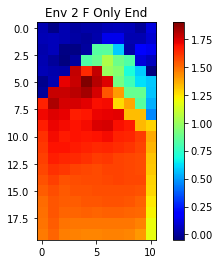

In [43]:


final_table = Network_Qtable(model, env)
plt.imshow(final_table, cmap='jet')
plt.title("Env " + "2" + " F Only End")
plt.colorbar()
img_save_path = os.path.join('Q-Plot', "Env " + "2" + " F Only End")
plt.savefig(img_save_path)


In [44]:
import numpy as np
from GridEnv import *
import torch as th
from stable_baselines3.common.utils import obs_as_tensor
device = th.device('cuda:0')

def Network_Qtable(model, env):

    device = th.device('cuda:0')

    # Genereate Image for each state, maybe dict{state: img}
    env_w = 11
    env_l = 20

    w = 0
    # Loop width of env
    state_img_dict = dict()
    while w < env_w:
        l = 0
        # Loop height of env
        while l < env_l:

            env.set_pos(l, w)
            img = visualize(env)
            state_img_dict[(l, w)] = img

            l += 1

        w += 1

    img = np.ones((20, 11))

    for key in state_img_dict.keys():
        state = key
        obs = state_img_dict[key]

        observation = np.transpose(obs, (2, 0, 1))
        observation = observation[np.newaxis, ...]
        observation = obs_as_tensor(observation, device)
        with th.no_grad():
            q_values = model.q_net(observation)

        max_val = np.max(q_values.cpu().detach().numpy())

        img[state[0], state[1]] = max_val

    return img

def Network_Ftable(model, env, type = "max"):

    device = th.device('cuda:0')

    # Genereate Image for each state, maybe dict{state: img}
    env_w = 11
    env_l = 20

    w = 0
    # Loop width of env
    state_img_dict = dict()
    while w < env_w:
        l = 0
        # Loop height of env
        while l < env_l:

            env.set_pos(l, w)
            img = visualize(env)
            state_img_dict[(l, w)] = img

            l += 1

        w += 1

    img = np.ones((20, 11))

    for key in state_img_dict.keys():
        state = key
        obs = state_img_dict[key]

        observation = np.transpose(obs, (2, 0, 1))
        observation = observation[np.newaxis, ...]
        observation = obs_as_tensor(observation, device)
        with th.no_grad():
            q_values = model.f_net(observation)
        
        if type == 'max':
            max_val = np.max(q_values.cpu().detach().numpy())
        else:
            max_val = np.min(q_values.cpu().detach().numpy())

        img[state[0], state[1]] = max_val

    return img

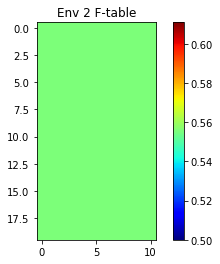

In [45]:

final_table = Network_Ftable(model, env, "max")
plt.imshow(final_table, cmap='jet')
plt.title("Env " + "2" + " F-table")
plt.colorbar()
img_save_path = os.path.join('Q-Plot', "Env_" + "2" + "_F-table(Pess)")
plt.savefig(img_save_path)

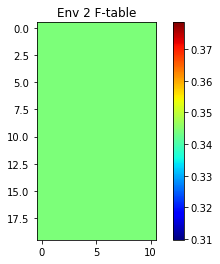

In [46]:

final_table = Network_Ftable(model, env, "min")
plt.imshow(final_table, cmap='jet')
plt.title("Env " + "2" + " F-table")
plt.colorbar()
img_save_path = os.path.join('Q-Plot', "Env_" + "2" + "_F-table min(pess)")
plt.savefig(img_save_path)

In [47]:
evaluate_policy(model, env, n_eval_episodes=30, render=True)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to target thread (0x55d9cf92fee0)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to target thread (0x55d9cf92fee0)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to target thread (0x55d9cf92fee0)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to target thread (0x55d9cf92fee0)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to target thread (0x55d9cf92fee0)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to target thread (0x55d9cf92fee0)

QObject::moveToThread: Current thread (0x55d9cf92fee0) is not the object's thread (0x55d9cf9cd630).
Cannot move to tar

(2.0, 0.0)